<a href="https://colab.research.google.com/github/pauljo13/Project-2/blob/main/AI_18_jobumsoo_Section2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section2 Project
## 관심도메인 : 헬스케어
* 데이터 이름: 치매 고위험군 웨어러블 라이프로그
* 데이터 링크: https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=226


### 문제정의
* 치매조기진단 예측 및 발병의 예방과 선제적 관리를 위한 AI 기술개발
* 운동기능 상태와 수면 상태에 따른 치매 예측


# 라이브러리 설치

In [1]:
!pip install shap
!pip install category_encoders
!pip install pdpbox==0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690721 sha256=f592017e5b85103841cc4a791d736f1633d4efdd6a500f1ec76e8076e629b6ce
  Stored in directory: /root/.cache/pip/wheels/96/52/0a/c66141e9ac8c6bd7ccc2170d835b827ba7ca16de4960c2a04c
Successfully built pdpbox


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

import shap
from pdpbox.pdp import pdp_isolate, pdp_plot

# 데이터 불러오기 + 데이터 확인

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project 2/Project_Data/1.Training/data/1_Activity/train_activity.csv')
df_s = pd.read_csv('https://raw.githubusercontent.com/pauljo13/Project-2/main/Project_Data/1.Training/data/2_sleep/train_sleep.csv')
df_m = pd.read_csv('https://raw.githubusercontent.com/pauljo13/Project-2/main/Project_Data/1.Training/data/3_mmse/train_mmse.csv')
df_a

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9700  nia+206@rowan.kr               1.34375                  249   
9701  nia+206@rowan.kr               1.53125                  570   
9702  nia+206@rowan.kr               1.34375                  295   
9703  nia+206@rowan.kr               1.31250                  186   
9704  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total activity_class_5min  activity_daily_movement  \
0                   2251                 ...                     3353   
1                   2159                 ...                     2516   
2                   2140                 ...                     1716   
3                   2240                 ...                     2791   
4                   2559                 ...                     5393   
...                  ...                 ...                      ...   
9700                2351                 ...                     4411   
9701                2682                 ...                    11057   
9702                2331                 ...                     5135   
9703                2280                 ...                     3178   
9704                1891                 ...                     1554   

               activity_day_end         activity_day_start  activity_high  \
0     2020-10-20T03:59:59+09:00  2020-10-19T04:00:00+09:00              0   
1     2020-10-21T03:59:59+09:00  2020-10-20T04:00:00+09:00              0   
2     2020-10-22T03:59:59+09:00  2020-10-21T04:00:00+09:00              0   
3     2020-10-23T03:59:59+09:00  2020-10-22T04:00:00+09:00              0   
4     2020-10-24T03:59:59+09:00  2020-10-23T04:00:00+09:00              0   
...                         ...                        ...            ...   
9700  2020-12-25T03:59:59+09:00  2020-12-24T04:00:00+09:00              1   
9701  2020-12-27T03:59:59+09:00  2020-12-26T04:00:00+09:00              1   
9702  2020-12-28T03:59:59+09:00  2020-12-27T04:00:00+09:00              4   
9703  2020-12-29T03:59:59+09:00  2020-12-28T04:00:00+09:00              0   
9704  2020-12-30T03:59:59+09:00  2020-12-29T04:00:00+09:00              0   

      activity_inactive  ...  activity_score_meet_daily_targets  \
0                   714  ...                                 78   
1                   719  ...                                 60   
2                   708  ...                                 43   
3                   705  ...                                 43   
4                   437  ...                                 43   
...                 ...  ...                                ...   
9700                780  ...                                 25   
9701                518  ...                                 43   
9702                578  ...                                 25   
9703                778  ...                                 25   
9704                 69  ...                                 25   

      activity_score_move_every_hour  activity_score_recovery_time  \
0                                100                           100   
1                                100                           100   
2                                 95                           100   
3                                100                           100   
4                                100                           100   
...                              ...                           ...   
9700                              43                           100   
9701                 

In [5]:
df_s

EMAIL  sleep_awake          sleep_bedtime_end  \
0     nia+279@rowan.kr         8700  2020-10-19T05:10:28+09:00   
1     nia+279@rowan.kr         6570  2020-10-20T05:37:52+09:00   
2     nia+279@rowan.kr        10530  2020-10-21T05:45:28+09:00   
3     nia+279@rowan.kr         4080  2020-10-22T05:12:16+09:00   
4     nia+279@rowan.kr         7170  2020-10-23T02:23:30+09:00   
...                ...          ...                        ...   
9700  nia+206@rowan.kr         6000  2020-12-24T06:51:37+09:00   
9701  nia+206@rowan.kr         5700  2020-12-26T06:36:19+09:00   
9702  nia+206@rowan.kr         5070  2020-12-27T07:56:40+09:00   
9703  nia+206@rowan.kr         2040  2020-12-28T05:05:45+09:00   
9704  nia+206@rowan.kr         3390  2020-12-29T06:10:26+09:00   

            sleep_bedtime_start  sleep_breath_average  sleep_deep  \
0     2020-10-18T18:38:28+09:00                17.875       10110   
1     2020-10-19T21:39:52+09:00                18.000        7440   
2     2020-10-20T20:51:28+09:00                18.000        4620   
3     2020-10-21T22:08:16+09:00                17.500        7440   
4     2020-10-22T20:38:30+09:00                17.875        4320   
...                         ...                   ...         ...   
9700  2020-12-23T21:35:37+09:00                15.875        1710   
9701  2020-12-25T22:54:19+09:00                16.125           0   
9702  2020-12-26T22:05:40+09:00                15.625         480   
9703  2020-12-27T21:21:45+09:00                15.875        2220   
9704  2020-12-28T22:59:26+09:00                16.625         600   

      sleep_duration  sleep_efficiency sleep_hr_5min  sleep_hr_average  ...  \
0              37920                77           ...             53.04  ...   
1              28680                77           ...             52.82  ...   
2              32040                67           ...             52.01  ...   
3              25440                84           ...             51.07  ...   
4              20700                65           ...             50.80  ...   
...              ...               ...           ...               ...  ...   
9700           33360                82           ...             63.75  ...   
9701           27720                79           ...             67.40  ...   
9702           35460                86           ...             64.84  ...   
9703           27840                93           ...             67.05  ...   
9704           25860                87           ...             62.49  ...   

      sleep_score_efficiency sleep_score_latency  sleep_score_rem  \
0                         65                  89               56   
1                         65                  97               43   
2                         41                  75               68   
3                         81                  83               73   
4                         39                  78               25   
...                      ...                 ...              ...   
9700                      76                  81               95   
9701                      69                  86               89   
9702                      86                  89               98   
9703                      98                  89               86   
9704                      88                  99               76   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
0                    94                     0.00                         0.00   
1                    65                     0.34                         0.34   
2                    62                    -0.07                        -0.07   
3                    62                    -0.14                        -0.14   
4                    29                    -0.50                        -0.50   
...                 ...                      ...                          ...   
9700                 86                    -0.09  

In [6]:
df_m

SAMPLE_EMAIL  DIAG_SEQ DIAG_NM DOCTOR_NM  MMSE_NUM  MMSE_KIND  Q01  \
0    nia+315@rowan.kr         2      CN         -         2          2    2   
1    nia+014@rowan.kr         3     MCI         -         3          2    2   
2    nia+220@rowan.kr         2      CN         -         2          2    2   
3    nia+096@rowan.kr         2     MCI         -         2          2    2   
4    nia+396@rowan.kr         3      CN         -         3          2    2   
..                ...       ...     ...       ...       ...        ...  ...   
136  nia+181@rowan.kr         1      CN         -         1          2    2   
137  nia+354@rowan.kr         2      CN         -         2          2    2   
138  nia+448@rowan.kr         2     MCI         -         2          2    2   
139  nia+394@rowan.kr         3      CN         -         3          2    2   
140  nia+067@rowan.kr         2     Dem         -         2          2    1   

     Q02  Q03  Q04  ...  Q14_1  Q14_2  Q15  Q16_1  Q16_2  Q16_3  Q17  Q18  \
0      2    2    2  ...      2      2    2      1      2      2    2    2   
1      2    2    2  ...      2      2    2      1      2      2    2    2   
2      2    2    2  ...      2      2    2      2      2      2    2    2   
3      2    2    2  ...      2      2    2      2      2      2    2    2   
4      2    2    2  ...      2      2    2      2      2      2    2    2   
..   ...  ...  ...  ...    ...    ...  ...    ...    ...    ...  ...  ...   
136    2    2    1  ...      2      2    2      2      2      1    2    2   
137    2    2    2  ...      2      2    2      2      2      2    2    2   
138    2    2    2  ...      2      2    2      2      2      2    2    2   
139    2    2    2  ...      2      2    2      2      2      2    2    2   
140    2    1    1  ...      2      2    2      1      1      2    1    2   

     Q19  TOTAL  
0      2     29  
1      2     28  
2      2     30  
3      2     27  
4      2     30  
..   ...    ...  
136    2     26  
137    2     26  
138    2     28  
139    2     28  
140    2     16  

[141 rows x 38 columns]

In [7]:
# 데이터 정보
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EMAIL                                    9705 non-null   object 
 1   activity_average_met                     9705 non-null   float64
 2   activity_cal_active                      9705 non-null   int64  
 3   activity_cal_total                       9705 non-null   int64  
 4   activity_class_5min                      9705 non-null   object 
 5   activity_daily_movement                  9705 non-null   int64  
 6   activity_day_end                         9705 non-null   object 
 7   activity_day_start                       9705 non-null   object 
 8   activity_high                            9705 non-null   int64  
 9   activity_inactive                        9705 non-null   int64  
 10  activity_inactivity_alerts               9705 no

In [8]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   EMAIL                                     9705 non-null   object 
 1   sleep_awake                               9705 non-null   int64  
 2   sleep_bedtime_end                         9705 non-null   object 
 3   sleep_bedtime_start                       9705 non-null   object 
 4   sleep_breath_average                      9705 non-null   float64
 5   sleep_deep                                9705 non-null   int64  
 6   sleep_duration                            9705 non-null   int64  
 7   sleep_efficiency                          9705 non-null   int64  
 8   sleep_hr_5min                             9705 non-null   object 
 9   sleep_hr_average                          9705 non-null   float64
 10  sleep_hr_lowest                     

In [9]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SAMPLE_EMAIL  141 non-null    object
 1   DIAG_SEQ      141 non-null    int64 
 2   DIAG_NM       141 non-null    object
 3   DOCTOR_NM     141 non-null    object
 4   MMSE_NUM      141 non-null    int64 
 5   MMSE_KIND     141 non-null    int64 
 6   Q01           141 non-null    int64 
 7   Q02           141 non-null    int64 
 8   Q03           141 non-null    int64 
 9   Q04           141 non-null    int64 
 10  Q05           141 non-null    int64 
 11  Q06           141 non-null    int64 
 12  Q07           141 non-null    int64 
 13  Q08           141 non-null    int64 
 14  Q09           141 non-null    int64 
 15  Q10           141 non-null    int64 
 16  Q11_1         141 non-null    int64 
 17  Q11_2         141 non-null    int64 
 18  Q11_3         141 non-null    int64 
 19  Q12_1   

In [10]:
#결측치 확인
df_a.isnull().sum()

EMAIL                                      0
activity_average_met                       0
activity_cal_active                        0
activity_cal_total                         0
activity_class_5min                        0
activity_daily_movement                    0
activity_day_end                           0
activity_day_start                         0
activity_high                              0
activity_inactive                          0
activity_inactivity_alerts                 0
activity_low                               0
activity_medium                            0
activity_met_1min                          0
activity_met_min_high                      0
activity_met_min_inactive                  0
activity_met_min_low                       0
activity_met_min_medium                    0
activity_non_wear                          0
activity_rest                              0
activity_score                             0
activity_score_meet_daily_targets          0
activity_s

In [11]:
df_s.isnull().sum()

EMAIL                                       0
sleep_awake                                 0
sleep_bedtime_end                           0
sleep_bedtime_start                         0
sleep_breath_average                        0
sleep_deep                                  0
sleep_duration                              0
sleep_efficiency                            0
sleep_hr_5min                               0
sleep_hr_average                            0
sleep_hr_lowest                             0
sleep_hypnogram_5min                        0
sleep_is_longest                            0
sleep_light                                 0
sleep_midpoint_at_delta                     0
sleep_midpoint_time                         0
sleep_onset_latency                         0
sleep_period_id                             0
sleep_rem                                   0
sleep_restless                              0
sleep_rmssd                                 0
sleep_rmssd_5min                  

In [12]:
df_m.isnull().sum()

SAMPLE_EMAIL    0
DIAG_SEQ        0
DIAG_NM         0
DOCTOR_NM       0
MMSE_NUM        0
MMSE_KIND       0
Q01             0
Q02             0
Q03             0
Q04             0
Q05             0
Q06             0
Q07             0
Q08             0
Q09             0
Q10             0
Q11_1           0
Q11_2           0
Q11_3           0
Q12_1           0
Q12_2           0
Q12_3           0
Q12_4           0
Q12_5           0
Q12_TOTAL       0
Q13_1           0
Q13_2           0
Q13_3           0
Q14_1           0
Q14_2           0
Q15             0
Q16_1           0
Q16_2           0
Q16_3           0
Q17             0
Q18             0
Q19             0
TOTAL           0
dtype: int64

In [13]:
#중복값 확인
df_a.duplicated().sum(), df_s.duplicated().sum(), df_m.duplicated().sum()

(0, 0, 0)

In [14]:
df_a.nunique()

EMAIL                                       141
activity_average_met                         64
activity_cal_active                        1227
activity_cal_total                         1717
activity_class_5min                           1
activity_daily_movement                    7476
activity_day_end                            124
activity_day_start                          124
activity_high                                69
activity_inactive                           792
activity_inactivity_alerts                    7
activity_low                                662
activity_medium                             255
activity_met_1min                             1
activity_met_min_high                       247
activity_met_min_inactive                    33
activity_met_min_low                        570
activity_met_min_medium                     695
activity_non_wear                           297
activity_rest                               810
activity_score                          

In [15]:
df_s.nunique()

EMAIL                                        141
sleep_awake                                  611
sleep_bedtime_end                           9667
sleep_bedtime_start                         9681
sleep_breath_average                          71
sleep_deep                                   454
sleep_duration                               637
sleep_efficiency                              57
sleep_hr_5min                                  1
sleep_hr_average                            2905
sleep_hr_lowest                               51
sleep_hypnogram_5min                           1
sleep_is_longest                               1
sleep_light                                  811
sleep_midpoint_at_delta                     7166
sleep_midpoint_time                          723
sleep_onset_latency                          159
sleep_period_id                                8
sleep_rem                                    363
sleep_restless                                79
sleep_rmssd         

In [16]:
df_m.nunique()

SAMPLE_EMAIL    141
DIAG_SEQ          5
DIAG_NM           3
DOCTOR_NM         1
MMSE_NUM          5
MMSE_KIND         1
Q01               2
Q02               2
Q03               2
Q04               2
Q05               2
Q06               2
Q07               2
Q08               2
Q09               2
Q10               2
Q11_1             1
Q11_2             1
Q11_3             1
Q12_1             2
Q12_2             2
Q12_3             2
Q12_4             2
Q12_5             2
Q12_TOTAL         1
Q13_1             2
Q13_2             2
Q13_3             2
Q14_1             2
Q14_2             1
Q15               2
Q16_1             2
Q16_2             2
Q16_3             2
Q17               2
Q18               2
Q19               2
TOTAL            16
dtype: int64

In [17]:
df_m['DIAG_NM'].value_counts()

CN     85
MCI    47
Dem     9
Name: DIAG_NM, dtype: int64

# EDA

In [18]:
df_m.columns

Index(['SAMPLE_EMAIL', 'DIAG_SEQ', 'DIAG_NM', 'DOCTOR_NM', 'MMSE_NUM',
       'MMSE_KIND', 'Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q06', 'Q07', 'Q08',
       'Q09', 'Q10', 'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3',
       'Q12_4', 'Q12_5', 'Q12_TOTAL', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1',
       'Q14_2', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q17', 'Q18', 'Q19',
       'TOTAL'],
      dtype='object')

In [19]:
col_m = ['Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q06', 'Q07', 'Q08',
       'Q09', 'Q10', 'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3',
       'Q12_4', 'Q12_5', 'Q12_TOTAL', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1',
       'Q14_2', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q17', 'Q18', 'Q19','DOCTOR_NM','DIAG_SEQ','MMSE_NUM']
df_m2 = df_m.drop(columns=col_m, axis=1)
df_m2.shape

(141, 4)

In [20]:
df_m2

SAMPLE_EMAIL DIAG_NM  MMSE_KIND  TOTAL
0    nia+315@rowan.kr      CN          2     29
1    nia+014@rowan.kr     MCI          2     28
2    nia+220@rowan.kr      CN          2     30
3    nia+096@rowan.kr     MCI          2     27
4    nia+396@rowan.kr      CN          2     30
..                ...     ...        ...    ...
136  nia+181@rowan.kr      CN          2     26
137  nia+354@rowan.kr      CN          2     26
138  nia+448@rowan.kr     MCI          2     28
139  nia+394@rowan.kr      CN          2     28
140  nia+067@rowan.kr     Dem          2     16

[141 rows x 4 columns]

In [21]:
df_a.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_class_5min', 'activity_daily_movement',
       'activity_day_end', 'activity_day_start', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_1min', 'activity_met_min_high',
       'activity_met_min_inactive', 'activity_met_min_low',
       'activity_met_min_medium', 'activity_non_wear', 'activity_rest',
       'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)'],
      dtype='object')

In [22]:
df_s.columns

Index(['EMAIL', 'sleep_awake', 'sleep_bedtime_end', 'sleep_bedtime_start',
       'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_5min', 'sleep_hr_average',
       'sleep_hr_lowest', 'sleep_hypnogram_5min', 'sleep_is_longest',
       'sleep_light', 'sleep_midpoint_at_delta', 'sleep_midpoint_time',
       'sleep_onset_latency', 'sleep_period_id', 'sleep_rem', 'sleep_restless',
       'sleep_rmssd', 'sleep_rmssd_5min', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total',
       'CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)'],
      dtype='object')

In [23]:
# 컬럼 정리
CON_in = ['CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)']
CONVERT_a = df_a.drop(columns= CON_in, axis=1)

col_a =['activity_class_5min','activity_met_1min','CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)']

CON_in =['CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)']
CONVERT_s = df_s.drop(columns= CON_in, axis=1)

col_s = ['sleep_hr_5min','sleep_hypnogram_5min','sleep_is_longest','sleep_rmssd_5min','CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)']

df_a2 = df_a.drop(columns=col_a,axis=1)
df_s2 = df_s.drop(columns=col_s,axis=1)

In [24]:
df_a2

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9700  nia+206@rowan.kr               1.34375                  249   
9701  nia+206@rowan.kr               1.53125                  570   
9702  nia+206@rowan.kr               1.34375                  295   
9703  nia+206@rowan.kr               1.31250                  186   
9704  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total  activity_daily_movement           activity_day_end  \
0                   2251                     3353  2020-10-20T03:59:59+09:00   
1                   2159                     2516  2020-10-21T03:59:59+09:00   
2                   2140                     1716  2020-10-22T03:59:59+09:00   
3                   2240                     2791  2020-10-23T03:59:59+09:00   
4                   2559                     5393  2020-10-24T03:59:59+09:00   
...                  ...                      ...                        ...   
9700                2351                     4411  2020-12-25T03:59:59+09:00   
9701                2682                    11057  2020-12-27T03:59:59+09:00   
9702                2331                     5135  2020-12-28T03:59:59+09:00   
9703                2280                     3178  2020-12-29T03:59:59+09:00   
9704                1891                     1554  2020-12-30T03:59:59+09:00   

             activity_day_start  activity_high  activity_inactive  \
0     2020-10-19T04:00:00+09:00              0                714   
1     2020-10-20T04:00:00+09:00              0                719   
2     2020-10-21T04:00:00+09:00              0                708   
3     2020-10-22T04:00:00+09:00              0                705   
4     2020-10-23T04:00:00+09:00              0                437   
...                         ...            ...                ...   
9700  2020-12-24T04:00:00+09:00              1                780   
9701  2020-12-26T04:00:00+09:00              1                518   
9702  2020-12-27T04:00:00+09:00              4                578   
9703  2020-12-28T04:00:00+09:00              0                778   
9704  2020-12-29T04:00:00+09:00              0                 69   

      activity_inactivity_alerts  ...  activity_rest  activity_score  \
0                              0  ...            519              87   
1                              0  ...            464              83   
2                              1  ...            601              73   
3                              0  ...            442              70   
4                              0  ...            453              70   
...                          ...  ...            ...             ...   
9700                           4  ...            470              61   
9701                           1  ...            528              78   
9702                           0  ...            655              70   
9703                           1  ...            393              66   
9704                           0  ...            134              65   

      activity_score_meet_daily_targets  activity_score_move_every_hour  \
0                                    78                             100   
1                                    60                             100   
2                                    43                              95   
3                                    43                             100   
4                                    43                             100   
...                                 ...                             ...   
9700    

In [25]:
# 날짜 데이터 정리
df_a2['day'] = pd.to_datetime(df_a2['activity_day_start'].str[0:10])
col_a2 = ['activity_day_end','activity_day_start']
df_a2 = df_a2.drop(columns=col_a2, axis=1)
df_a2

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9700  nia+206@rowan.kr               1.34375                  249   
9701  nia+206@rowan.kr               1.53125                  570   
9702  nia+206@rowan.kr               1.34375                  295   
9703  nia+206@rowan.kr               1.31250                  186   
9704  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   714                           0           201   
1                   719                           0           131   
2                   708                           1           125   
3                   705                           0           203   
4                   437                           0           511   
...                 ...                         ...           ...   
9700                780                           4           167   
9701                518                           1           332   
9702                578                           0           173   
9703                778                           1           138   
9704                 69                           0            61   

      activity_medium  ...  activity_score  activity_score_meet_daily_targets  \
0                   6  ...              87                                 78   
1                   9  ...              83                                 60   
2                   6  ...              73                                 43   
3                   5  ...              70                                 43   
4                   6  ...              70                                 43   
...               ...  ...             ...                                ...   
9700               22  ...              61                                 25   
9701               61  ...              78                                 43   
9702               30  ...              70                                 25   
9703               18  ...              66                                 25   
9704                7  ...              65                                 25   

      activity_score_move_every_hour  activity_score_recovery_time  \
0                                100                           100   
1                                100                           100   
2                                 95                           100   
3                                100                           100   
4                                100                           100   
...                              ...                           ...   
9700                              43                           100   
9701     

In [26]:
df_s2['day'] = pd.to_datetime(df_s2['sleep_bedtime_end'].str[0:10])
col_s2 = ['sleep_bedtime_end','sleep_bedtime_start']
df_s2 = df_s2.drop(columns=col_s2, axis=1)
df_s2

EMAIL  sleep_awake  sleep_breath_average  sleep_deep  \
0     nia+279@rowan.kr         8700                17.875       10110   
1     nia+279@rowan.kr         6570                18.000        7440   
2     nia+279@rowan.kr        10530                18.000        4620   
3     nia+279@rowan.kr         4080                17.500        7440   
4     nia+279@rowan.kr         7170                17.875        4320   
...                ...          ...                   ...         ...   
9700  nia+206@rowan.kr         6000                15.875        1710   
9701  nia+206@rowan.kr         5700                16.125           0   
9702  nia+206@rowan.kr         5070                15.625         480   
9703  nia+206@rowan.kr         2040                15.875        2220   
9704  nia+206@rowan.kr         3390                16.625         600   

      sleep_duration  sleep_efficiency  sleep_hr_average  sleep_hr_lowest  \
0              37920                77             53.04               49   
1              28680                77             52.82               49   
2              32040                67             52.01               47   
3              25440                84             51.07               46   
4              20700                65             50.80               47   
...              ...               ...               ...              ...   
9700           33360                82             63.75               57   
9701           27720                79             67.40               61   
9702           35460                86             64.84               60   
9703           27840                93             67.05               60   
9704           25860                87             62.49               56   

      sleep_light  sleep_midpoint_at_delta  ...  sleep_score_deep  \
0           15330                    84928  ...               100   
1           11820                     4582  ...                98   
2           12360                     7078  ...                94   
3            9060                     5776  ...                98   
4            7470                    -2220  ...                88   
...           ...                      ...  ...               ...   
9700        19320                     8017  ...                34   
9701        16140                    10129  ...                 1   
9702        22170                    10630  ...                 9   
9703        17880                     4545  ...                44   
9704        16860                     8876  ...                11   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
0                           78                      65                   89   
1                           77                      65                   97   
2                           60                      41                   75   
3                           80                      81                   83   
4                           72                      39                   78   
...                        ...                     ...                  ...   
9700                        57                      76                   81   
9701                        56                      69                   86   
9702                        59                      86                   89   
9703                        59                      98                   89   
9704                        64                      88                   99   

      sleep_score_rem  sleep_score_total  sleep_temperature_delta  \
0                  56                 94                     0.00   
1                  43                 65                     0.34   
2                  68                 62                    -0.07   
3                  73                 62                    -0.14   
4                  25                 29                    -0.50   
...               ...  

In [27]:
df_s2['EMAIL'].value_counts()

nia+068@rowan.kr    120
nia+265@rowan.kr    118
nia+039@rowan.kr    115
nia+059@rowan.kr    113
nia+005@rowan.kr    113
                   ... 
nia+403@rowan.kr     37
nia+394@rowan.kr     36
nia+445@rowan.kr     36
nia+398@rowan.kr     36
nia+015@rowan.kr     35
Name: EMAIL, Length: 141, dtype: int64

In [28]:
df_a2['EMAIL'].value_counts()

nia+068@rowan.kr    120
nia+265@rowan.kr    118
nia+039@rowan.kr    115
nia+059@rowan.kr    113
nia+005@rowan.kr    113
                   ... 
nia+403@rowan.kr     37
nia+394@rowan.kr     36
nia+445@rowan.kr     36
nia+398@rowan.kr     36
nia+015@rowan.kr     35
Name: EMAIL, Length: 141, dtype: int64

In [29]:
# 이름과 날짜 기준으로 두 데이터를 합친다.
pd.merge(df_a2,df_s2, on=('EMAIL','day'))

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9679  nia+206@rowan.kr               1.34375                  249   
9680  nia+206@rowan.kr               1.53125                  570   
9681  nia+206@rowan.kr               1.34375                  295   
9682  nia+206@rowan.kr               1.31250                  186   
9683  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9679                2351                     4411              1   
9680                2682                    11057              1   
9681                2331                     5135              4   
9682                2280                     3178              0   
9683                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   714                           0           201   
1                   719                           0           131   
2                   708                           1           125   
3                   705                           0           203   
4                   437                           0           511   
...                 ...                         ...           ...   
9679                780                           4           167   
9680                518                           1           332   
9681                578                           0           173   
9682                778                           1           138   
9683                 69                           0            61   

      activity_medium  ...  sleep_score_alignment  sleep_score_deep  \
0                   6  ...                     87               100   
1                   9  ...                    100                98   
2                   6  ...                    100                94   
3                   5  ...                    100                98   
4                   6  ...                     80                88   
...               ...  ...                    ...               ...   
9679               22  ...                    100                34   
9680               61  ...                    100                 1   
9681               30  ...                    100                 9   
9682               18  ...                    100                44   
9683                7  ...                    100                11   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
0                           78                      65                   89   
1                           77                      65                   97   
2                           60                      41                   75   
3                           80                      81                   83   
4                           72                      39                   78   
...                        ...                     ...                  ...   
9679                        57                      76                   81   
9680                        56                      69   

In [30]:
df_s2.shape

(9705, 28)

In [31]:
df_a2.shape

(9705, 26)

In [32]:
9705 - 9684

21

In [33]:
ind = df_s2[df_s2['day'] != df_a2['day']].index

In [34]:
df_s.iloc[ind]

EMAIL  sleep_awake          sleep_bedtime_end  \
463   nia+181@rowan.kr        11130  2020-11-07T19:43:29+09:00   
471   nia+181@rowan.kr        11520  2020-11-15T19:19:29+09:00   
573   nia+268@rowan.kr        21330  2020-11-29T07:18:39+09:00   
702   nia+188@rowan.kr         1440  2020-11-15T23:14:31+09:00   
705   nia+188@rowan.kr         6360  2020-11-19T23:51:58+09:00   
931   nia+252@rowan.kr         2310  2020-12-20T23:55:18+09:00   
990   nia+144@rowan.kr         1170  2020-11-19T23:32:03+09:00   
3409  nia+284@rowan.kr        20130  2020-12-07T06:42:27+09:00   
3624  nia+050@rowan.kr         4050  2020-10-29T23:21:57+09:00   
4965  nia+233@rowan.kr         1980  2020-11-14T19:35:49+09:00   
5188  nia+059@rowan.kr         1350  2020-11-05T22:32:00+09:00   
5971  nia+161@rowan.kr         3840  2020-10-29T23:24:28+09:00   
5981  nia+161@rowan.kr         5190  2020-11-09T23:25:00+09:00   
6233  nia+315@rowan.kr         1230  2020-11-30T23:49:29+09:00   
6903  nia+176@rowan.kr         9270  2020-10-25T20:01:50+09:00   
7337  nia+229@rowan.kr        15240  2020-11-02T06:47:54+09:00   
7350  nia+229@rowan.kr        13080  2020-11-28T06:37:21+09:00   
7358  nia+229@rowan.kr         7950  2020-12-11T06:08:51+09:00   
7359  nia+229@rowan.kr        12300  2020-12-12T06:05:47+09:00   
7361  nia+229@rowan.kr        11850  2020-12-15T06:51:01+09:00   
7362  nia+229@rowan.kr        16500  2020-12-16T05:33:19+09:00   
8275  nia+182@rowan.kr         8790  2020-10-24T18:15:44+09:00   
8299  nia+182@rowan.kr        15660  2020-11-20T05:42:28+09:00   
8325  nia+182@rowan.kr        19260  2020-12-18T05:31:21+09:00   
8399  nia+196@rowan.kr        10680  2020-11-02T07:12:14+09:00   
8405  nia+196@rowan.kr        17580  2020-11-09T07:24:26+09:00   
8426  nia+196@rowan.kr        16740  2020-12-02T06:33:55+09:00   
8430  nia+196@rowan.kr        17430  2020-12-07T06:36:03+09:00   
8456  nia+196@rowan.kr         8520  2021-01-01T19:56:43+09:00   
8579  nia+187@rowan.kr        19980  2020-10-25T05:53:25+09:00   
9363  nia+411@rowan.kr         5550  2021-01-06T23:52:31+09:00   
9427  nia+240@rowan.kr        15240  2020-11-18T05:37:24+09:00   
9439  nia+240@rowan.kr         8820  2020-12-05T05:47:30+09:00   
9520  nia+234@rowan.kr         3420  2020-12-29T22:46:01+09:00   

            sleep_bedtime_start  sleep_breath_average  sleep_deep  \
463   2020-11-07T11:30:29+09:00                17.250        2010   
471   2020-11-15T09:00:29+09:00                17.375        2610   
573   2020-11-28T16:18:39+09:00                17.875        1860   
702   2020-11-15T19:48:31+09:00                17.375        5430   
705   2020-11-19T18:22:58+09:00                18.000        5580   
931   2020-12-20T20:09:18+09:00                15.250        2400   
990   2020-11-19T18:52:03+09:00                17.875         390   
3409  2020-12-06T15:42:27+09:00                17.250         450   
3624  2020-10-29T18:35:57+09:00                16.750        6300   
4965  2020-11-14T13:28:49+09:00                14.375        8100   
5188  2020-11-05T15:16:00+09:00                18.125        4830   
5971  2020-10-29T19:15:28+09:00                16.875        3330   
5981  2020-11-09T18:13:00+09:00                17.375        4650   
6233  2020-11-30T20:28:29+09:00                20.500        3840   
6903  2020-10-25T12:19:50+09:00                19.625        2550   
7337  2020-11-01T15:47:54+09:00                18.125        5970   
7350  2020-11-27T15:37:21+09:00                17.875        3630   
7358  2020-12-10T15:08:51+09:00                18.375        7110   
7359  2020-12-11T15:05:47+09:00                18.000        4200   
7361  2020-12-14T15:51:01+09:00                18.625        5310   
7362  2020-12-15T14:33:19+09:00                18.000        4800   
8275  2020-10-24T11:09:44+09:00                17.750        4860   
8299  2020-11-19T14:50:28+09:00                17.000        1050   
8325  2020-12-17T14:31:21+09:00                17.

In [35]:
# 날짜 데이터 추출 전 데이터를 확인한 결과, 수면이 끝나는 날짜가 하루 정도 차이가 
a = df_s.iloc[ind]['sleep_bedtime_end'].str[0:10]

In [36]:
b = df_s.iloc[ind]['sleep_bedtime_start'].str[0:10]

In [37]:
dind = [] # 날짜 값이 같지 않은 row index
la = list(a.index)
sind = list(a.index) # 날짜 값이 같은  row index
for i in la:
  if a[i] != b[i]:
    dind.append(i)
    sind.remove(i)

print(dind)
print(sind)

[573, 3409, 7337, 7350, 7358, 7359, 7361, 7362, 8299, 8325, 8399, 8405, 8426, 8430, 8579, 9427, 9439]
[463, 471, 702, 705, 931, 990, 3624, 4965, 5188, 5971, 5981, 6233, 6903, 8275, 8456, 9363, 9520]


In [38]:
len(la), len(dind), len(sind)

(34, 17, 17)

In [39]:
df_a.iloc[dind].head()

EMAIL  activity_average_met  activity_cal_active  \
573   nia+268@rowan.kr               1.18750                  119   
3409  nia+284@rowan.kr               1.15625                  122   
7337  nia+229@rowan.kr               1.06250                   64   
7350  nia+229@rowan.kr               1.12500                   84   
7358  nia+229@rowan.kr               1.09375                   87   

      activity_cal_total activity_class_5min  activity_daily_movement  \
573                 1721                 ...                     2159   
3409                2059                 ...                     1983   
7337                1926                 ...                     1115   
7350                1995                 ...                     1367   
7358                1966                 ...                     1486   

               activity_day_end         activity_day_start  activity_high  \
573   2020-11-29T03:59:59+09:00  2020-11-28T04:00:00+09:00              0   
3409  2020-12-07T03:59:59+09:00  2020-12-06T04:00:00+09:00              0   
7337  2020-11-02T03:59:59+09:00  2020-11-01T04:00:00+09:00              0   
7350  2020-11-28T03:59:59+09:00  2020-11-27T04:00:00+09:00              0   
7358  2020-12-11T03:59:59+09:00  2020-12-10T04:00:00+09:00              0   

      activity_inactive  ...  activity_score_meet_daily_targets  \
573                 290  ...                                 95   
3409                283  ...                                  1   
7337                151  ...                                  1   
7350                395  ...                                  1   
7358                223  ...                                  1   

      activity_score_move_every_hour  activity_score_recovery_time  \
573                              100                            71   
3409                             100                           100   
7337                             100                           100   
7350                             100                           100   
7358                             100                           100   

     activity_score_stay_active  activity_score_training_frequency  \
573                          99                                100   
3409                         98                                  1   
7337                         99                                  1   
7350                         92                                  1   
7358                        100                                  1   

      activity_score_training_volume  activity_steps  activity_total  \
573                               96            3558             193   
3409                              45            2715             157   
7337                              48            1606              63   
7350                              39            2047              89   
7358                              47            2274              82   

                CONVERT(activity_class_5min USING utf8)  \
573   2/1/1/1/1/1/1/2/3/1/1/1/1/1/2/3/3/2/1/1/1/1/1/...   
3409  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...   
7337  1/1/1/1/1/1/1/2/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/...   
7350  1/1/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...   
7358  1/1/1/1/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...   

                  CONVERT(activity_met_1min USING utf8)  
573   1.5/2/1.4/1.2/1.2/1.1/0.9/0.9/0.9/0.9/1.2/0.9/...  
3409  1.1/0.9/0.9/0.9/0.9/1.2/0.9/0.9/0.9/0.9/0.9/0....  
7337  1.2/1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/...  
7350  0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/1.1/1/...  
7358  1.1/0.9/0.9/0.9/1.2/1.1/0.9/1.1/0.9/0.9/0.9/0....  

[5 rows x 31 columns]

In [40]:
df_a2.iloc[dind].head()

EMAIL  activity_average_met  activity_cal_active  \
573   nia+268@rowan.kr               1.18750                  119   
3409  nia+284@rowan.kr               1.15625                  122   
7337  nia+229@rowan.kr               1.06250                   64   
7350  nia+229@rowan.kr               1.12500                   84   
7358  nia+229@rowan.kr               1.09375                   87   

      activity_cal_total  activity_daily_movement  activity_high  \
573                 1721                     2159              0   
3409                2059                     1983              0   
7337                1926                     1115              0   
7350                1995                     1367              0   
7358                1966                     1486              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
573                 290                           0           187   
3409                283                           0           153   
7337                151                           0            58   
7350                395                           0            85   
7358                223                           0            74   

      activity_medium  ...  activity_score  activity_score_meet_daily_targets  \
573                 6  ...              89                                 95   
3409                4  ...              56                                  1   
7337                5  ...              57                                  1   
7350                4  ...              55                                  1   
7358                8  ...              57                                  1   

      activity_score_move_every_hour  activity_score_recovery_time  \
573                              100                            71   
3409                             100                           100   
7337                             100                           100   
7350                             100                           100   
7358                             100                           100   

      activity_score_stay_active  activity_score_training_frequency  \
573                           99                                100   
3409                          98                                  1   
7337                          99                                  1   
7350                          92                                  1   
7358                         100                                  1   

      activity_score_training_volume  activity_steps  activity_total  \
573                               96            3558             193   
3409                              45            2715             157   
7337                              48            1606              63   
7350                              39            2047              89   
7358                              47            2274              82   

            day  
573  2020-11-28  
3409 2020-12-06  
7337 2020-11-01  
7350 2020-11-27  
7358 2020-12-10  

[5 rows x 26 columns]

In [41]:
df_s.iloc[dind].head()

EMAIL  sleep_awake          sleep_bedtime_end  \
573   nia+268@rowan.kr        21330  2020-11-29T07:18:39+09:00   
3409  nia+284@rowan.kr        20130  2020-12-07T06:42:27+09:00   
7337  nia+229@rowan.kr        15240  2020-11-02T06:47:54+09:00   
7350  nia+229@rowan.kr        13080  2020-11-28T06:37:21+09:00   
7358  nia+229@rowan.kr         7950  2020-12-11T06:08:51+09:00   

            sleep_bedtime_start  sleep_breath_average  sleep_deep  \
573   2020-11-28T16:18:39+09:00                17.875        1860   
3409  2020-12-06T15:42:27+09:00                17.250         450   
7337  2020-11-01T15:47:54+09:00                18.125        5970   
7350  2020-11-27T15:37:21+09:00                17.875        3630   
7358  2020-12-10T15:08:51+09:00                18.375        7110   

      sleep_duration  sleep_efficiency sleep_hr_5min  sleep_hr_average  ...  \
573            54000                61           ...             65.63  ...   
3409           54000                63           ...             63.94  ...   
7337           54000                72           ...             52.92  ...   
7350           54000                76           ...             56.64  ...   
7358           54000                85           ...             52.95  ...   

      sleep_score_efficiency sleep_score_latency  sleep_score_rem  \
573                       27                  75               61   
3409                      32                  64               78   
7337                      53                  94               42   
7350                      62                  72               73   
7358                      83                  62               43   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
573                 100                     0.37                         0.37   
3409                100                     0.13                         0.13   
7337                100                    -0.31                        -0.31   
7350                100                     0.21                         0.21   
7358                100                    -0.20                        -0.20   

      sleep_total                  CONVERT(sleep_hr_5min USING utf8)  \
573         32670  0/66/65/65/65/64/65/64/0/0/65/64/64/64/65/64/6...   
3409        33870  70/69/71/72/72/0/0/0/0/0/0/74/74/74/73/75/74/7...   
7337        38760  0/0/0/0/0/0/0/56/56/56/58/59/57/57/55/54/55/0/...   
7350        40920  58/60/59/58/59/58/59/59/60/59/58/58/0/0/0/0/0/...   
7358        46050  51/51/51/51/52/52/52/52/55/56/0/0/0/59/57/56/5...   

               CONVERT(sleep_hypnogram_5min USING utf8)  \
573   4/2/2/2/2/2/2/4/4/2/2/2/2/4/4/2/2/1/2/2/4/4/4/...   
3409  2/2/2/2/4/4/4/4/4/4/4/4/4/2/2/2/4/2/4/4/4/4/4/...   
7337  4/4/1/1/2/4/4/4/2/2/1/1/1/2/2/2/2/2/4/4/4/4/2/...   
7350  2/2/2/2/2/2/2/2/2/4/2/2/4/4/4/4/4/4/4/4/4/4/4/...   
7358  2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/1/1/2/2/2/2/2/4/...   

                   CONVERT(sleep_rmssd_5min USING utf8)  
573   0/16/22/33/13/13/20/13/0/0/14/16/20/13/23/15/1...  
3409  23/19/18/20/21/0/0/0/0/0/0/20/21/24/24/22/21/1...  
7337  0/0/0/0/0/0/0/26/28/29/22/21/20/23/25/40/71/0/...  
7350  114/96/121/33/31/17/14/22/17/29/24/30/0/0/0/0/...  
7358  24/20/28/21/40/27/16/17/21/16/0/0/0/17/24/29/2...  

[5 rows x 36 columns]

In [42]:
df_s2.iloc[dind].head()

EMAIL  sleep_awake  sleep_breath_average  sleep_deep  \
573   nia+268@rowan.kr        21330                17.875        1860   
3409  nia+284@rowan.kr        20130                17.250         450   
7337  nia+229@rowan.kr        15240                18.125        5970   
7350  nia+229@rowan.kr        13080                17.875        3630   
7358  nia+229@rowan.kr         7950                18.375        7110   

      sleep_duration  sleep_efficiency  sleep_hr_average  sleep_hr_lowest  \
573            54000                61             65.63               60   
3409           54000                63             63.94               56   
7337           54000                72             52.92               48   
7350           54000                76             56.64               50   
7358           54000                85             52.95               47   

      sleep_light  sleep_midpoint_at_delta  ...  sleep_score_deep  \
573         27990                    87219  ...                95   
3409        28230                    90417  ...                 9   
7337        29970                    86634  ...                97   
7350        32460                    85401  ...                74   
7358        36030                    82581  ...                98   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
573                         41                      27                   75   
3409                        41                      32                   64   
7337                        51                      53                   94   
7350                        46                      62                   72   
7358                        54                      83                   62   

      sleep_score_rem  sleep_score_total  sleep_temperature_delta  \
573                61                100                     0.37   
3409               78                100                     0.13   
7337               42                100                    -0.31   
7350               73                100                     0.21   
7358               43                100                    -0.20   

      sleep_temperature_deviation  sleep_total        day  
573                          0.37        32670 2020-11-29  
3409                         0.13        33870 2020-12-07  
7337                        -0.31        38760 2020-11-02  
7350                         0.21        40920 2020-11-28  
7358                        -0.20        46050 2020-12-11  

[5 rows x 28 columns]

In [43]:
df_s2.loc[dind]['day']

573    2020-11-29
3409   2020-12-07
7337   2020-11-02
7350   2020-11-28
7358   2020-12-11
7359   2020-12-12
7361   2020-12-15
7362   2020-12-16
8299   2020-11-20
8325   2020-12-18
8399   2020-11-02
8405   2020-11-09
8426   2020-12-02
8430   2020-12-07
8579   2020-10-25
9427   2020-11-18
9439   2020-12-05
Name: day, dtype: datetime64[ns]

In [44]:
df_a.iloc[sind].head()

EMAIL  activity_average_met  activity_cal_active  \
463  nia+181@rowan.kr               1.50000                  520   
471  nia+181@rowan.kr               1.46875                  495   
702  nia+188@rowan.kr               1.59375                  653   
705  nia+188@rowan.kr               1.65625                  741   
931  nia+252@rowan.kr               1.31250                  228   

     activity_cal_total activity_class_5min  activity_daily_movement  \
463                2642                 ...                    10026   
471                2557                 ...                    10013   
702                2788                 ...                    12305   
705                2873                 ...                    14518   
931                2300                 ...                     3524   

              activity_day_end         activity_day_start  activity_high  \
463  2020-11-09T03:59:59+09:00  2020-11-08T04:00:00+09:00              0   
471  2020-11-17T03:59:59+09:00  2020-11-16T04:00:00+09:00              0   
702  2020-11-17T03:59:59+09:00  2020-11-16T04:00:00+09:00              0   
705  2020-11-21T03:59:59+09:00  2020-11-20T04:00:00+09:00              0   
931  2020-12-22T03:59:59+09:00  2020-12-21T04:00:00+09:00              0   

     activity_inactive  ...  activity_score_meet_daily_targets  \
463                443  ...                                 95   
471                226  ...                                 78   
702                326  ...                                100   
705                386  ...                                100   
931                488  ...                                100   

     activity_score_move_every_hour  activity_score_recovery_time  \
463                             100                           100   
471                             100                           100   
702                             100                           100   
705                              95                           100   
931                             100                           100   

    activity_score_stay_active  activity_score_training_frequency  \
463                         87                                 71   
471                        100                                  1   
702                         99                                100   
705                         96                                100   
931                         86                                 71   

     activity_score_training_volume  activity_steps  activity_total  \
463                              96           13141             461   
471                              45           12777             404   
702                              98           15599             519   
705                              98           16963             485   
931                              81            5376             325   

               CONVERT(activity_class_5min USING utf8)  \
463  1/1/1/1/1/2/2/2/2/3/2/2/2/1/2/2/3/3/3/3/3/3/3/...   
471  0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/2/2/3/3/...   
702  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/4/4/5/4/3/...   
705  1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/...   
931  3/2/2/1/1/1/1/1/2/2/1/1/1/1/1/1/1/1/1/1/1/1/1/...   

                 CONVERT(activity_met_1min USING utf8)  
463  0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....  
471  0.1/0.1/0.1/0.1/0.1/0.1/0.1/0.1/0.1/0.1/0.1/0....  
702  0.9/0.9/0.9/0.9/0.9/1.1/0.9/0.9/0.9/0.9/0.9/0....  
705  0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....  
931  1.6/1.8/1.4/1.2/2.3/3.2/1.3/1.2/1.2/1.2/1.2/1....  

[5 rows x 31 columns]

In [45]:
df_a2.iloc[sind].head()

EMAIL  activity_average_met  activity_cal_active  \
463  nia+181@rowan.kr               1.50000                  520   
471  nia+181@rowan.kr               1.46875                  495   
702  nia+188@rowan.kr               1.59375                  653   
705  nia+188@rowan.kr               1.65625                  741   
931  nia+252@rowan.kr               1.31250                  228   

     activity_cal_total  activity_daily_movement  activity_high  \
463                2642                    10026              0   
471                2557                    10013              0   
702                2788                    12305              0   
705                2873                    14518              0   
931                2300                     3524              0   

     activity_inactive  activity_inactivity_alerts  activity_low  \
463                443                           0           435   
471                226                           0           380   
702                326                           0           455   
705                386                           1           403   
931                488                           0           321   

     activity_medium  ...  activity_score  activity_score_meet_daily_targets  \
463               26  ...              93                                 95   
471               24  ...              76                                 78   
702               64  ...             100                                100   
705               82  ...              99                                100   
931                4  ...              92                                100   

     activity_score_move_every_hour  activity_score_recovery_time  \
463                             100                           100   
471                             100                           100   
702                             100                           100   
705                              95                           100   
931                             100                           100   

     activity_score_stay_active  activity_score_training_frequency  \
463                          87                                 71   
471                         100                                  1   
702                          99                                100   
705                          96                                100   
931                          86                                 71   

     activity_score_training_volume  activity_steps  activity_total        day  
463                              96           13141             461 2020-11-08  
471                              45           12777             404 2020-11-16  
702                              98           15599             519 2020-11-16  
705                              98           16963             485 2020-11-20  
931                              81            5376             325 2020-12-21  

[5 rows x 26 columns]

In [46]:
df_s.iloc[sind].head()

EMAIL  sleep_awake          sleep_bedtime_end  \
463  nia+181@rowan.kr        11130  2020-11-07T19:43:29+09:00   
471  nia+181@rowan.kr        11520  2020-11-15T19:19:29+09:00   
702  nia+188@rowan.kr         1440  2020-11-15T23:14:31+09:00   
705  nia+188@rowan.kr         6360  2020-11-19T23:51:58+09:00   
931  nia+252@rowan.kr         2310  2020-12-20T23:55:18+09:00   

           sleep_bedtime_start  sleep_breath_average  sleep_deep  \
463  2020-11-07T11:30:29+09:00                17.250        2010   
471  2020-11-15T09:00:29+09:00                17.375        2610   
702  2020-11-15T19:48:31+09:00                17.375        5430   
705  2020-11-19T18:22:58+09:00                18.000        5580   
931  2020-12-20T20:09:18+09:00                15.250        2400   

     sleep_duration  sleep_efficiency sleep_hr_5min  sleep_hr_average  ...  \
463           29580                62           ...             67.47  ...   
471           37140                69           ...             59.98  ...   
702           12360                88           ...             57.05  ...   
705           19740                68           ...             60.18  ...   
931           13560                83           ...             70.57  ...   

     sleep_score_efficiency sleep_score_latency  sleep_score_rem  \
463                      30                  62               16   
471                      46                  81               67   
702                      90                  83               14   
705                      44                  67                4   
931                      79                  91                2   

     sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
463                 50                     0.09                         0.09   
471                 79                    -0.46                        -0.46   
702                 22                    -0.05                        -0.05   
705                 29                     0.13                         0.13   
931                 23                     0.22                         0.22   

     sleep_total                  CONVERT(sleep_hr_5min USING utf8)  \
463        18450  64/63/62/62/61/60/60/59/59/59/58/58/58/58/58/5...   
471        25620  0/65/62/62/63/62/62/61/61/60/61/58/58/58/57/57...   
702        10920  0/0/54/54/56/57/57/58/60/59/59/60/60/63/64/77/...   
705        13380  0/59/59/59/0/63/61/63/61/60/61/62/63/63/68/73/...   
931        11250  0/0/71/70/71/71/73/71/70/70/74/72/74/73/77/75/...   

              CONVERT(sleep_hypnogram_5min USING utf8)  \
463  2/2/2/2/2/1/2/2/2/2/2/2/2/2/2/2/2/1/1/1/1/2/4/...   
471  2/4/1/1/2/2/2/2/2/2/2/2/2/2/2/2/1/4/4/4/4/4/1/...   
702  4/4/1/1/1/1/1/1/1/1/1/1/1/3/3/3/2/2/2/2/2/2/2/...   
705  2/1/1/1/4/2/1/1/2/1/1/1/1/1/4/2/4/4/4/4/4/4/4/...   
931  4/4/2/1/1/1/2/2/2/1/1/1/1/1/1/4/2/2/2/2/2/2/2/...   

                  CONVERT(sleep_rmssd_5min USING utf8)  
463  19/17/23/15/15/17/33/20/30/20/26/17/13/30/30/2...  
471  0/24/12/16/11/11/18/31/31/17/15/10/13/15/14/14...  
702  0/0/32/35/34/37/42/35/26/24/27/25/27/17/14/14/...  
705  0/64/44/43/0/22/30/21/41/40/48/41/38/47/19/16/...  
931  0/0/45/47/46/36/27/36/33/27/23/28/20/19/15/20/...  

[5 rows x 36 columns]

In [47]:
df_s2.iloc[sind].head()

EMAIL  sleep_awake  sleep_breath_average  sleep_deep  \
463  nia+181@rowan.kr        11130                17.250        2010   
471  nia+181@rowan.kr        11520                17.375        2610   
702  nia+188@rowan.kr         1440                17.375        5430   
705  nia+188@rowan.kr         6360                18.000        5580   
931  nia+252@rowan.kr         2310                15.250        2400   

     sleep_duration  sleep_efficiency  sleep_hr_average  sleep_hr_lowest  \
463           29580                62             67.47               58   
471           37140                69             59.98               56   
702           12360                88             57.05               53   
705           19740                68             60.18               55   
931           13560                83             70.57               63   

     sleep_light  sleep_midpoint_at_delta  ...  sleep_score_deep  \
463        15390                    56009  ...                40   
471        18540                    51149  ...                53   
702         4530                    -8819  ...                96   
705         7530                    76708  ...                96   
931         8730                    -6912  ...                48   

     sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
463                        59                      30                   62   
471                        46                      46                   81   
702                        72                      90                   83   
705                        70                      44                   67   
931                        55                      79                   91   

     sleep_score_rem  sleep_score_total  sleep_temperature_delta  \
463               16                 50                     0.09   
471               67                 79                    -0.46   
702               14                 22                    -0.05   
705                4                 29                     0.13   
931                2                 23                     0.22   

     sleep_temperature_deviation  sleep_total        day  
463                         0.09        18450 2020-11-07  
471                        -0.46        25620 2020-11-15  
702                        -0.05        10920 2020-11-15  
705                         0.13        13380 2020-11-19  
931                         0.22        11250 2020-12-20  

[5 rows x 28 columns]

In [48]:
# 위에서 확인 날짜 데이터의 이상 부분 수정
df_a3 = df_a.drop(columns=col_a,axis=1)
df_s3 = df_s.drop(columns=col_s,axis=1)
df_a3['day'] = pd.to_datetime(df_a3['activity_day_start'].str[0:10])
df_s3['day'] = pd.to_datetime(df_s3['sleep_bedtime_end'].str[0:10])

In [49]:
df_s3.loc[dind]['day']

573    2020-11-29
3409   2020-12-07
7337   2020-11-02
7350   2020-11-28
7358   2020-12-11
7359   2020-12-12
7361   2020-12-15
7362   2020-12-16
8299   2020-11-20
8325   2020-12-18
8399   2020-11-02
8405   2020-11-09
8426   2020-12-02
8430   2020-12-07
8579   2020-10-25
9427   2020-11-18
9439   2020-12-05
Name: day, dtype: datetime64[ns]

In [50]:
df_a3.loc[dind]['day']

573    2020-11-28
3409   2020-12-06
7337   2020-11-01
7350   2020-11-27
7358   2020-12-10
7359   2020-12-11
7361   2020-12-14
7362   2020-12-15
8299   2020-11-19
8325   2020-12-17
8399   2020-11-01
8405   2020-11-08
8426   2020-12-01
8430   2020-12-06
8579   2020-10-24
9427   2020-11-17
9439   2020-12-04
Name: day, dtype: datetime64[ns]

In [51]:
# 데이터가 하루정도 많은 데이터 처리
for i in dind:
  df_s3.loc[i,'day'] = pd.to_datetime(df_s3.loc[i,'sleep_bedtime_start'][0:10])

df_s3.loc[dind]['day']

573    2020-11-28
3409   2020-12-06
7337   2020-11-01
7350   2020-11-27
7358   2020-12-10
7359   2020-12-11
7361   2020-12-14
7362   2020-12-15
8299   2020-11-19
8325   2020-12-17
8399   2020-11-01
8405   2020-11-08
8426   2020-12-01
8430   2020-12-06
8579   2020-10-24
9427   2020-11-17
9439   2020-12-04
Name: day, dtype: datetime64[ns]

In [52]:
df_a3.loc[dind]['day']

573    2020-11-28
3409   2020-12-06
7337   2020-11-01
7350   2020-11-27
7358   2020-12-10
7359   2020-12-11
7361   2020-12-14
7362   2020-12-15
8299   2020-11-19
8325   2020-12-17
8399   2020-11-01
8405   2020-11-08
8426   2020-12-01
8430   2020-12-06
8579   2020-10-24
9427   2020-11-17
9439   2020-12-04
Name: day, dtype: datetime64[ns]

In [53]:
df_s3.loc[sind]['day']

463    2020-11-07
471    2020-11-15
702    2020-11-15
705    2020-11-19
931    2020-12-20
990    2020-11-19
3624   2020-10-29
4965   2020-11-14
5188   2020-11-05
5971   2020-10-29
5981   2020-11-09
6233   2020-11-30
6903   2020-10-25
8275   2020-10-24
8456   2021-01-01
9363   2021-01-06
9520   2020-12-29
Name: day, dtype: datetime64[ns]

In [54]:
df_a3.loc[sind]['day']

463    2020-11-08
471    2020-11-16
702    2020-11-16
705    2020-11-20
931    2020-12-21
990    2020-11-20
3624   2020-10-30
4965   2020-11-15
5188   2020-11-06
5971   2020-10-30
5981   2020-11-10
6233   2020-12-01
6903   2020-10-26
8275   2020-10-25
8456   2021-01-02
9363   2021-01-07
9520   2020-12-30
Name: day, dtype: datetime64[ns]

In [55]:
# 하루정도 적은 데이터들 처리
from datetime import datetime, timedelta

for i in sind:
  df_s3.loc[i,'day'] = pd.to_datetime(df_s3.loc[i,'sleep_bedtime_start'][0:10]) + timedelta(days=1)

df_s3.loc[sind]['day']

463    2020-11-08
471    2020-11-16
702    2020-11-16
705    2020-11-20
931    2020-12-21
990    2020-11-20
3624   2020-10-30
4965   2020-11-15
5188   2020-11-06
5971   2020-10-30
5981   2020-11-10
6233   2020-12-01
6903   2020-10-26
8275   2020-10-25
8456   2021-01-02
9363   2021-01-07
9520   2020-12-30
Name: day, dtype: datetime64[ns]

In [56]:
# 데이터 차이 해결 확인
sum(df_s3['day'] != df_a3['day'])

0

In [57]:
col_a3 = ['activity_day_end','activity_day_start']
df_a3 = df_a3.drop(columns=col_a3, axis=1)
df_a3

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9700  nia+206@rowan.kr               1.34375                  249   
9701  nia+206@rowan.kr               1.53125                  570   
9702  nia+206@rowan.kr               1.34375                  295   
9703  nia+206@rowan.kr               1.31250                  186   
9704  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   714                           0           201   
1                   719                           0           131   
2                   708                           1           125   
3                   705                           0           203   
4                   437                           0           511   
...                 ...                         ...           ...   
9700                780                           4           167   
9701                518                           1           332   
9702                578                           0           173   
9703                778                           1           138   
9704                 69                           0            61   

      activity_medium  ...  activity_score  activity_score_meet_daily_targets  \
0                   6  ...              87                                 78   
1                   9  ...              83                                 60   
2                   6  ...              73                                 43   
3                   5  ...              70                                 43   
4                   6  ...              70                                 43   
...               ...  ...             ...                                ...   
9700               22  ...              61                                 25   
9701               61  ...              78                                 43   
9702               30  ...              70                                 25   
9703               18  ...              66                                 25   
9704                7  ...              65                                 25   

      activity_score_move_every_hour  activity_score_recovery_time  \
0                                100                           100   
1                                100                           100   
2                                 95                           100   
3                                100                           100   
4                                100                           100   
...                              ...                           ...   
9700                              43                           100   
9701     

In [58]:
col_s3 = ['sleep_bedtime_end','sleep_bedtime_start']
df_s3 = df_s3.drop(columns=col_s3, axis=1)
df_s3

EMAIL  sleep_awake  sleep_breath_average  sleep_deep  \
0     nia+279@rowan.kr         8700                17.875       10110   
1     nia+279@rowan.kr         6570                18.000        7440   
2     nia+279@rowan.kr        10530                18.000        4620   
3     nia+279@rowan.kr         4080                17.500        7440   
4     nia+279@rowan.kr         7170                17.875        4320   
...                ...          ...                   ...         ...   
9700  nia+206@rowan.kr         6000                15.875        1710   
9701  nia+206@rowan.kr         5700                16.125           0   
9702  nia+206@rowan.kr         5070                15.625         480   
9703  nia+206@rowan.kr         2040                15.875        2220   
9704  nia+206@rowan.kr         3390                16.625         600   

      sleep_duration  sleep_efficiency  sleep_hr_average  sleep_hr_lowest  \
0              37920                77             53.04               49   
1              28680                77             52.82               49   
2              32040                67             52.01               47   
3              25440                84             51.07               46   
4              20700                65             50.80               47   
...              ...               ...               ...              ...   
9700           33360                82             63.75               57   
9701           27720                79             67.40               61   
9702           35460                86             64.84               60   
9703           27840                93             67.05               60   
9704           25860                87             62.49               56   

      sleep_light  sleep_midpoint_at_delta  ...  sleep_score_deep  \
0           15330                    84928  ...               100   
1           11820                     4582  ...                98   
2           12360                     7078  ...                94   
3            9060                     5776  ...                98   
4            7470                    -2220  ...                88   
...           ...                      ...  ...               ...   
9700        19320                     8017  ...                34   
9701        16140                    10129  ...                 1   
9702        22170                    10630  ...                 9   
9703        17880                     4545  ...                44   
9704        16860                     8876  ...                11   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
0                           78                      65                   89   
1                           77                      65                   97   
2                           60                      41                   75   
3                           80                      81                   83   
4                           72                      39                   78   
...                        ...                     ...                  ...   
9700                        57                      76                   81   
9701                        56                      69                   86   
9702                        59                      86                   89   
9703                        59                      98                   89   
9704                        64                      88                   99   

      sleep_score_rem  sleep_score_total  sleep_temperature_delta  \
0                  56                 94                     0.00   
1                  43                 65                     0.34   
2                  68                 62                    -0.07   
3                  73                 62                    -0.14   
4                  25                 29                    -0.50   
...               ...  

In [59]:
# 이름과 날짜 기준으로 두 데이터를 합친다.
# 활동 + 수면 데이터 프레임 생성
df = pd.merge(df_a3,df_s3, on=('EMAIL','day'))
df

EMAIL  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr               1.28125                  196   
1     nia+279@rowan.kr               1.25000                  145   
2     nia+279@rowan.kr               1.21875                  118   
3     nia+279@rowan.kr               1.28125                  180   
4     nia+279@rowan.kr               1.46875                  374   
...                ...                   ...                  ...   
9700  nia+206@rowan.kr               1.34375                  249   
9701  nia+206@rowan.kr               1.53125                  570   
9702  nia+206@rowan.kr               1.34375                  295   
9703  nia+206@rowan.kr               1.31250                  186   
9704  nia+206@rowan.kr               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   714                           0           201   
1                   719                           0           131   
2                   708                           1           125   
3                   705                           0           203   
4                   437                           0           511   
...                 ...                         ...           ...   
9700                780                           4           167   
9701                518                           1           332   
9702                578                           0           173   
9703                778                           1           138   
9704                 69                           0            61   

      activity_medium  ...  sleep_score_alignment  sleep_score_deep  \
0                   6  ...                     87               100   
1                   9  ...                    100                98   
2                   6  ...                    100                94   
3                   5  ...                    100                98   
4                   6  ...                     80                88   
...               ...  ...                    ...               ...   
9700               22  ...                    100                34   
9701               61  ...                    100                 1   
9702               30  ...                    100                 9   
9703               18  ...                    100                44   
9704                7  ...                    100                11   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
0                           78                      65                   89   
1                           77                      65                   97   
2                           60                      41                   75   
3                           80                      81                   83   
4                           72                      39                   78   
...                        ...                     ...                  ...   
9700                        57                      76                   81   
9701                        56                      69   

In [60]:
df.columns

Index(['EMAIL', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_daily_movement', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'day', 'sleep_awake', 'sleep_breath_average', 'sleep_deep',
       'sleep_duration', 'sleep_efficiency', 'sleep_hr_average',
       'sleep_hr_lowest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sl

In [61]:
new_col = ['EMAIL','day','activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_daily_movement', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total','sleep_awake', 'sleep_breath_average', 'sleep_deep',
       'sleep_duration', 'sleep_efficiency', 'sleep_hr_average',
       'sleep_hr_lowest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total']

df = df[new_col]

In [62]:
# row 구별할 수 있는 중요 컬럼으로 순서로 변경
df = df[new_col]
df

EMAIL        day  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr 2020-10-19               1.28125                  196   
1     nia+279@rowan.kr 2020-10-20               1.25000                  145   
2     nia+279@rowan.kr 2020-10-21               1.21875                  118   
3     nia+279@rowan.kr 2020-10-22               1.28125                  180   
4     nia+279@rowan.kr 2020-10-23               1.46875                  374   
...                ...        ...                   ...                  ...   
9700  nia+206@rowan.kr 2020-12-24               1.34375                  249   
9701  nia+206@rowan.kr 2020-12-26               1.53125                  570   
9702  nia+206@rowan.kr 2020-12-27               1.34375                  295   
9703  nia+206@rowan.kr 2020-12-28               1.31250                  186   
9704  nia+206@rowan.kr 2020-12-29               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  ...  \
0                   714                           0           201  ...   
1                   719                           0           131  ...   
2                   708                           1           125  ...   
3                   705                           0           203  ...   
4                   437                           0           511  ...   
...                 ...                         ...           ...  ...   
9700                780                           4           167  ...   
9701                518                           1           332  ...   
9702                578                           0           173  ...   
9703                778                           1           138  ...   
9704                 69                           0            61  ...   

      sleep_score_alignment  sleep_score_deep  sleep_score_disturbances  \
0                        87               100                        78   
1                       100                98                        77   
2                       100                94                        60   
3                       100                98                        80   
4                        80                88                        72   
...                     ...               ...                       ...   
9700                    100                34                        57   
9701                    100                 1                        56   
9702                    100                 9                        59   
9703                    100                44                        59   
9704                    100                11                        64   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
0                         65                   89               56   
1                         65                   97               43   
2                         41                   75               68   
3                         81                   83               73   
4                         39                   78               25   
...                      ... 

In [63]:
# 컬럼 이름 변경
df_m2.rename(columns={'SAMPLE_EMAIL':'EMAIL'})

EMAIL DIAG_NM  MMSE_KIND  TOTAL
0    nia+315@rowan.kr      CN          2     29
1    nia+014@rowan.kr     MCI          2     28
2    nia+220@rowan.kr      CN          2     30
3    nia+096@rowan.kr     MCI          2     27
4    nia+396@rowan.kr      CN          2     30
..                ...     ...        ...    ...
136  nia+181@rowan.kr      CN          2     26
137  nia+354@rowan.kr      CN          2     26
138  nia+448@rowan.kr     MCI          2     28
139  nia+394@rowan.kr      CN          2     28
140  nia+067@rowan.kr     Dem          2     16

[141 rows x 4 columns]

In [64]:
'''
df_m2.columns
col_m = [ 'DIAG_SEQ', 'DIAG_NM', 'MMSE_NUM', 'MMSE_KIND', 'TOTAL']
'''

"\ndf_m2.columns\ncol_m = [ 'DIAG_SEQ', 'DIAG_NM', 'MMSE_NUM', 'MMSE_KIND', 'TOTAL']\n"

In [65]:
#df[col_m] = None
df

EMAIL        day  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr 2020-10-19               1.28125                  196   
1     nia+279@rowan.kr 2020-10-20               1.25000                  145   
2     nia+279@rowan.kr 2020-10-21               1.21875                  118   
3     nia+279@rowan.kr 2020-10-22               1.28125                  180   
4     nia+279@rowan.kr 2020-10-23               1.46875                  374   
...                ...        ...                   ...                  ...   
9700  nia+206@rowan.kr 2020-12-24               1.34375                  249   
9701  nia+206@rowan.kr 2020-12-26               1.53125                  570   
9702  nia+206@rowan.kr 2020-12-27               1.34375                  295   
9703  nia+206@rowan.kr 2020-12-28               1.31250                  186   
9704  nia+206@rowan.kr 2020-12-29               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  ...  \
0                   714                           0           201  ...   
1                   719                           0           131  ...   
2                   708                           1           125  ...   
3                   705                           0           203  ...   
4                   437                           0           511  ...   
...                 ...                         ...           ...  ...   
9700                780                           4           167  ...   
9701                518                           1           332  ...   
9702                578                           0           173  ...   
9703                778                           1           138  ...   
9704                 69                           0            61  ...   

      sleep_score_alignment  sleep_score_deep  sleep_score_disturbances  \
0                        87               100                        78   
1                       100                98                        77   
2                       100                94                        60   
3                       100                98                        80   
4                        80                88                        72   
...                     ...               ...                       ...   
9700                    100                34                        57   
9701                    100                 1                        56   
9702                    100                 9                        59   
9703                    100                44                        59   
9704                    100                11                        64   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
0                         65                   89               56   
1                         65                   97               43   
2                         41                   75               68   
3                         81                   83               73   
4                         39                   78               25   
...                      ... 

In [66]:
df_m2 = df_m2.rename(columns={'SAMPLE_EMAIL':'EMAIL'})
df_m2.columns

Index(['EMAIL', 'DIAG_NM', 'MMSE_KIND', 'TOTAL'], dtype='object')

In [67]:
df = pd.merge(df, df_m2, on='EMAIL')
df

EMAIL        day  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr 2020-10-19               1.28125                  196   
1     nia+279@rowan.kr 2020-10-20               1.25000                  145   
2     nia+279@rowan.kr 2020-10-21               1.21875                  118   
3     nia+279@rowan.kr 2020-10-22               1.28125                  180   
4     nia+279@rowan.kr 2020-10-23               1.46875                  374   
...                ...        ...                   ...                  ...   
9700  nia+206@rowan.kr 2020-12-24               1.34375                  249   
9701  nia+206@rowan.kr 2020-12-26               1.53125                  570   
9702  nia+206@rowan.kr 2020-12-27               1.34375                  295   
9703  nia+206@rowan.kr 2020-12-28               1.31250                  186   
9704  nia+206@rowan.kr 2020-12-29               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  ...  \
0                   714                           0           201  ...   
1                   719                           0           131  ...   
2                   708                           1           125  ...   
3                   705                           0           203  ...   
4                   437                           0           511  ...   
...                 ...                         ...           ...  ...   
9700                780                           4           167  ...   
9701                518                           1           332  ...   
9702                578                           0           173  ...   
9703                778                           1           138  ...   
9704                 69                           0            61  ...   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
0                         65                   89               56   
1                         65                   97               43   
2                         41                   75               68   
3                         81                   83               73   
4                         39                   78               25   
...                      ...                  ...              ...   
9700                      76                   81               95   
9701                      69                   86               89   
9702                      86                   89               98   
9703                      98                   89               86   
9704                      88                   99               76   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
0                    94                     0.00                         0.00   
1                    65                     0.34                         0.34   
2                    62                    -0.07                        -0.07   
3                    62                    -0.14                        -0.14   
4                    29                    -0.50                        -0.50   
...                 ...

In [68]:
df.shape

(9705, 55)

In [69]:
df.isnull().sum().head(57)

EMAIL                                0
day                                  0
activity_average_met                 0
activity_cal_active                  0
activity_cal_total                   0
activity_daily_movement              0
activity_high                        0
activity_inactive                    0
activity_inactivity_alerts           0
activity_low                         0
activity_medium                      0
activity_met_min_high                0
activity_met_min_inactive            0
activity_met_min_low                 0
activity_met_min_medium              0
activity_non_wear                    0
activity_rest                        0
activity_score                       0
activity_score_meet_daily_targets    0
activity_score_move_every_hour       0
activity_score_recovery_time         0
activity_score_stay_active           0
activity_score_training_frequency    0
activity_score_training_volume       0
activity_steps                       0
activity_total           

In [70]:
df['DIAG_NM'].value_counts()

CN     5781
MCI    3353
Dem     571
Name: DIAG_NM, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   EMAIL                              9705 non-null   object        
 1   day                                9705 non-null   datetime64[ns]
 2   activity_average_met               9705 non-null   float64       
 3   activity_cal_active                9705 non-null   int64         
 4   activity_cal_total                 9705 non-null   int64         
 5   activity_daily_movement            9705 non-null   int64         
 6   activity_high                      9705 non-null   int64         
 7   activity_inactive                  9705 non-null   int64         
 8   activity_inactivity_alerts         9705 non-null   int64         
 9   activity_low                       9705 non-null   int64         
 10  activity_medium                    9

(array([4.000e+00, 8.000e+00, 1.085e+03, 6.984e+03, 1.522e+03, 9.000e+01,
        1.100e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.0625  , 0.459375, 0.85625 , 1.253125, 1.65    , 2.046875,
        2.44375 , 2.840625, 3.2375  , 3.634375, 4.03125 ]),
 <BarContainer object of 10 artists>)

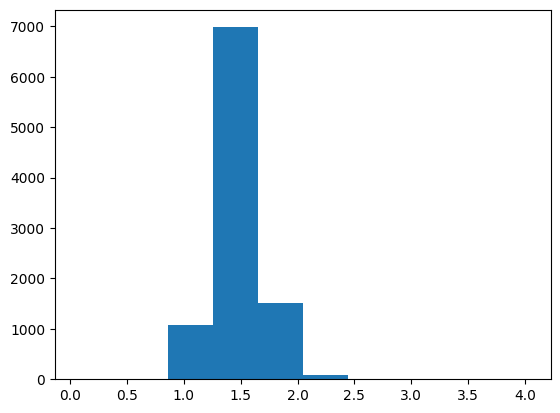

In [72]:
plt.hist(df['activity_average_met'])

In [73]:
df.iloc[:,1].name

'day'

day


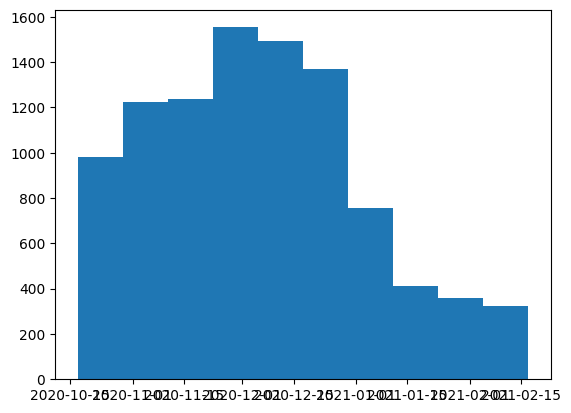

activity_average_met


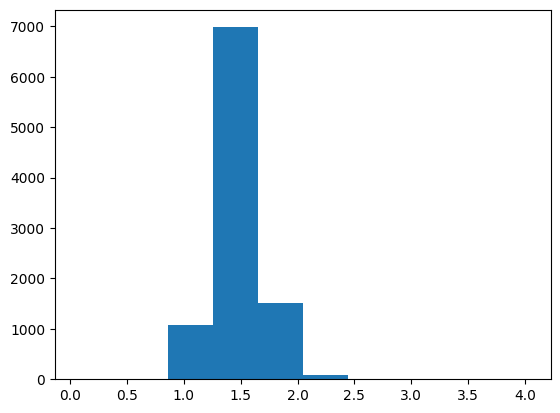

activity_cal_active


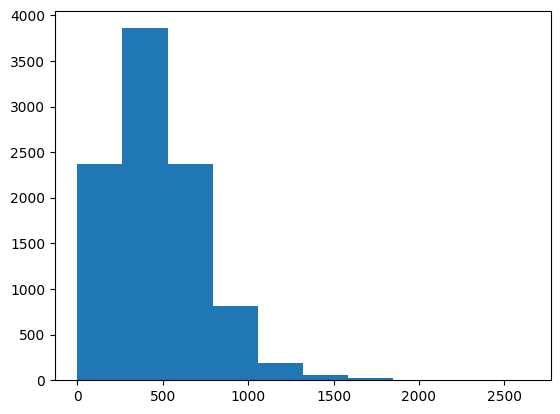

activity_cal_total


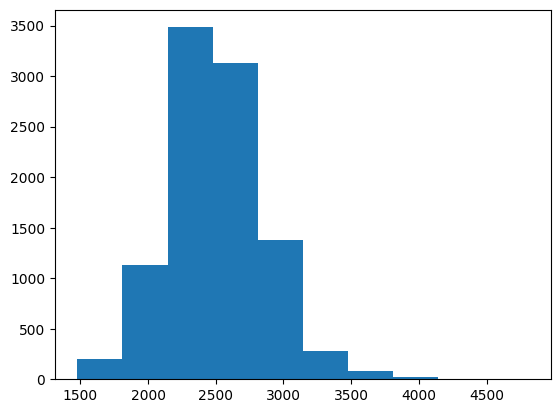

activity_daily_movement


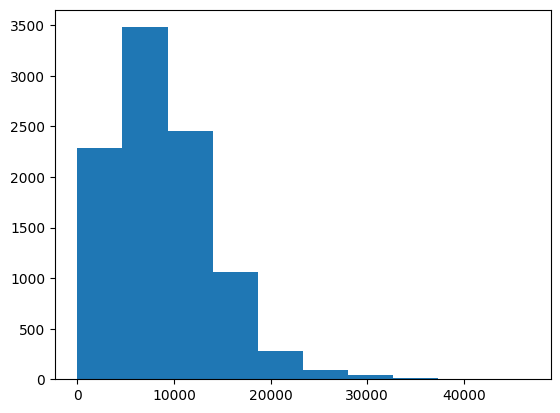

activity_high


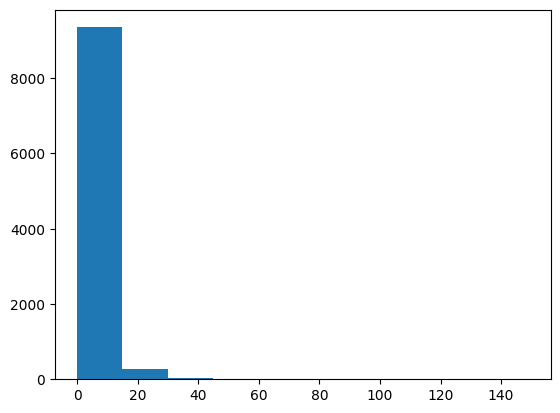

activity_inactive


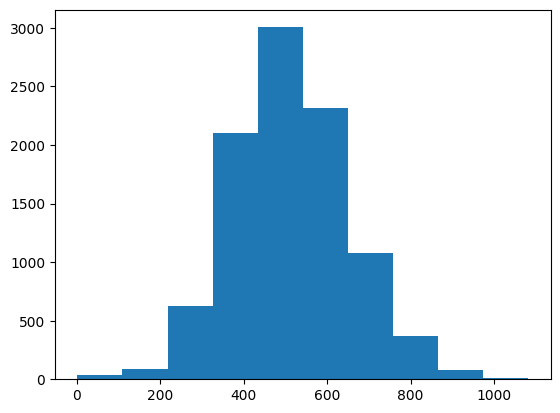

activity_inactivity_alerts


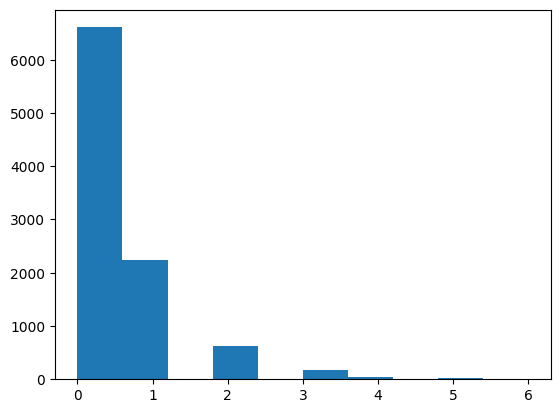

activity_low


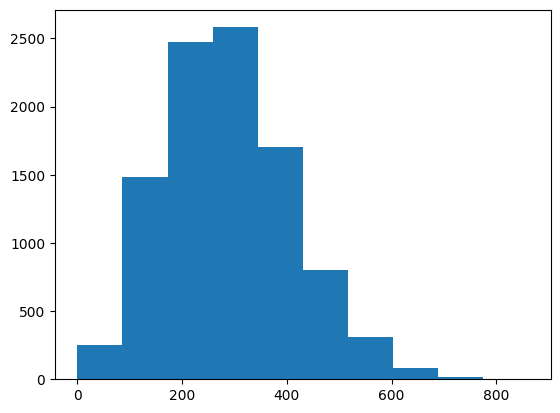

activity_medium


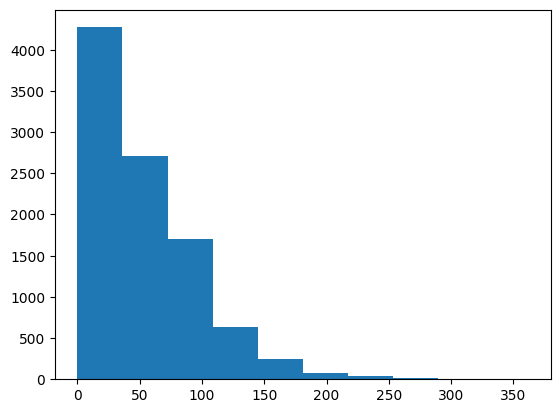

activity_met_min_high


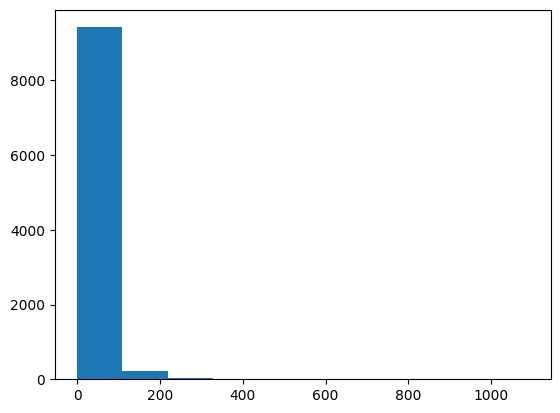

activity_met_min_inactive


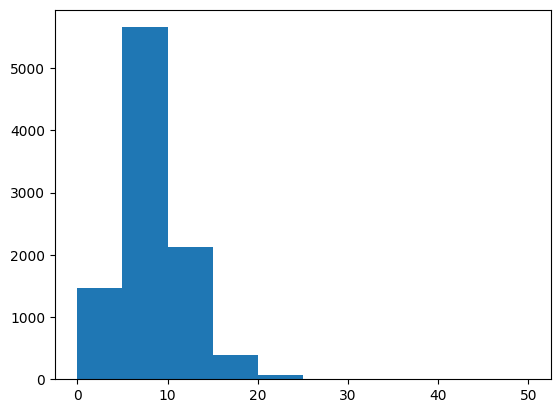

activity_met_min_low


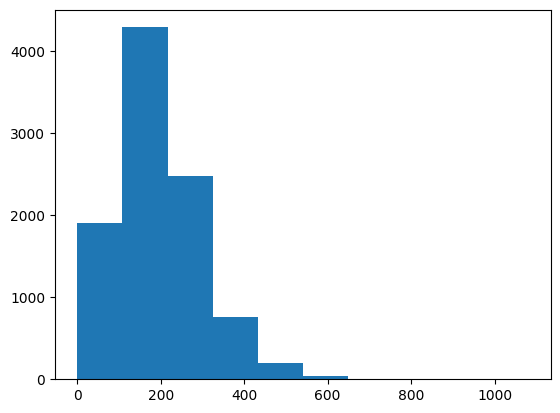

activity_met_min_medium


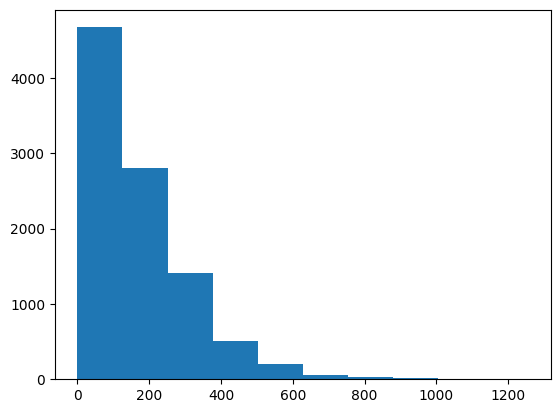

activity_non_wear


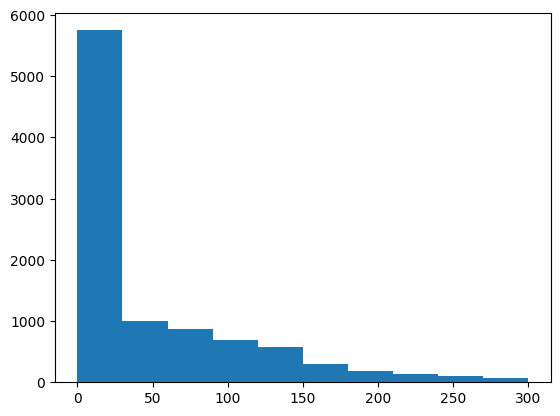

activity_rest


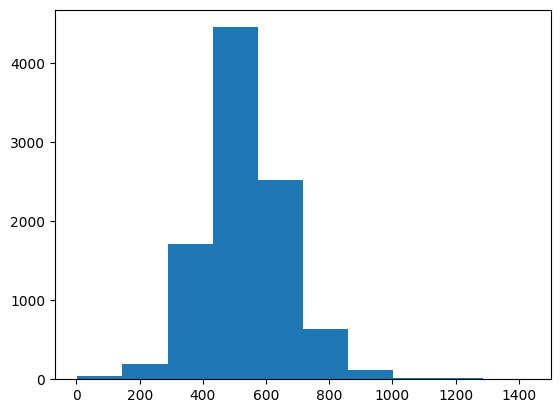

activity_score


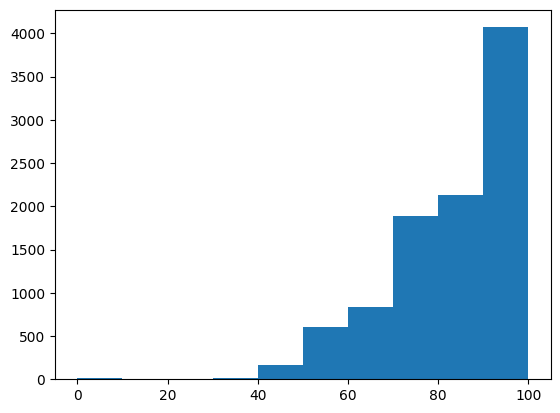

activity_score_meet_daily_targets


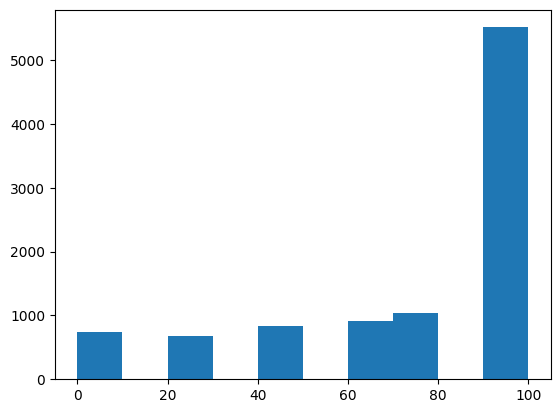

activity_score_move_every_hour


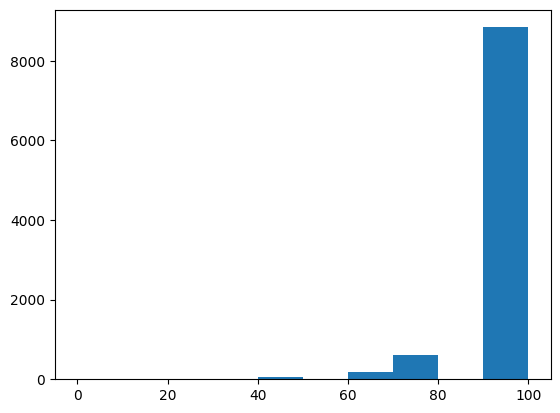

activity_score_recovery_time


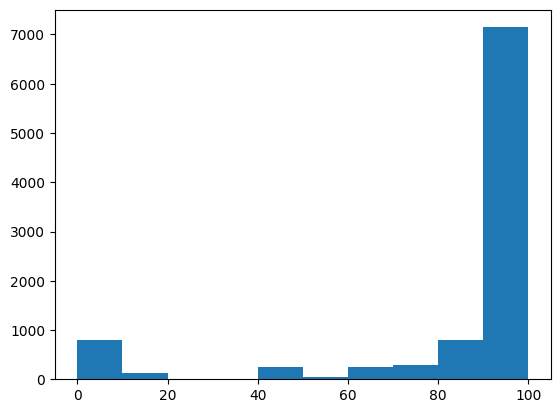

activity_score_stay_active


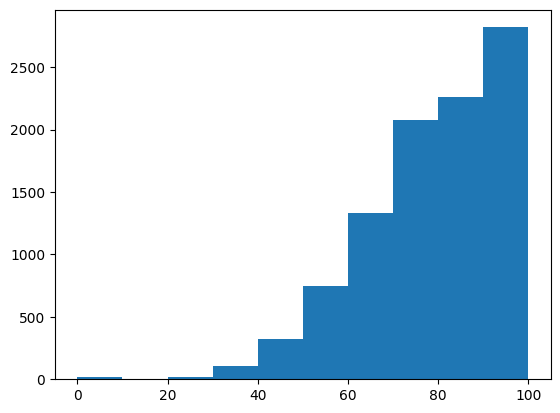

activity_score_training_frequency


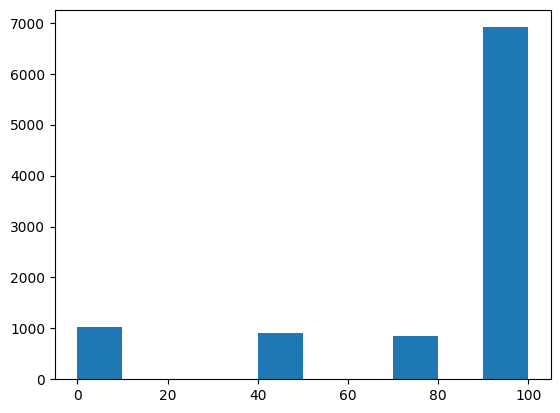

activity_score_training_volume


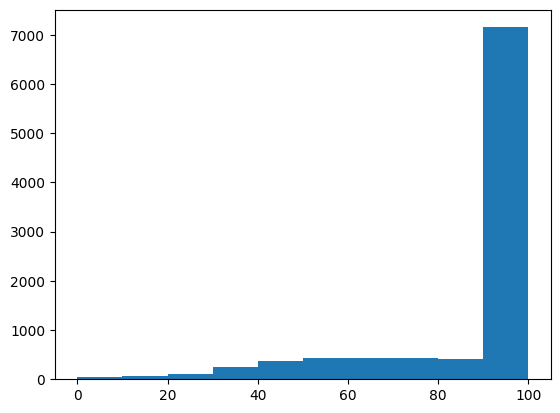

activity_steps


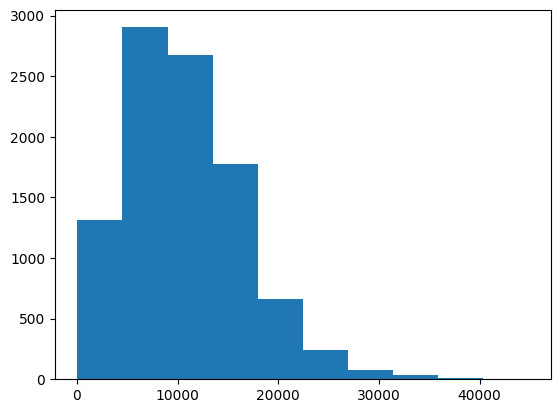

activity_total


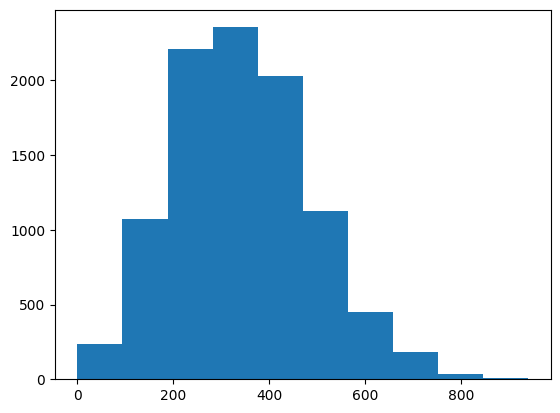

sleep_awake


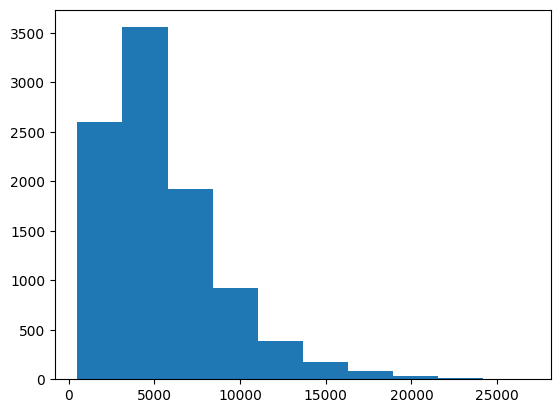

sleep_breath_average


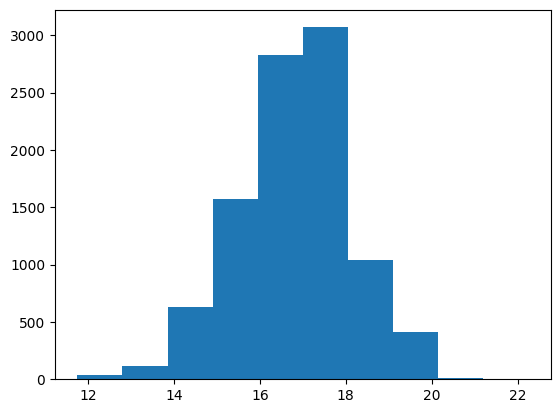

sleep_deep


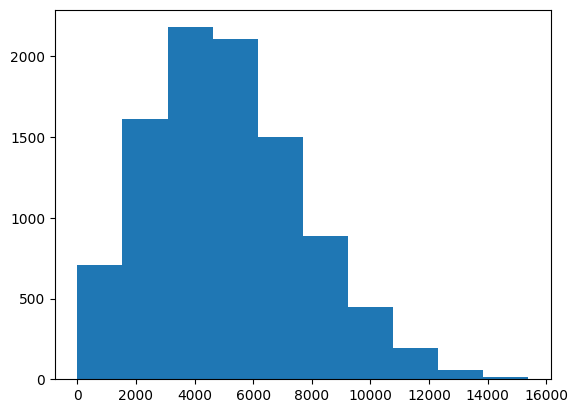

sleep_duration


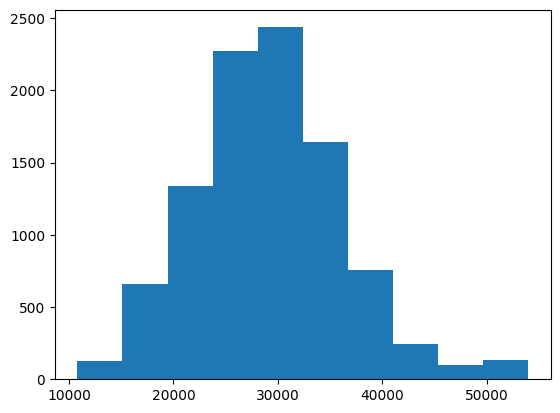

sleep_efficiency


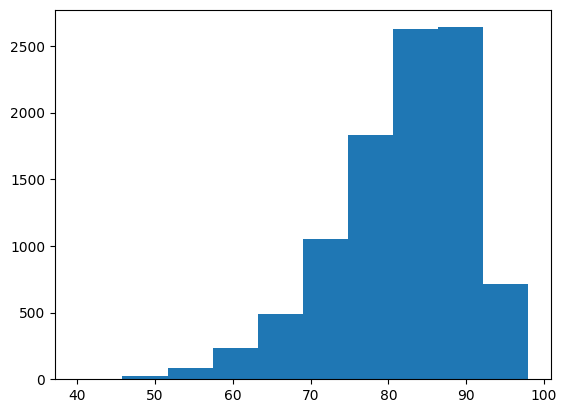

sleep_hr_average


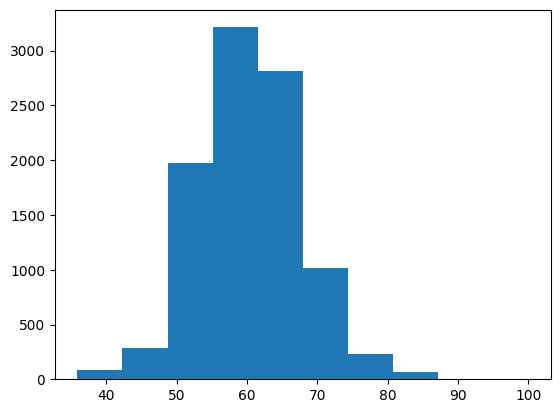

sleep_hr_lowest


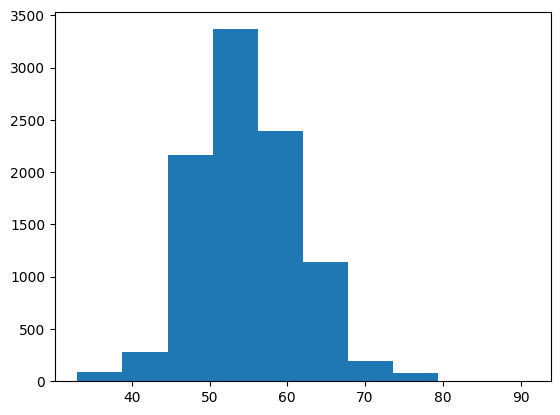

sleep_light


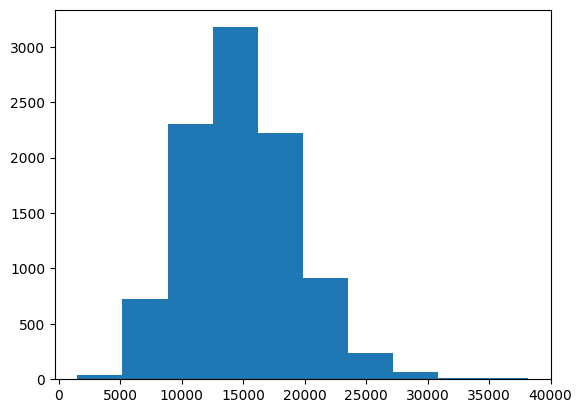

sleep_midpoint_at_delta


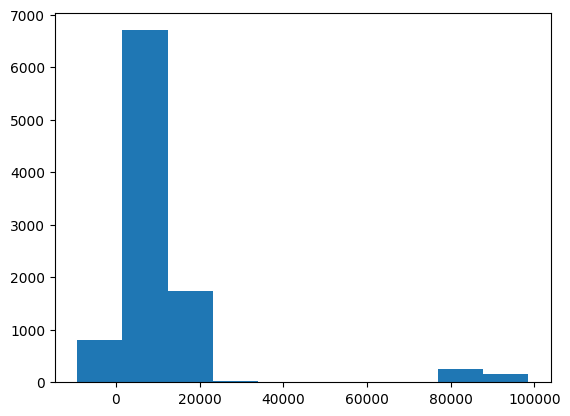

sleep_midpoint_time


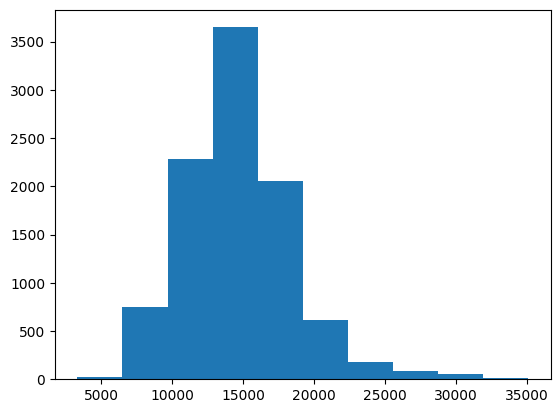

sleep_onset_latency


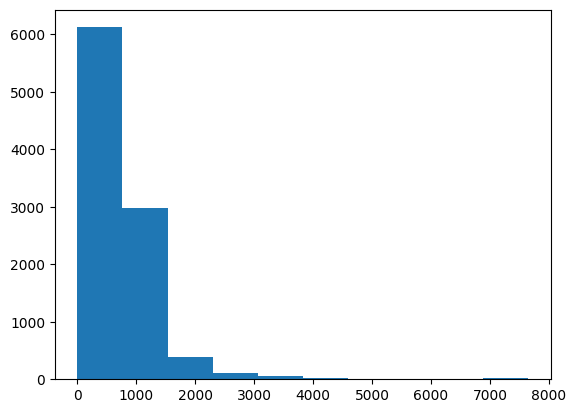

sleep_period_id


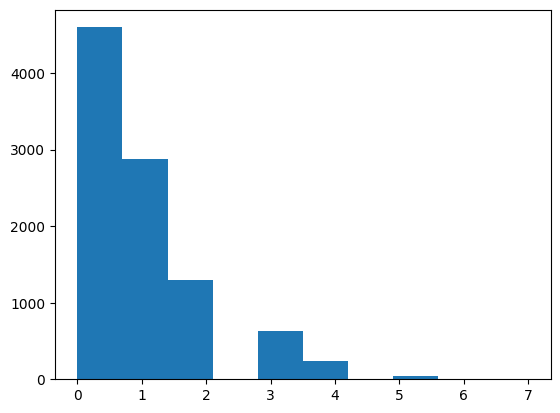

sleep_rem


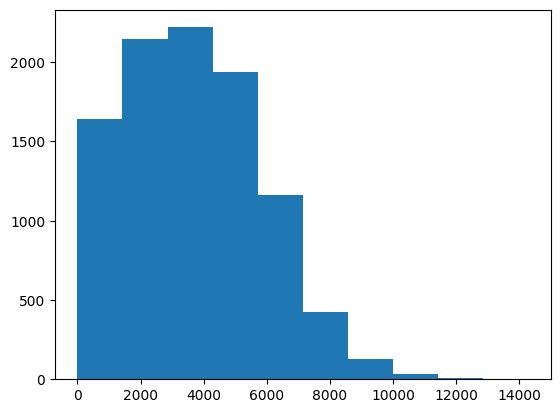

sleep_restless


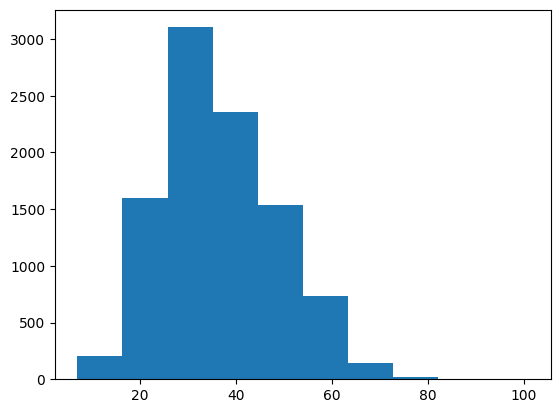

sleep_rmssd


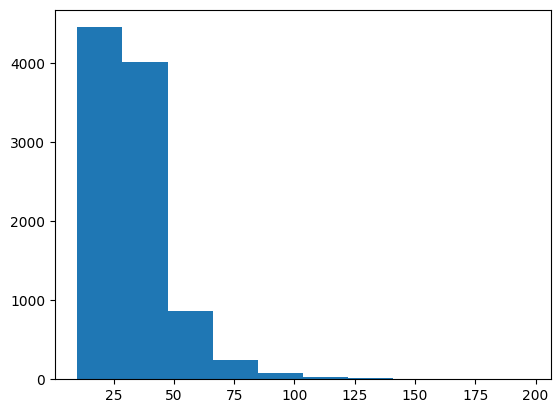

sleep_score


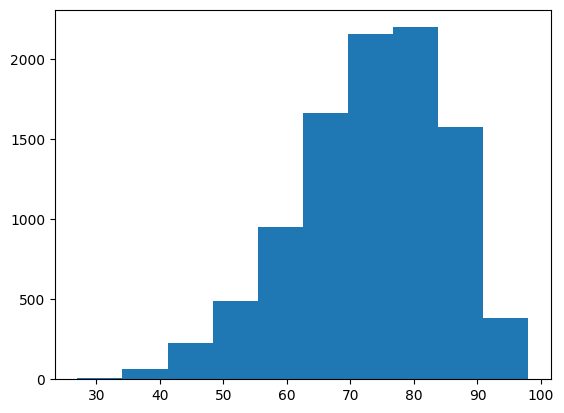

sleep_score_alignment


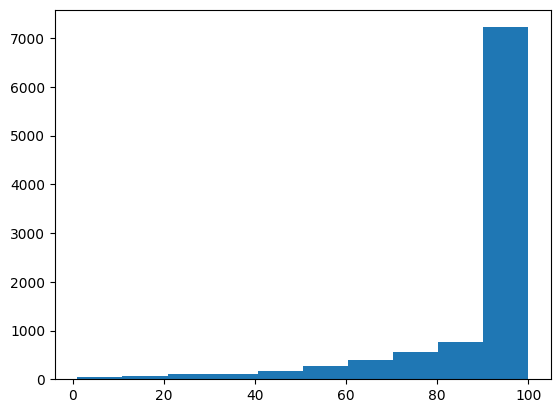

sleep_score_deep


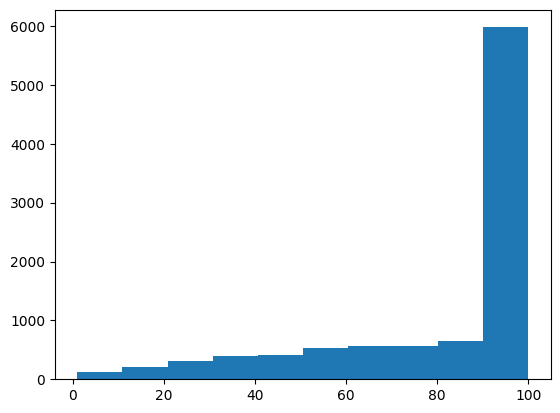

sleep_score_disturbances


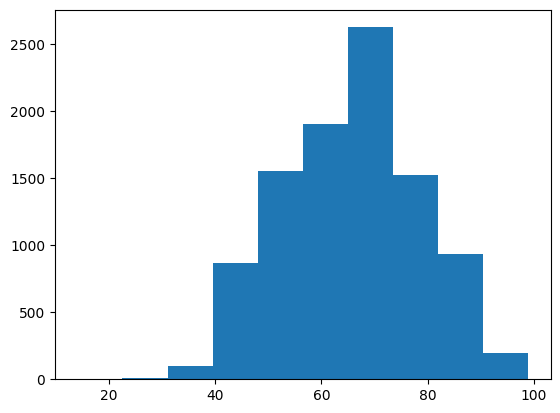

sleep_score_efficiency


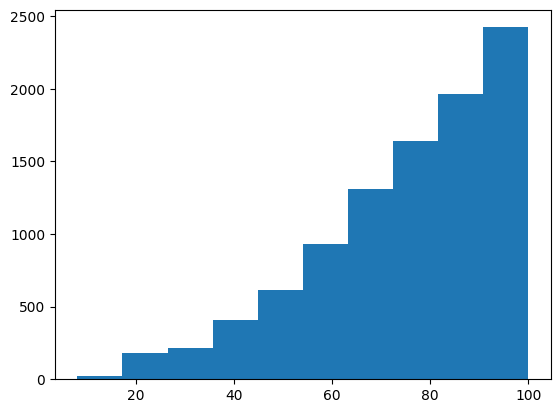

sleep_score_latency


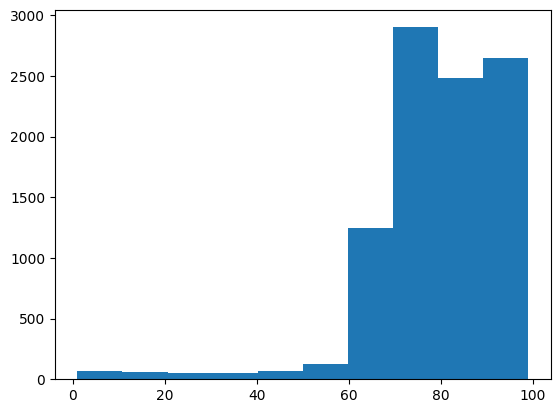

sleep_score_rem


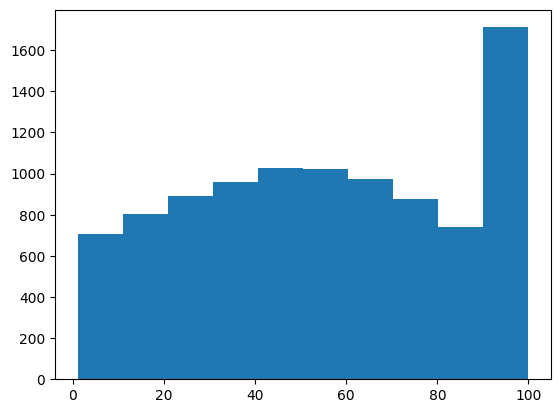

sleep_score_total


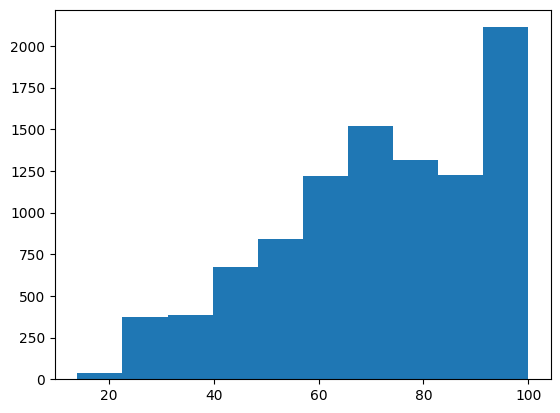

sleep_temperature_delta


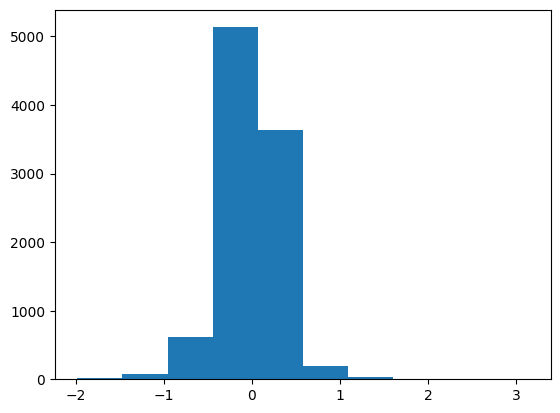

sleep_temperature_deviation


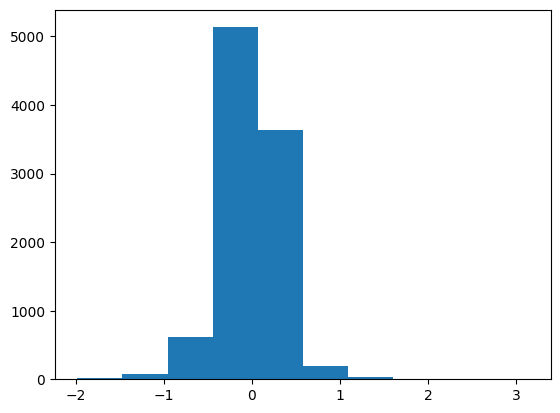

sleep_total


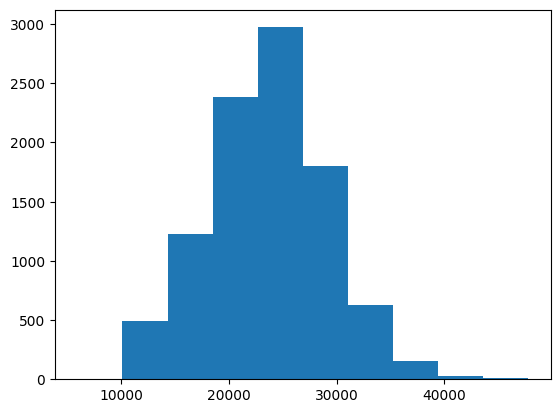

In [74]:
for i in range(1,52):
  his = df.iloc[:,i]
  print(df.iloc[:,i].name)
  plt.hist(his)
  plt.show()

# 모델 학습
* 타겟 : 'DIAG_NM', 'TOTAL'
> 타겟에 따른 모델을 만들어 제일 좋은 모델을 체택한다.

* DIAG_NM : 진단명
> 분류 모델 제작
>
> <데이터 분류>
>* CN, Cognitive normal 정상인
>* MCI, Mild cognitive impairment 경도인지장애
>* Dem, Dementia 치매
>
> <타겟 종류>
> 1. 정상인 vs 치매 + 치매 위험군
> 2. 정상인 vs 치매 위험군
> 3. 정상인 + 치매 위험군 vs 치매 (불균형 비율)
> 4. 정상인 vs 치매
> 5. 치매 위험군 vs 치매

* TOTAL : 인지기능 총점
> 회귀 모델 제작
> * 인지기능 점수에 따른 회귀 모델

# 분류모델

## 분류모델 Taget 값 정제

In [75]:
taget = ['DIAG_NM', 'TOTAL']
Y_DIAG_NM = df['DIAG_NM']
Y_TOTAL = df['TOTAL']
X = df.drop(columns=['EMAIL','day','DIAG_NM','TOTAL'], axis=1)

In [76]:
Y_DIAG_NM

0       MCI
1       MCI
2       MCI
3       MCI
4       MCI
       ... 
9700     CN
9701     CN
9702     CN
9703     CN
9704     CN
Name: DIAG_NM, Length: 9705, dtype: object

In [77]:
Y_DIAG_NM.value_counts()

CN     5781
MCI    3353
Dem     571
Name: DIAG_NM, dtype: int64

<Axes: >

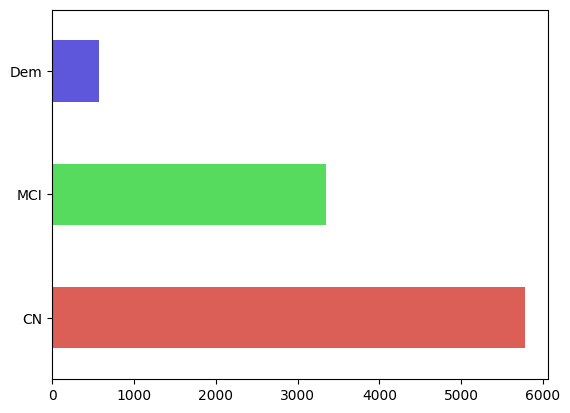

In [177]:
colors = sns.color_palette('hls',3)
Y_DIAG_NM.value_counts().plot(kind = 'barh',color=colors)

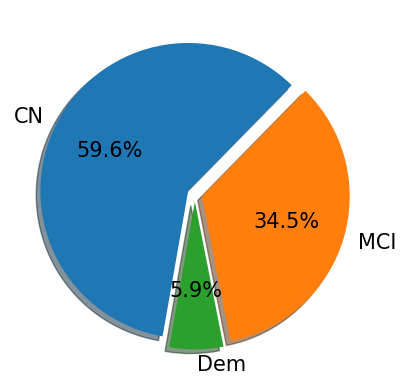

In [179]:
data = Y_DIAG_NM.value_counts()
labels = list(Y_DIAG_NM.value_counts().index)
explode = [0.05, 0.05, 0.05]
plt.pie(data, labels=labels, autopct='%.1f%%',textprops = {"fontsize":15}, startangle=260, counterclock=False, explode=explode, shadow=True)
plt.show()

In [78]:
from category_encoders import OrdinalEncoder, OneHotEncoder
encoder = OrdinalEncoder()
oneencoder = OneHotEncoder()
Y_DIAG_ONE = oneencoder.fit_transform(Y_DIAG_NM)
Y_DIAG_ONE

DIAG_NM_1  DIAG_NM_2  DIAG_NM_3
0             1          0          0
1             1          0          0
2             1          0          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
9700          0          1          0
9701          0          1          0
9702          0          1          0
9703          0          1          0
9704          0          1          0

[9705 rows x 3 columns]

In [79]:
# MCI : 1 / 굳이 필요없음 -> 치매 환자와 정상인이 섞여있는 데이터
Y_DIAG_ONE['DIAG_NM_1'].value_counts()

0    6352
1    3353
Name: DIAG_NM_1, dtype: int64

In [80]:
# CN : 1 / 정상인 사람과 치매 고위험군 + 치매 환자
y_CN = Y_DIAG_ONE['DIAG_NM_2']
print(Y_DIAG_ONE['DIAG_NM_2'].value_counts())

1    5781
0    3924
Name: DIAG_NM_2, dtype: int64


In [81]:
# Dem : 1 / 비치매와 치매
Y_DIAG_ONE['DIAG_NM_3'].value_counts()

0    9134
1     571
Name: DIAG_NM_3, dtype: int64

### No.1 분류모델
* 타겟 : 정상인 사람 vs 치매 고위험군 + 치매 환자

1    5781
0    3924
Name: DIAG_NM_2, dtype: int64
1    0.595672
0    0.404328
Name: DIAG_NM_2, dtype: float64


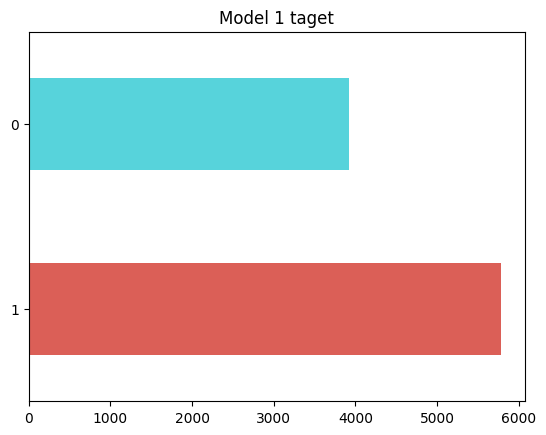

In [185]:
print(y_CN.value_counts())
print(y_CN.value_counts(normalize = True))

plt.title('Model 1 taget')
colors = sns.color_palette('hls',2)
y_CN.value_counts().plot(kind = 'barh',color=colors)
plt.show()

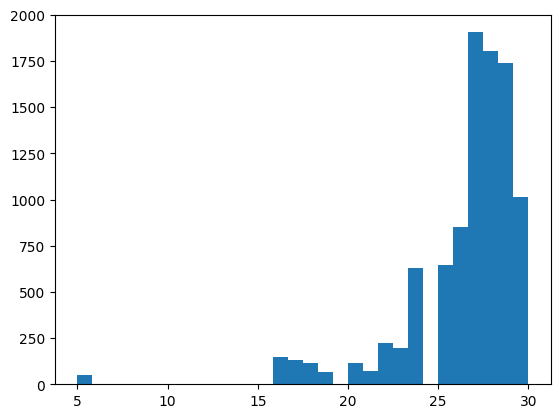

In [184]:
his = df['TOTAL']
plt.hist(his,bins=30)
plt.show()

In [83]:
#데이터 셋 분리
x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(X, y_CN, test_size = 0.2, random_state = 42)
print('train : ', x_train_1.shape, y_train_1.shape)
print('val : ', x_val_1.shape, y_val_1.shape)

train :  (7764, 51) (7764,)
val :  (1941, 51) (1941,)


In [84]:
#기준 모델
base = y_train_1.mode()[0]
baseline = len(y_train_1) * [base]
baseline_acc = accuracy_score(y_train_1, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.599 입니다


In [85]:
print(classification_report(y_train_1, baseline))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3112
           1       0.60      1.00      0.75      4652

    accuracy                           0.60      7764
   macro avg       0.30      0.50      0.37      7764
weighted avg       0.36      0.60      0.45      7764



In [86]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_1_d = DecisionTreeClassifier()
model_1_d.fit(x_train_1, y_train_1)

DecisionTreeClassifier()

In [87]:
pred_1d = model_1_d.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1d))
print(classification_report(y_val_1, pred_1d))

[[519 293]
 [314 815]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       812
           1       0.74      0.72      0.73      1129

    accuracy                           0.69      1941
   macro avg       0.68      0.68      0.68      1941
weighted avg       0.69      0.69      0.69      1941



In [88]:
#RandomForestClassifier
model_1_r = RandomForestClassifier()
model_1_r.fit(x_train_1, y_train_1)

RandomForestClassifier()

In [89]:
pred_1r = model_1_r.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1r))
print(classification_report(y_val_1, pred_1r))

[[ 529  283]
 [ 104 1025]]
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       812
           1       0.78      0.91      0.84      1129

    accuracy                           0.80      1941
   macro avg       0.81      0.78      0.79      1941
weighted avg       0.81      0.80      0.80      1941



In [90]:
# XGBClassifier
from xgboost import XGBClassifier
model_1_x = XGBClassifier()
model_1_x.fit(x_train_1,y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
pred_1x = model_1_x.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1x))
print(classification_report(y_val_1, pred_1x))

[[606 206]
 [132 997]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       812
           1       0.83      0.88      0.86      1129

    accuracy                           0.83      1941
   macro avg       0.82      0.81      0.82      1941
weighted avg       0.83      0.83      0.82      1941



In [92]:
#LogisticRegression
model_1_log = LogisticRegression()
model_1_log.fit(x_train_1, y_train_1)

LogisticRegression()

In [93]:
pred_1log = model_1_log.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1log))
print(classification_report(y_val_1, pred_1log))

[[227 585]
 [177 952]]
              precision    recall  f1-score   support

           0       0.56      0.28      0.37       812
           1       0.62      0.84      0.71      1129

    accuracy                           0.61      1941
   macro avg       0.59      0.56      0.54      1941
weighted avg       0.60      0.61      0.57      1941



In [94]:
def plot_feature_importance(importance, names, topn = 'all'):

    # 변수 중요도와 변수 이름을 정렬해서 df로 저장
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    # 변수가 너무 많으면 보기 어려우니, top N 지정
    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 그래프 그리기
    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)
    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    # 저장한 변수 중요도 df 반환
    return fi_df

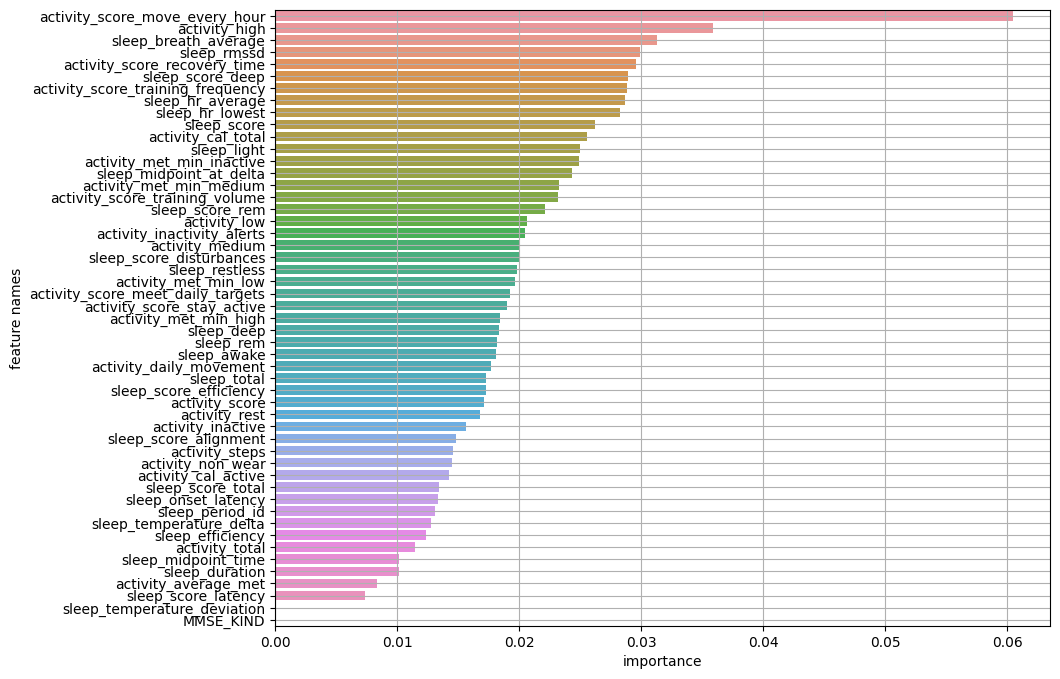

In [95]:
result1 = plot_feature_importance(model_1_x.feature_importances_, list(x_train_1))

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score


def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded, iteration_range=(0, model.best_iteration)
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

ROC-AUC: 0.9153016968676234


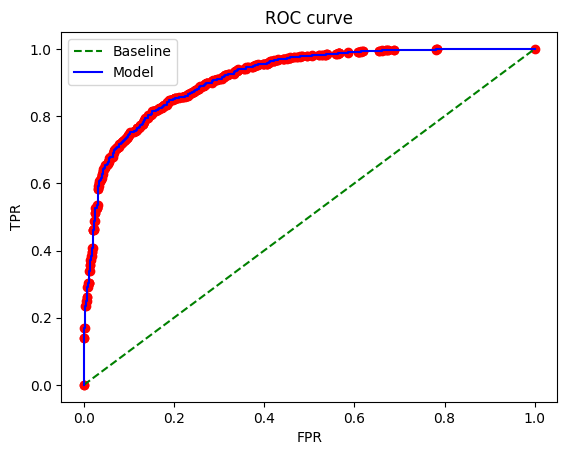

fpr       tpr  thresholds
0    0.000000  0.000000    1.999815
1    0.000000  0.000886    0.999815
2    0.000000  0.139947    0.990297
3    0.001232  0.139947    0.990073
4    0.001232  0.170062    0.986812
..        ...       ...         ...
455  0.782020  0.998229    0.044957
456  0.782020  0.999114    0.043292
457  0.783251  0.999114    0.043013
458  0.783251  1.000000    0.042588
459  1.000000  1.000000    0.000126

[460 rows x 3 columns]

In [97]:
%matplotlib inline
get_roc_auc(model_1_x, x_val_1, y_val_1)

In [98]:
# 제일 성능이 좋은 XGBClassifier을 사용함
from sklearn.pipeline import make_pipeline
# 오래걸리기에 결과 확인 후 참조표시
'''
model_1 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,)

params = {
    "xgbclassifier__max_depth": [2, 4, 6],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    model_1,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)

randomized_search.fit(x_train_1, y_train_1)
'''

'\nmodel_1 = XGBClassifier(\n        objective="binary:logistic",\n        eval_metric="error",\n        n_estimators=999,\n        random_state=42,\n        n_jobs=-1,\n        learning_rate=0.1,\n        use_label_encoder=False,)\n\nparams = {\n    "xgbclassifier__max_depth": [2, 4, 6],\n    "xgbclassifier__min_child_weight": [2, 4, 8],\n    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],\n}\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrandomized_search = RandomizedSearchCV(\n    model_1,\n    param_distributions=params,\n    scoring="roc_auc",\n    n_iter=10,\n    cv=3,\n    verbose=3,\n    random_state=42,\n)\n\nrandomized_search.fit(x_train_1, y_train_1)\n'

In [99]:
'''
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

>> 결과
최적 하이퍼파라미터:  {'xgbclassifier__min_child_weight': 8, 'xgbclassifier__max_depth': 6, 'xgbclassifier__colsample_bytree': 0.6}
최적 AUC:  0.9213219851517724
'''

'\nprint("최적 하이퍼파라미터: ", randomized_search.best_params_)\nprint("최적 AUC: ", randomized_search.best_score_)\n\n>> 결과\n최적 하이퍼파라미터:  {\'xgbclassifier__min_child_weight\': 8, \'xgbclassifier__max_depth\': 6, \'xgbclassifier__colsample_bytree\': 0.6}\n최적 AUC:  0.9213219851517724\n'

In [100]:
model_1_x2 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,
    )
model_1_x2.fit(x_train_1, y_train_1)
pred_1_x2 = model_1_x2.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1_x2))
print(classification_report(y_val_1, pred_1_x2))

[[629 183]
 [141 988]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       812
           1       0.84      0.88      0.86      1129

    accuracy                           0.83      1941
   macro avg       0.83      0.82      0.83      1941
weighted avg       0.83      0.83      0.83      1941



In [101]:
from sklearn.preprocessing import StandardScaler
model_1_s = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,
    ))
    
    
model_1_s.fit(x_train_1, y_train_1)
pred_1_s = model_1_s.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1_s))
print(classification_report(y_val_1, pred_1_s))
# StandardScaler 사용하고 차이가 없음

[[629 183]
 [141 988]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       812
           1       0.84      0.88      0.86      1129

    accuracy                           0.83      1941
   macro avg       0.83      0.82      0.83      1941
weighted avg       0.83      0.83      0.83      1941



In [102]:
model_1 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_1.fit(x_train_1, y_train_1)
pred_1 = model_1_s.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1))
print("검증 AUC: ", model_1.score(x_val_1, y_val_1))
print(classification_report(y_val_1, pred_1))

[[629 183]
 [141 988]]
검증 AUC:  0.8330757341576507
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       812
           1       0.84      0.88      0.86      1129

    accuracy                           0.83      1941
   macro avg       0.83      0.82      0.83      1941
weighted avg       0.83      0.83      0.83      1941



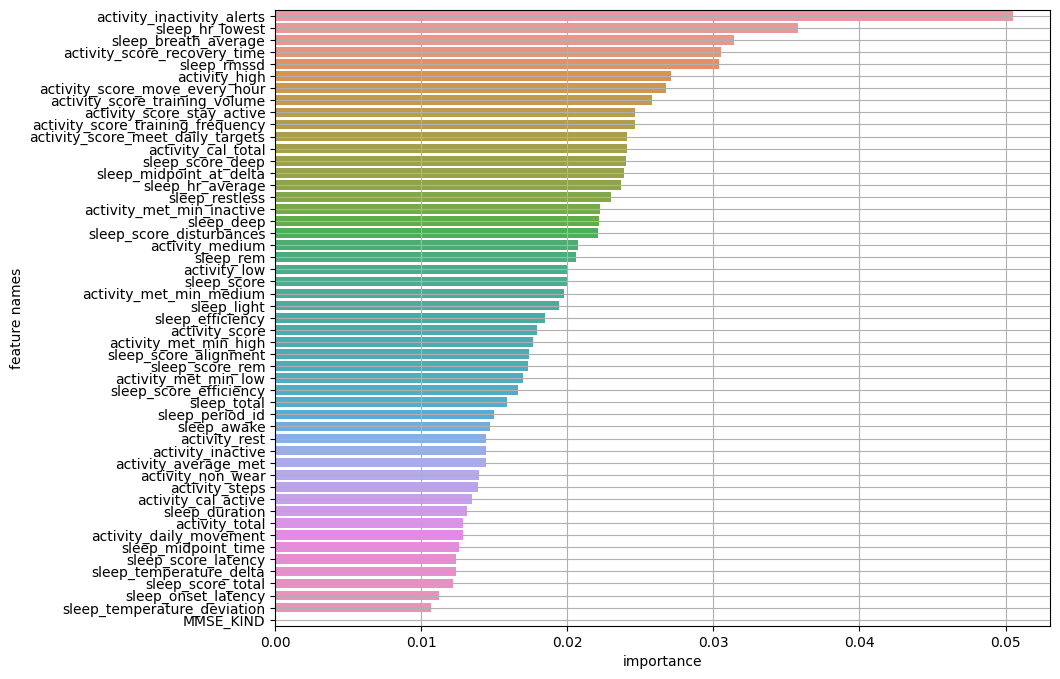

In [103]:
result1 = plot_feature_importance(model_1.feature_importances_, list(x_train_1))

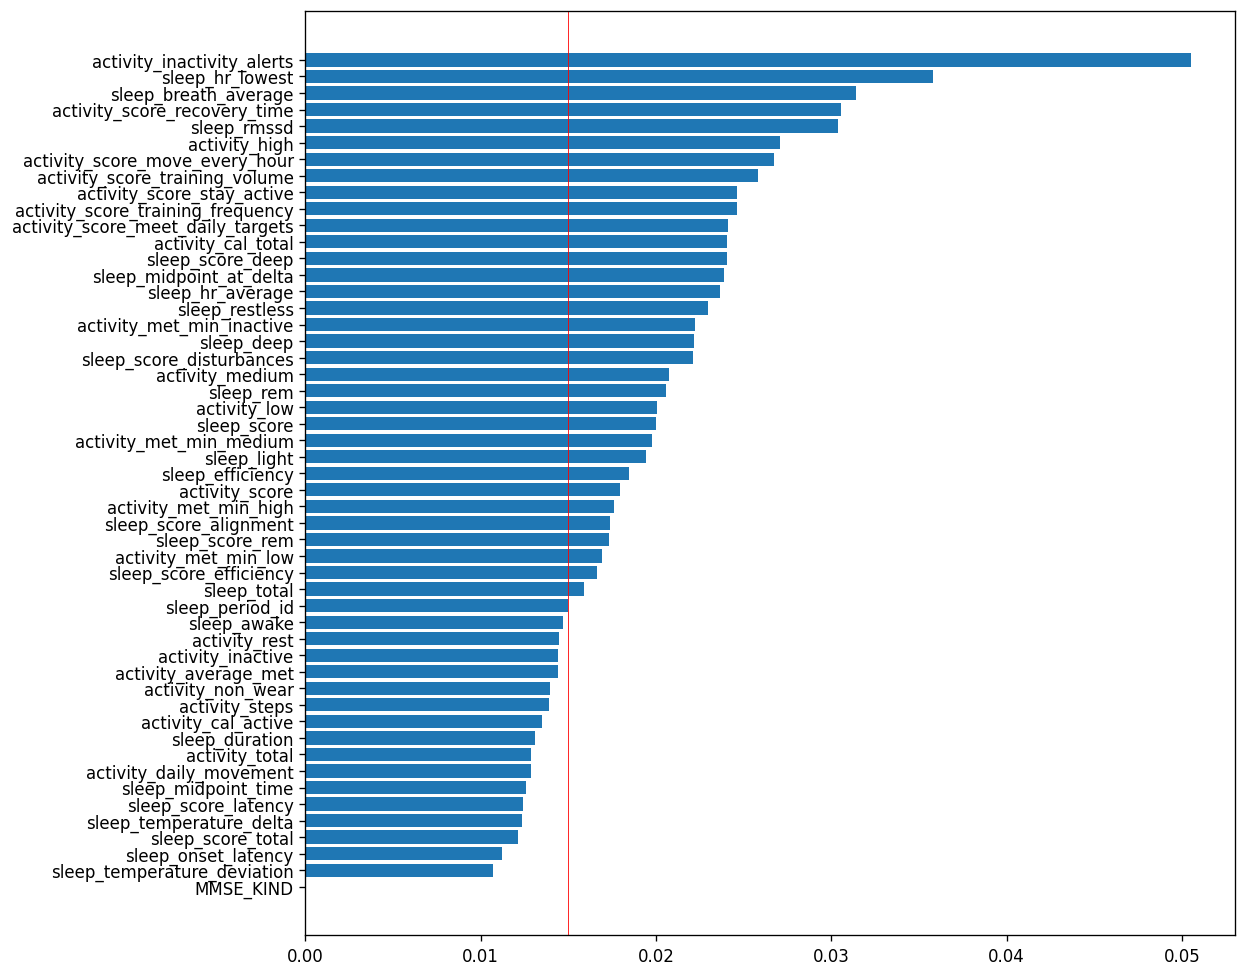

In [104]:
feature_importances = list(
    zip(x_train_1.columns, model_1.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [105]:
features_selected = list(filter(lambda x: x[1] >= 0.02, feature_importances))
print(features_selected)
selected_feature_names = list(map(lambda x: x[0], features_selected))

[('activity_inactivity_alerts', 0.05052849), ('sleep_hr_lowest', 0.03579463), ('sleep_breath_average', 0.031394202), ('activity_score_recovery_time', 0.03052574), ('sleep_rmssd', 0.030409215), ('activity_high', 0.02709098), ('activity_score_move_every_hour', 0.026725518), ('activity_score_training_volume', 0.02582545), ('activity_score_stay_active', 0.024647964), ('activity_score_training_frequency', 0.024616946), ('activity_score_meet_daily_targets', 0.024105761), ('activity_cal_total', 0.024054548), ('sleep_score_deep', 0.024046578), ('sleep_midpoint_at_delta', 0.023903012), ('sleep_hr_average', 0.023641955), ('sleep_restless', 0.02298032), ('activity_met_min_inactive', 0.022205224), ('sleep_deep', 0.02214398), ('sleep_score_disturbances', 0.022132851), ('activity_medium', 0.020763867), ('sleep_rem', 0.020574514), ('activity_low', 0.020029005)]


In [106]:
x_train_1_selected = x_train_1[selected_feature_names]
x_val_1_selected = x_val_1[selected_feature_names]

model_1f = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_1f.fit(x_train_1_selected, y_train_1)
pred_1 = model_1f.predict(x_val_1_selected)
print(confusion_matrix(y_val_1, pred_1))
print("검증 AUC: ", model_1f.score(x_val_1_selected, y_val_1))
print(classification_report(y_val_1, pred_1))

[[639 173]
 [142 987]]
검증 AUC:  0.8377125193199382
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       812
           1       0.85      0.87      0.86      1129

    accuracy                           0.84      1941
   macro avg       0.83      0.83      0.83      1941
weighted avg       0.84      0.84      0.84      1941



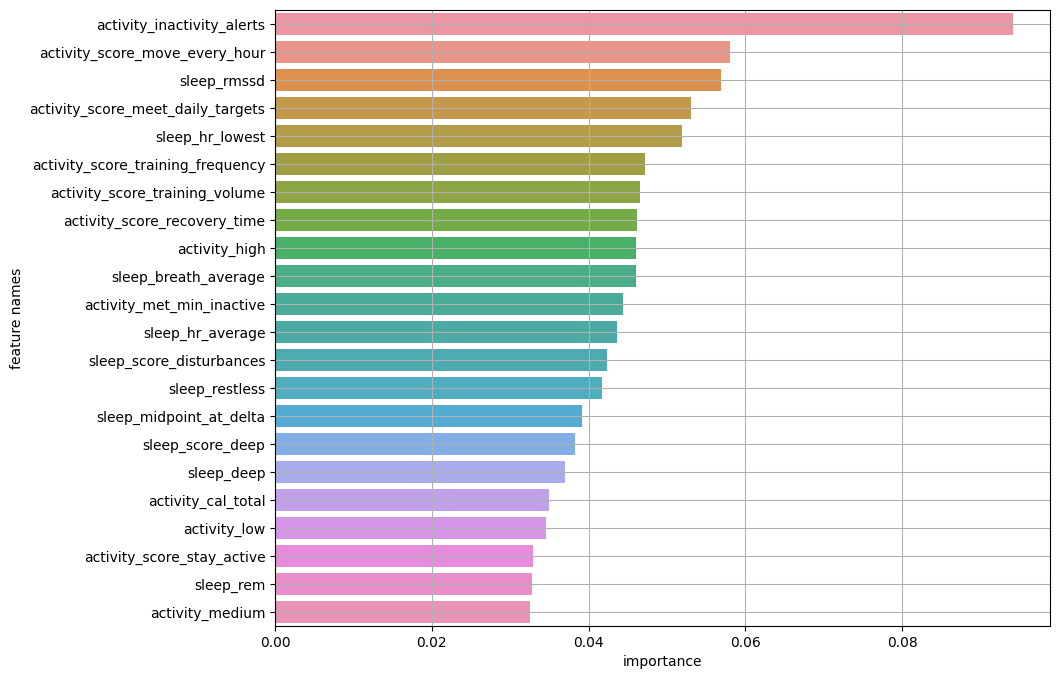

In [107]:
result1 = plot_feature_importance(model_1f.feature_importances_, list(x_train_1_selected))

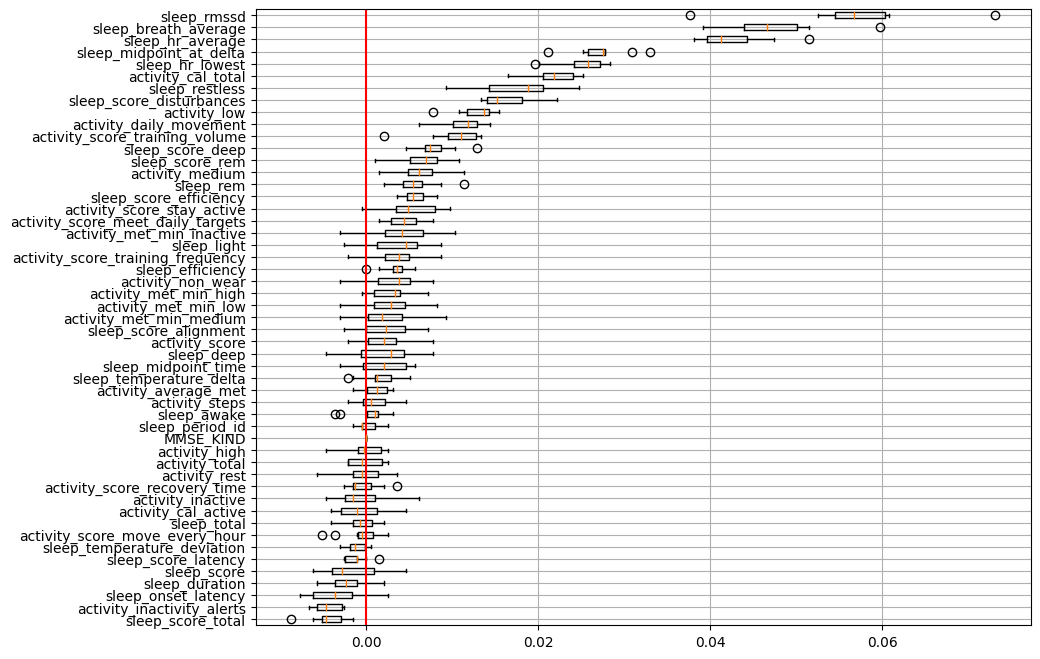

In [108]:
from sklearn.inspection import permutation_importance

model_1p = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_1p.fit(x_train_1, y_train_1)

pfi1 = permutation_importance(model_1p, x_val_1, y_val_1, n_repeats=10, 
                              scoring = 'accuracy', random_state=20)

sorted_idx = pfi1.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi1.importances[sorted_idx].T, vert=False, labels=x_train_1.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

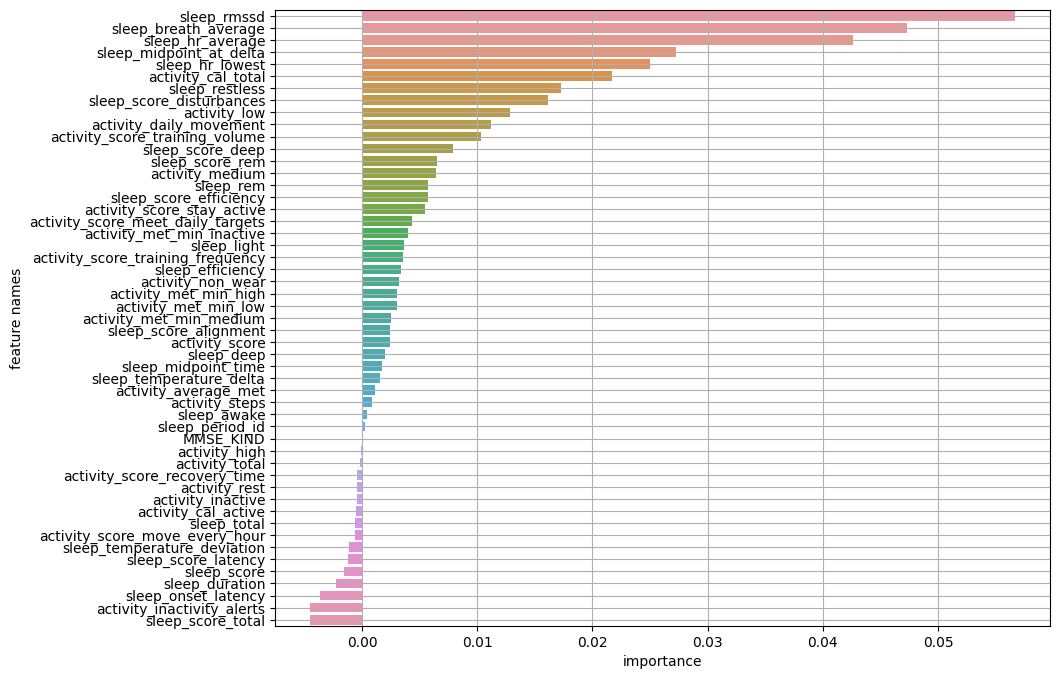

In [109]:
result2 = plot_feature_importance(pfi1.importances_mean, list(x_train_1))

In [110]:
model_1p2 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_1p2.fit(x_train_1, y_train_1)

pfi2 = permutation_importance(model_1p2, x_val_1, y_val_1, n_repeats=10, 
                              scoring = 'accuracy', random_state=20)

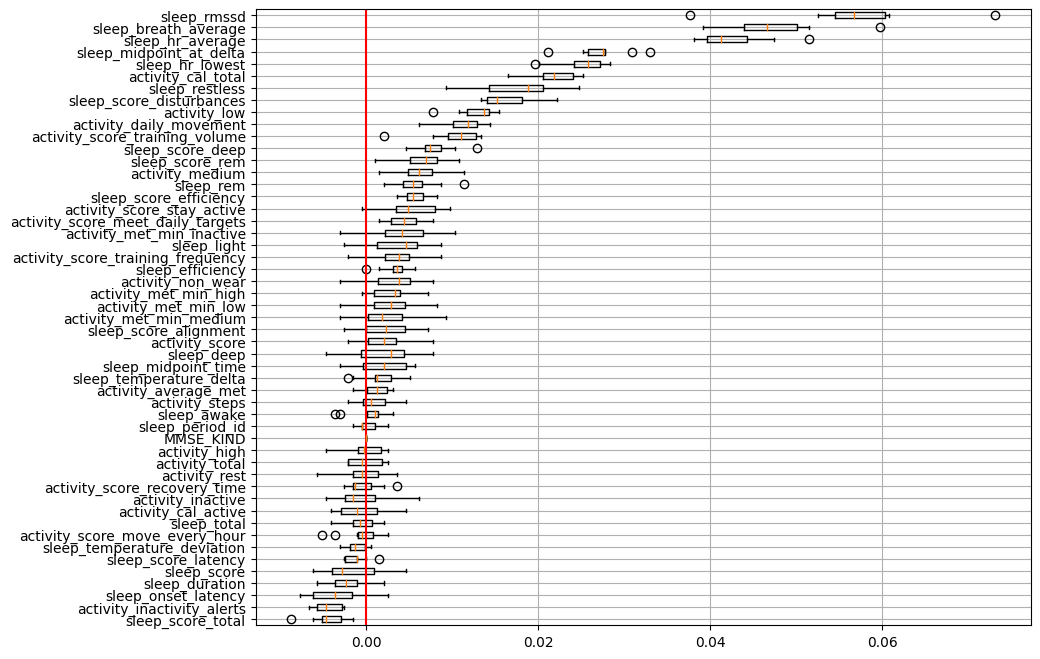

In [111]:
sorted_idx = pfi2.importances_mean.argsort()
plt.figure(figsize = (10, 8))
plt.boxplot(pfi2.importances[sorted_idx].T, vert=False, labels=x_train_1.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

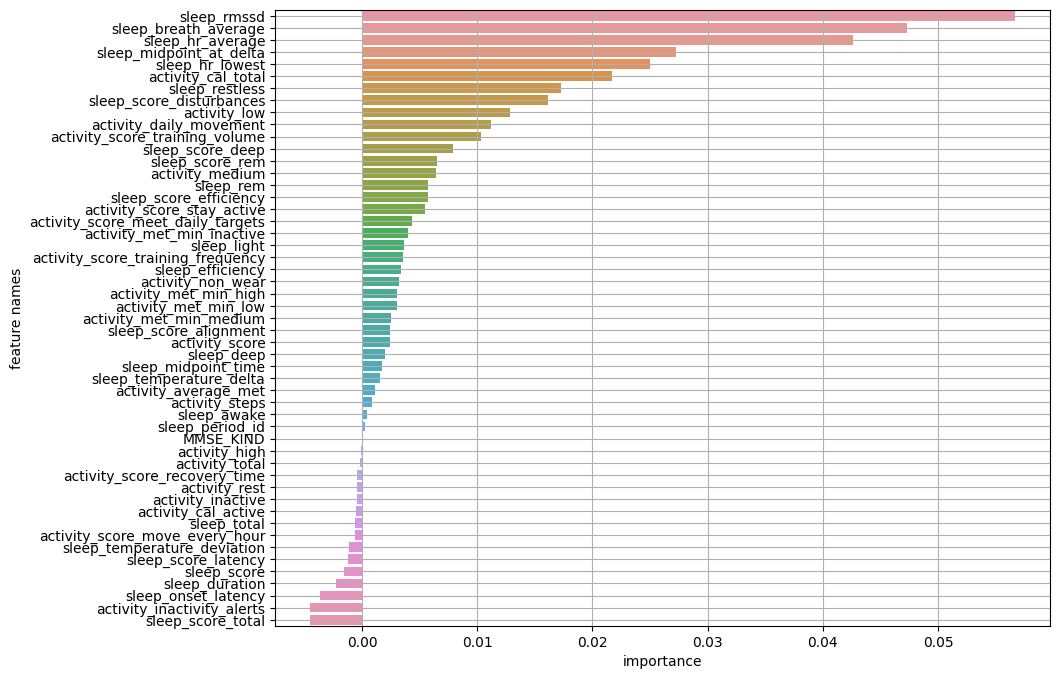

In [112]:
result2 = plot_feature_importance(pfi2.importances_mean, list(x_train_1))

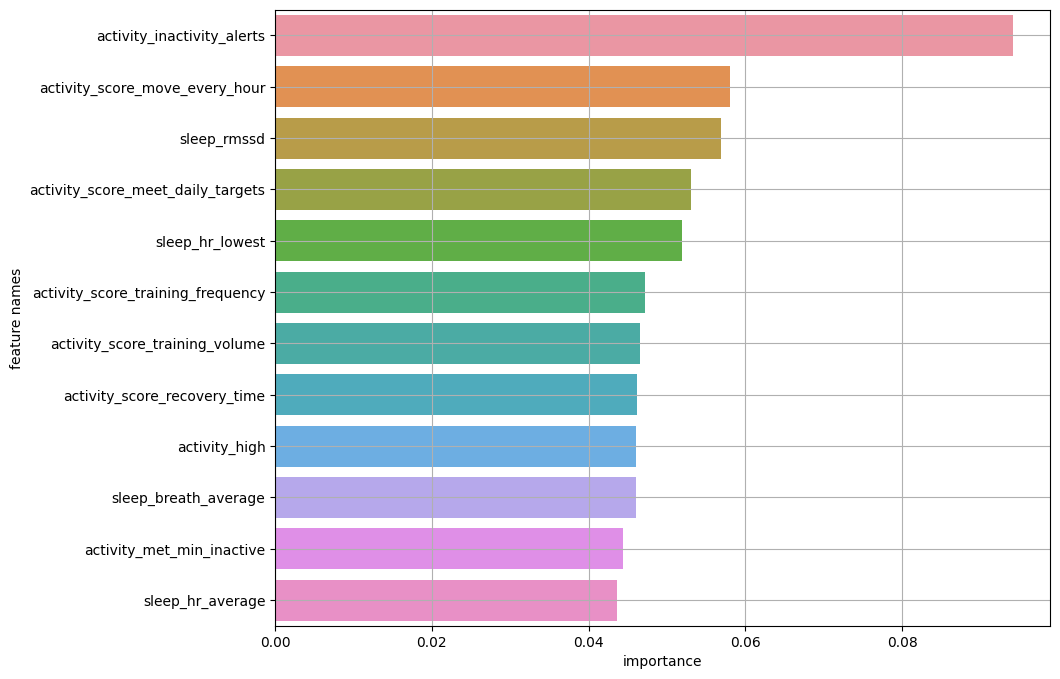

In [113]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
r2 = plot_feature_importance(model_1f.feature_importances_, list(x_train_1_selected),12)

#### 채택 모델

In [114]:
model_1 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

watchlist = [(x_train_1, y_train_1), (x_val_1, y_val_1)]

model_1.fit(
    x_train_1,
    y_train_1,
    eval_set=watchlist,
    early_stopping_rounds=50,)

pred_1 = model_1_s.predict(x_val_1)
print(confusion_matrix(y_val_1, pred_1))
print("검증 AUC: ", model_1.score(x_val_1, y_val_1))
print(classification_report(y_val_1, pred_1))

[0]	validation_0-error:0.31285	validation_1-error:0.35343
[1]	validation_0-error:0.26971	validation_1-error:0.32870
[2]	validation_0-error:0.26275	validation_1-error:0.33076
[3]	validation_0-error:0.25914	validation_1-error:0.31427
[4]	validation_0-error:0.25734	validation_1-error:0.32045
[5]	validation_0-error:0.23957	validation_1-error:0.30294
[6]	validation_0-error:0.22411	validation_1-error:0.29366
[7]	validation_0-error:0.22604	validation_1-error:0.29109
[8]	validation_0-error:0.22347	validation_1-error:0.28697
[9]	validation_0-error:0.22089	validation_1-error:0.29109
[10]	validation_0-error:0.21999	validation_1-error:0.29057
[11]	validation_0-error:0.21278	validation_1-error:0.28130
[12]	validation_0-error:0.20556	validation_1-error:0.27821
[13]	validation_0-error:0.20041	validation_1-error:0.27409
[14]	validation_0-error:0.19681	validation_1-error:0.27357
[15]	validation_0-error:0.19861	validation_1-error:0.27202
[16]	validation_0-error:0.19796	validation_1-error:0.27151
[17]	va

In [115]:
def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_val_encoded, y_val))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_val_encoded, y_val,cmap='Blues')
    plt.show()

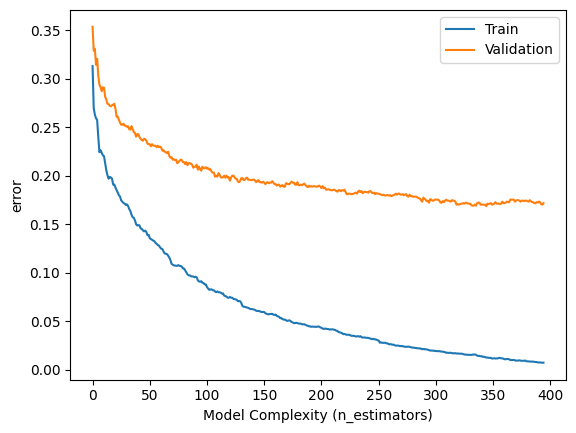

검증 정확도 0.8315301391035549
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       812
           1       0.84      0.88      0.86      1129

    accuracy                           0.83      1941
   macro avg       0.83      0.82      0.82      1941
weighted avg       0.83      0.83      0.83      1941

ROC-AUC: 0.9072133236178317


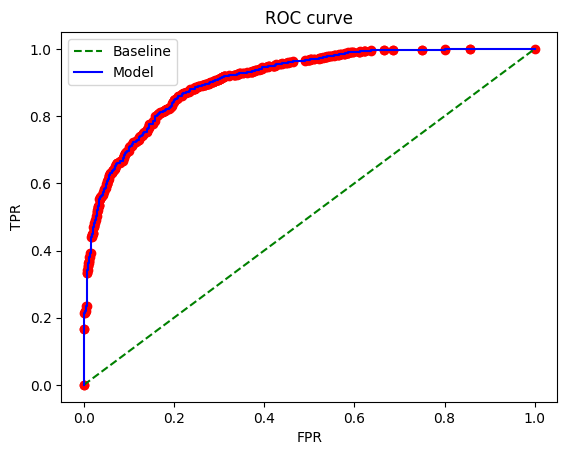

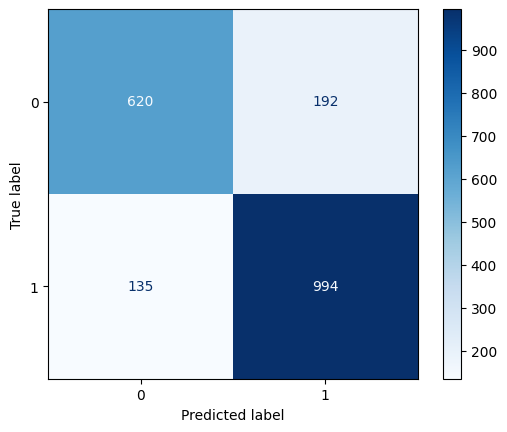

In [116]:
summarize_results(model_1, x_val_1, y_val_1)

### No.2 분류모델
* 타겟: 치매환자와 비치매군 분류

In [117]:
# 분류 모델 2
Y_DIAG_ONE['DIAG_NM_3'].value_counts()

0    9134
1     571
Name: DIAG_NM_3, dtype: int64

0    9134
1     571
Name: DIAG_NM_3, dtype: int64
0    0.941164
1    0.058836
Name: DIAG_NM_3, dtype: float64


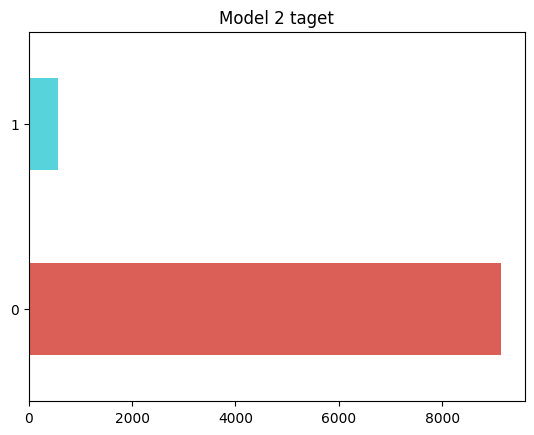

In [187]:
y_dem = Y_DIAG_ONE['DIAG_NM_3']
print(y_dem.value_counts())
print(y_dem.value_counts(normalize = True))

plt.title('Model 2 taget')
colors = sns.color_palette('hls',2)
y_dem.value_counts().plot(kind = 'barh',color=colors)
plt.show()

In [119]:
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(X, y_dem, test_size = 0.2, random_state = 42)
print('train : ', x_train_2.shape, y_train_2.shape)
print('val : ', x_val_2.shape, y_val_2.shape)

train :  (7764, 51) (7764,)
val :  (1941, 51) (1941,)


In [120]:
# 기준모델
base2 = y_train_2.mode()[0]
baseline2 = len(y_train_2) * [base]
baseline_acc2 = accuracy_score(y_train_2, baseline2)
print(f'기준모델의 정확도는 {baseline_acc2.round(3)} 입니다')

기준모델의 정확도는 0.058 입니다


In [121]:
model_2_d = DecisionTreeClassifier()
model_2_d.fit(x_train_2, y_train_2)
pred_2d = model_2_d.predict(x_val_2)
print(confusion_matrix(y_val_2, pred_2d))
print(classification_report(y_val_2, pred_2d))

[[1768   56]
 [  58   59]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1824
           1       0.51      0.50      0.51       117

    accuracy                           0.94      1941
   macro avg       0.74      0.74      0.74      1941
weighted avg       0.94      0.94      0.94      1941



In [122]:
model_2_r = RandomForestClassifier()
model_2_r.fit(x_train_2, y_train_2)
pred_2r = model_2_r.predict(x_val_2)
print(confusion_matrix(y_val_2, pred_2r))
print(classification_report(y_val_2, pred_2r))

[[1820    4]
 [  70   47]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1824
           1       0.92      0.40      0.56       117

    accuracy                           0.96      1941
   macro avg       0.94      0.70      0.77      1941
weighted avg       0.96      0.96      0.95      1941



In [123]:
model_2_x = XGBClassifier()
model_2_x.fit(x_train_2,y_train_2)
pred_2x = model_2_x.predict(x_val_2)
print(confusion_matrix(y_val_2, pred_2x))
print(classification_report(y_val_2, pred_2x))

[[1817    7]
 [  43   74]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1824
           1       0.91      0.63      0.75       117

    accuracy                           0.97      1941
   macro avg       0.95      0.81      0.87      1941
weighted avg       0.97      0.97      0.97      1941



In [124]:
model_2_log = LogisticRegression()
model_2_log.fit(x_train_2, y_train_2)
pred_2log = model_2_log.predict(x_val_2)
print(confusion_matrix(y_val_2, pred_2log))
print(classification_report(y_val_2, pred_2log))

[[1821    3]
 [ 113    4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1824
           1       0.57      0.03      0.06       117

    accuracy                           0.94      1941
   macro avg       0.76      0.52      0.52      1941
weighted avg       0.92      0.94      0.91      1941



In [125]:
model_2 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_val_2 == 0).sum() / (y_val_2 == 1).sum(),
)

watchlist = [(x_train_2, y_train_2), (x_val_2, y_val_2)]

model_2.fit(
    x_train_2,
    y_train_2,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.91761	validation_1-auc:0.84051
[1]	validation_0-auc:0.93746	validation_1-auc:0.87636
[2]	validation_0-auc:0.94650	validation_1-auc:0.88529
[3]	validation_0-auc:0.95423	validation_1-auc:0.88801
[4]	validation_0-auc:0.95757	validation_1-auc:0.89491
[5]	validation_0-auc:0.96008	validation_1-auc:0.90046
[6]	validation_0-auc:0.96790	validation_1-auc:0.90226
[7]	validation_0-auc:0.97225	validation_1-auc:0.91049
[8]	validation_0-auc:0.97439	validation_1-auc:0.91196
[9]	validation_0-auc:0.97885	validation_1-auc:0.92031
[10]	validation_0-auc:0.98078	validation_1-auc:0.92363
[11]	validation_0-auc:0.98133	validation_1-auc:0.92364
[12]	validation_0-auc:0.98320	validation_1-auc:0.92317
[13]	validation_0-auc:0.98442	validation_1-auc:0.92452
[14]	validation_0-auc:0.98551	validation_1-auc:0.92587
[15]	validation_0-auc:0.98685	validation_1-auc:0.92809
[16]	validation_0-auc:0.98808	validation_1-auc:0.93020
[17]	validation_0-auc:0.98874	validation_1-auc:0.93239
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=987654321, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [126]:
pred_2 = model_2.predict(x_val_2)
print("검증 정확도", model_2.score(x_val_2, y_val_2))
print(confusion_matrix(y_val_2, pred_2))
print(classification_report(y_val_2, pred_2))

검증 정확도 0.9799072642967542
[[1814   10]
 [  29   88]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1824
           1       0.90      0.75      0.82       117

    accuracy                           0.98      1941
   macro avg       0.94      0.87      0.90      1941
weighted avg       0.98      0.98      0.98      1941



In [127]:
from imblearn.under_sampling import RandomUnderSampler

model_2u = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_sampled, y_train_sampled = RandomUnderSampler(random_state=42).fit_resample(
    x_train_2, y_train_2
)
y_train_sampled.value_counts()

0    454
1    454
Name: DIAG_NM_3, dtype: int64

In [128]:
watchlist = [(X_train_sampled, y_train_sampled), (x_val_2, y_val_2)]

model_2u.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,
)

pred_2u = model_2u.predict(x_val_2)
print("검증 정확도", model_2u.score(x_val_2, y_val_2))
print(confusion_matrix(y_val_2, pred_2u))
print(classification_report(y_val_2, pred_2u))

[0]	validation_0-auc:0.93213	validation_1-auc:0.79578
[1]	validation_0-auc:0.94123	validation_1-auc:0.81863
[2]	validation_0-auc:0.95952	validation_1-auc:0.85697
[3]	validation_0-auc:0.96635	validation_1-auc:0.85995
[4]	validation_0-auc:0.97573	validation_1-auc:0.86892
[5]	validation_0-auc:0.98172	validation_1-auc:0.87424
[6]	validation_0-auc:0.98551	validation_1-auc:0.87502
[7]	validation_0-auc:0.98782	validation_1-auc:0.88534
[8]	validation_0-auc:0.99064	validation_1-auc:0.88996
[9]	validation_0-auc:0.99298	validation_1-auc:0.90020
[10]	validation_0-auc:0.99330	validation_1-auc:0.90077
[11]	validation_0-auc:0.99385	validation_1-auc:0.90397
[12]	validation_0-auc:0.99523	validation_1-auc:0.90767
[13]	validation_0-auc:0.99613	validation_1-auc:0.91380
[14]	validation_0-auc:0.99672	validation_1-auc:0.91781
[15]	validation_0-auc:0.99725	validation_1-auc:0.91915
[16]	validation_0-auc:0.99738	validation_1-auc:0.92009
[17]	validation_0-auc:0.99756	validation_1-auc:0.92321
[18]	validation_0-au

In [129]:
from imblearn.over_sampling import SMOTE


model_2o = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_so, y_train_so = SMOTE(random_state=42).fit_resample(
    x_train_2, y_train_2
)

y_train_sampled.value_counts()

0    454
1    454
Name: DIAG_NM_3, dtype: int64

In [130]:
watchlist = [(X_train_so, y_train_so), (x_val_2, y_val_2)]

model_2o.fit(
    X_train_so,
    y_train_so,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.92965	validation_1-auc:0.80901
[1]	validation_0-auc:0.94591	validation_1-auc:0.83752
[2]	validation_0-auc:0.95095	validation_1-auc:0.83854
[3]	validation_0-auc:0.95588	validation_1-auc:0.84187
[4]	validation_0-auc:0.96349	validation_1-auc:0.85524
[5]	validation_0-auc:0.96674	validation_1-auc:0.86608
[6]	validation_0-auc:0.97172	validation_1-auc:0.87781
[7]	validation_0-auc:0.97350	validation_1-auc:0.88119
[8]	validation_0-auc:0.97615	validation_1-auc:0.87916
[9]	validation_0-auc:0.97834	validation_1-auc:0.88671
[10]	validation_0-auc:0.97985	validation_1-auc:0.88366
[11]	validation_0-auc:0.98163	validation_1-auc:0.88842
[12]	validation_0-auc:0.98344	validation_1-auc:0.89430
[13]	validation_0-auc:0.98468	validation_1-auc:0.89874
[14]	validation_0-auc:0.98619	validation_1-auc:0.90342
[15]	validation_0-auc:0.98804	validation_1-auc:0.90634
[16]	validation_0-auc:0.98946	validation_1-auc:0.90727
[17]	validation_0-auc:0.99046	validation_1-auc:0.90939
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=987654321, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [131]:
pred_2o = model_2o.predict(x_val_2)
print("검증 정확도", model_2o.score(x_val_2, y_val_2))
print(confusion_matrix(y_val_2, pred_2o))
print(classification_report(y_val_2, pred_2o))

검증 정확도 0.9778464708912932
[[1813   11]
 [  32   85]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1824
           1       0.89      0.73      0.80       117

    accuracy                           0.98      1941
   macro avg       0.93      0.86      0.89      1941
weighted avg       0.98      0.98      0.98      1941



In [132]:
from imblearn.combine import SMOTEENN

X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(
    x_train_2, y_train_2
)

model_2uo = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_train_sampled == 0).sum() / (y_train_sampled == 1).sum(),
)

y_train_sampled.value_counts()

1    7203
0    6014
Name: DIAG_NM_3, dtype: int64

In [133]:
watchlist = [(X_train_sampled, y_train_sampled), (x_val_2, y_val_2)]

model_2uo.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.93188	validation_1-auc:0.81586
[1]	validation_0-auc:0.94127	validation_1-auc:0.82604
[2]	validation_0-auc:0.94839	validation_1-auc:0.83146
[3]	validation_0-auc:0.95395	validation_1-auc:0.83878
[4]	validation_0-auc:0.96148	validation_1-auc:0.84983
[5]	validation_0-auc:0.96870	validation_1-auc:0.84979
[6]	validation_0-auc:0.97443	validation_1-auc:0.86488
[7]	validation_0-auc:0.97880	validation_1-auc:0.87359
[8]	validation_0-auc:0.98123	validation_1-auc:0.88070
[9]	validation_0-auc:0.98192	validation_1-auc:0.87711
[10]	validation_0-auc:0.98356	validation_1-auc:0.88336
[11]	validation_0-auc:0.98513	validation_1-auc:0.88440
[12]	validation_0-auc:0.98647	validation_1-auc:0.88831
[13]	validation_0-auc:0.98736	validation_1-auc:0.89185
[14]	validation_0-auc:0.98862	validation_1-auc:0.89194
[15]	validation_0-auc:0.98947	validation_1-auc:0.89540
[16]	validation_0-auc:0.99088	validation_1-auc:0.90057
[17]	validation_0-auc:0.99184	validation_1-auc:0.90420
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=987654321, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [134]:
pred_2uo = model_2uo.predict(x_val_2)
print("검증 정확도", model_2uo.score(x_val_2, y_val_2))
print(confusion_matrix(y_val_2, pred_2uo))
print(classification_report(y_val_2, pred_2uo))

검증 정확도 0.9685729005667182
[[1793   31]
 [  30   87]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1824
           1       0.74      0.74      0.74       117

    accuracy                           0.97      1941
   macro avg       0.86      0.86      0.86      1941
weighted avg       0.97      0.97      0.97      1941



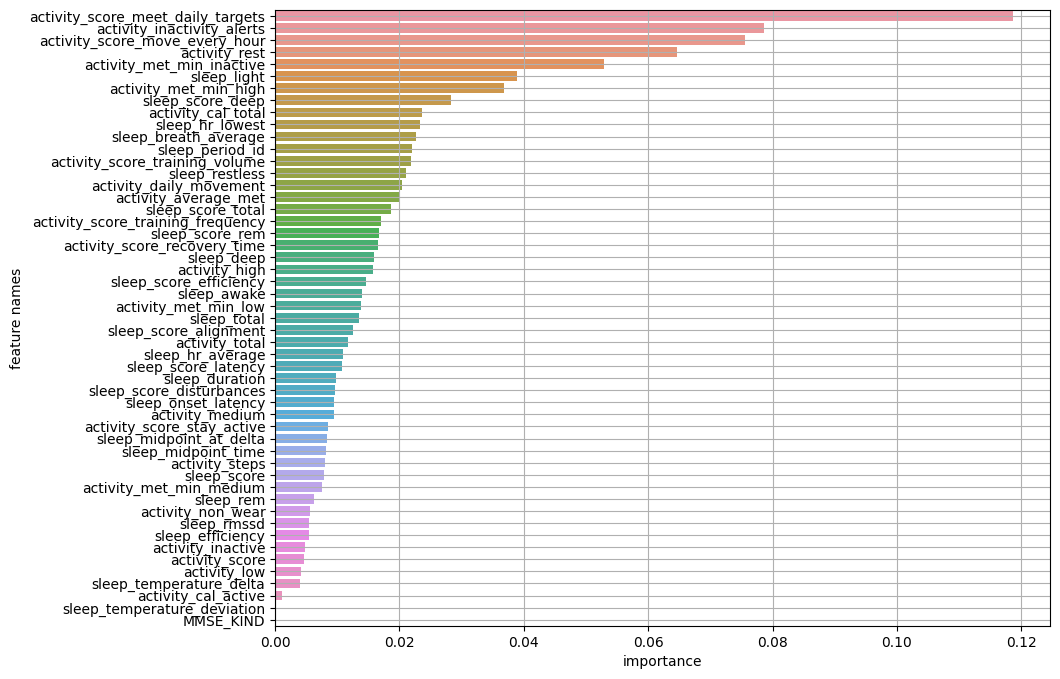

In [135]:
# 제일 성능이 좋은 모델 : model_2o
result1 = plot_feature_importance(model_2o.feature_importances_, list(X_train_so))

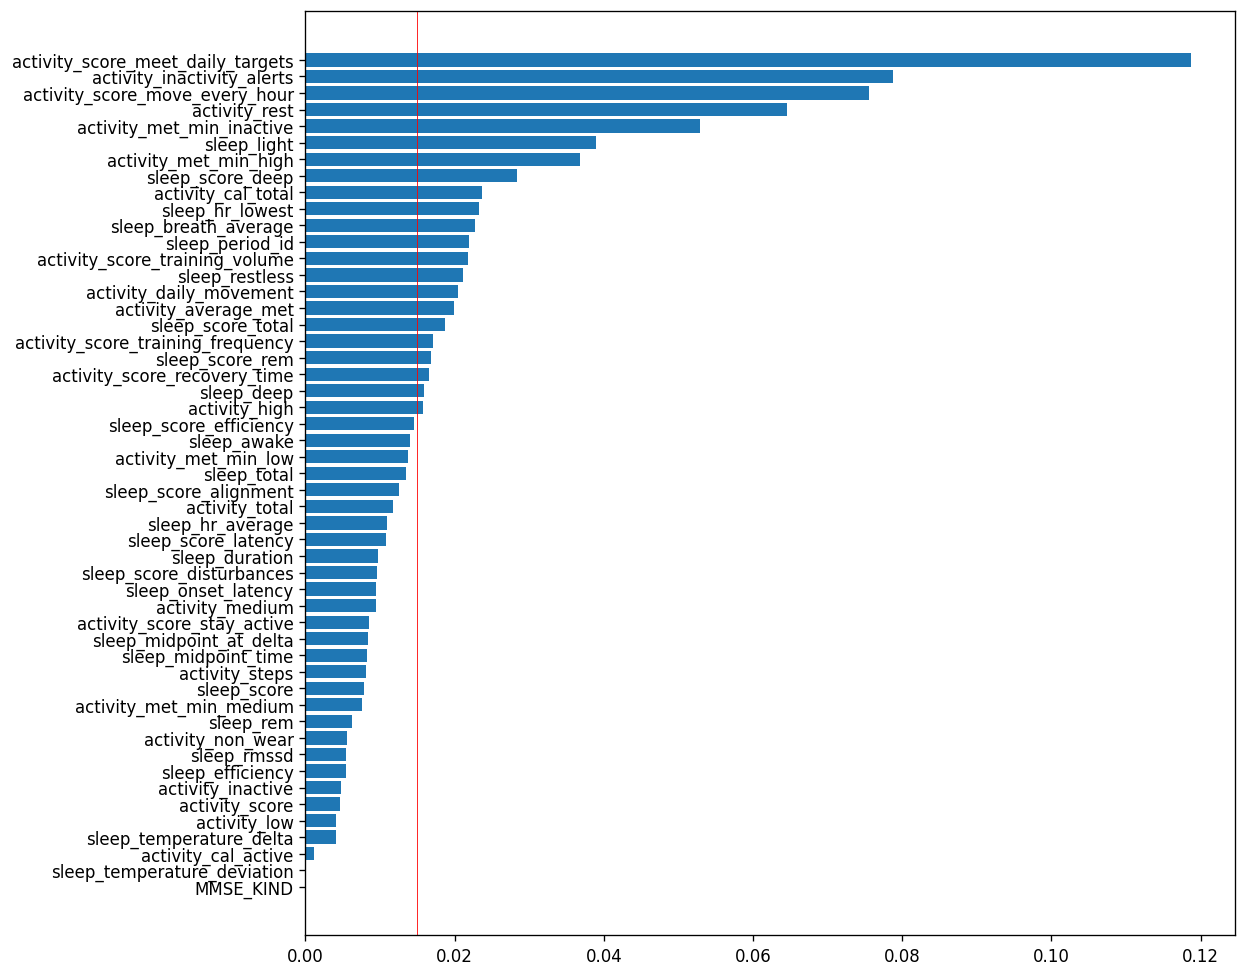

In [136]:
feature_importances = list(
    zip(X_train_so.columns, model_2o.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [137]:
features_selected = list(filter(lambda x: x[1] >= 0.02, feature_importances))
print(features_selected)
selected_feature_names = list(map(lambda x: x[0], features_selected))

[('activity_score_meet_daily_targets', 0.11871642), ('activity_inactivity_alerts', 0.07869673), ('activity_score_move_every_hour', 0.075491525), ('activity_rest', 0.064557105), ('activity_met_min_inactive', 0.05286001), ('sleep_light', 0.038948122), ('activity_met_min_high', 0.036866236), ('sleep_score_deep', 0.028310636), ('activity_cal_total', 0.023653148), ('sleep_hr_lowest', 0.02330358), ('sleep_breath_average', 0.022700693), ('sleep_period_id', 0.02198272), ('activity_score_training_volume', 0.021773936), ('sleep_restless', 0.021114087), ('activity_daily_movement', 0.020407315)]


In [138]:
x_train_s = x_train_2[selected_feature_names]
x_val_s = x_val_2[selected_feature_names]

model_2 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_sso, y_train_sso = SMOTE(random_state=42).fit_resample(
    x_train_s, y_train_2
)

watchlist = [(X_train_sso, y_train_sso), (x_val_s, y_val_2)]

model_2.fit(
    X_train_sso,
    y_train_sso,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)


pred_2 = model_2.predict(x_val_s)
print("검증 정확도", model_2.score(x_val_s, y_val_2))
print(confusion_matrix(y_val_2, pred_2))
print(classification_report(y_val_2, pred_2))

[0]	validation_0-auc:0.92543	validation_1-auc:0.76975
[1]	validation_0-auc:0.95552	validation_1-auc:0.84884
[2]	validation_0-auc:0.95883	validation_1-auc:0.84396
[3]	validation_0-auc:0.96122	validation_1-auc:0.86247
[4]	validation_0-auc:0.96899	validation_1-auc:0.87378
[5]	validation_0-auc:0.97036	validation_1-auc:0.86867
[6]	validation_0-auc:0.97261	validation_1-auc:0.87560
[7]	validation_0-auc:0.97472	validation_1-auc:0.88331
[8]	validation_0-auc:0.97584	validation_1-auc:0.88965
[9]	validation_0-auc:0.97656	validation_1-auc:0.89218
[10]	validation_0-auc:0.97712	validation_1-auc:0.89085
[11]	validation_0-auc:0.97901	validation_1-auc:0.89183
[12]	validation_0-auc:0.98096	validation_1-auc:0.89578
[13]	validation_0-auc:0.98149	validation_1-auc:0.89927
[14]	validation_0-auc:0.98309	validation_1-auc:0.89889
[15]	validation_0-auc:0.98427	validation_1-auc:0.90222
[16]	validation_0-auc:0.98522	validation_1-auc:0.90047
[17]	validation_0-auc:0.98625	validation_1-auc:0.90379
[18]	validation_0-au

#### 채택 모델


In [139]:
model_2t = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,)

params = {
    "xgbclassifier__max_depth": [2, 4, 6, 8],
    "xgbclassifier__min_child_weight": [2, 4, 8, 10],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    model_2t,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)

randomized_search.fit(x_train_2, y_train_2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[00:19:29] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__colsample_bytree", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight" } are not used.

[CV 1/3] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=10;, score=0.971 total time=  18.6s
[00:19:47] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__colsample_bytree", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight" } are not used.

[CV 2/3] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=10;, score=0.972 total time=  17.0s
[00:20:04] WARNING: ../src/learner.cc:767: 
Parameters: { "xgbclassifier__colsample_bytree", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight" } are not used.

[CV 3/3] END xgbclassifier__colsample_bytree=0.8, xgbclassifier__max_depth=6, xgbclassifier__min_child_weight=10;, score=0.978 tota

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=999, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions={'xgbclassifier__colsample_bytree': [0.6,
                                                                            0.8,
                                                                            1.0],
                                        'xgbclassifier__max_depth': [2, 4, 6,
                                                                     8],
                                        'xgbclassifier__min_child_weight': [2,
                                                                            4,
                                                                            8,
                                                                            10]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [140]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__min_child_weight': 10, 'xgbclassifier__max_depth': 6, 'xgbclassifier__colsample_bytree': 0.8}
최적 AUC:  0.9736876205714772


In [141]:
model_2 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=10,
        colsample_bytree=0.8,
        learning_rate=0.1,
        use_label_encoder=False,)

watchlist = [(x_train_2, y_train_2), (x_val_2, y_val_2)]

model_2.fit(
    x_train_2,
    y_train_2,
    eval_set=watchlist,
    early_stopping_rounds=50)


pred_2 = model_2.predict(x_val_2)
print("검증 정확도", model_2.score(x_val_2, y_val_2))
print(confusion_matrix(y_val_2, pred_2))
print(classification_report(y_val_2, pred_2))

[0]	validation_0-error:0.04714	validation_1-error:0.05049
[1]	validation_0-error:0.04611	validation_1-error:0.04791
[2]	validation_0-error:0.04392	validation_1-error:0.04791
[3]	validation_0-error:0.04341	validation_1-error:0.04740
[4]	validation_0-error:0.04122	validation_1-error:0.04740
[5]	validation_0-error:0.04083	validation_1-error:0.04688
[6]	validation_0-error:0.04083	validation_1-error:0.04843
[7]	validation_0-error:0.04122	validation_1-error:0.04894
[8]	validation_0-error:0.03980	validation_1-error:0.04843
[9]	validation_0-error:0.03980	validation_1-error:0.04740
[10]	validation_0-error:0.03954	validation_1-error:0.04688
[11]	validation_0-error:0.03877	validation_1-error:0.04843
[12]	validation_0-error:0.03825	validation_1-error:0.04740
[13]	validation_0-error:0.03825	validation_1-error:0.04791
[14]	validation_0-error:0.03748	validation_1-error:0.04791
[15]	validation_0-error:0.03735	validation_1-error:0.04740
[16]	validation_0-error:0.03697	validation_1-error:0.04637
[17]	va

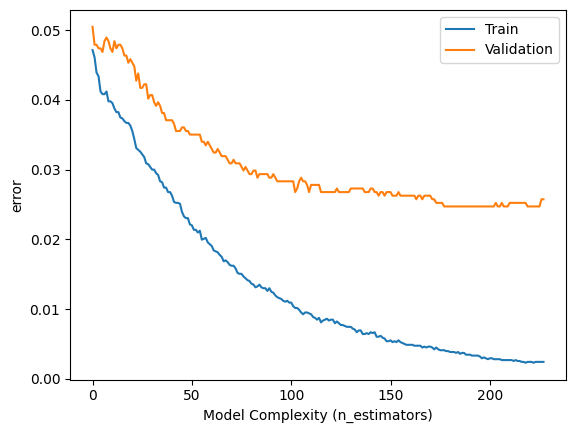

검증 정확도 0.9752704791344667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1824
           1       0.93      0.63      0.75       117

    accuracy                           0.97      1941
   macro avg       0.95      0.81      0.87      1941
weighted avg       0.97      0.97      0.97      1941

ROC-AUC: 0.971922327185485


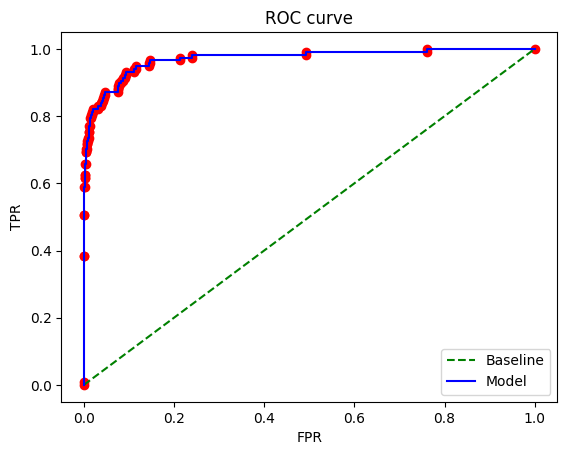

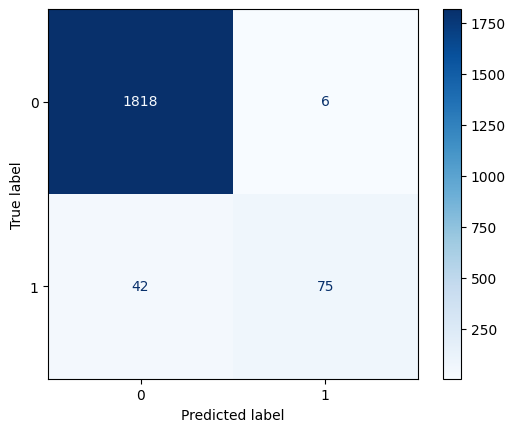

In [142]:
summarize_results(model_2, x_val_2, y_val_2)

### No.3 분류모델
* 타겟 : MCI 와 정상인 분류

In [143]:
df['DIAG_NM'].value_counts()

CN     5781
MCI    3353
Dem     571
Name: DIAG_NM, dtype: int64

In [144]:
idd = list(df[df['DIAG_NM'] == 'Dem'].index)
df_MC = df.drop(index=idd,axis=0)
df_MC

EMAIL        day  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr 2020-10-19               1.28125                  196   
1     nia+279@rowan.kr 2020-10-20               1.25000                  145   
2     nia+279@rowan.kr 2020-10-21               1.21875                  118   
3     nia+279@rowan.kr 2020-10-22               1.28125                  180   
4     nia+279@rowan.kr 2020-10-23               1.46875                  374   
...                ...        ...                   ...                  ...   
9700  nia+206@rowan.kr 2020-12-24               1.34375                  249   
9701  nia+206@rowan.kr 2020-12-26               1.53125                  570   
9702  nia+206@rowan.kr 2020-12-27               1.34375                  295   
9703  nia+206@rowan.kr 2020-12-28               1.31250                  186   
9704  nia+206@rowan.kr 2020-12-29               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  ...  \
0                   714                           0           201  ...   
1                   719                           0           131  ...   
2                   708                           1           125  ...   
3                   705                           0           203  ...   
4                   437                           0           511  ...   
...                 ...                         ...           ...  ...   
9700                780                           4           167  ...   
9701                518                           1           332  ...   
9702                578                           0           173  ...   
9703                778                           1           138  ...   
9704                 69                           0            61  ...   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
0                         65                   89               56   
1                         65                   97               43   
2                         41                   75               68   
3                         81                   83               73   
4                         39                   78               25   
...                      ...                  ...              ...   
9700                      76                   81               95   
9701                      69                   86               89   
9702                      86                   89               98   
9703                      98                   89               86   
9704                      88                   99               76   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
0                    94                     0.00                         0.00   
1                    65                     0.34                         0.34   
2                    62                    -0.07                        -0.07   
3                    62                    -0.14                        -0.14   
4                    29                    -0.50                        -0.50   
...                 ...

In [145]:
df_MC['DIAG_NM'].value_counts()

CN     5781
MCI    3353
Name: DIAG_NM, dtype: int64

In [146]:
y_3 = df_MC['DIAG_NM']
x_3 = df_MC.drop(columns=['EMAIL','day','DIAG_NM','TOTAL'],axis=1)

0    5781
1    3353
Name: DIAG_NM_1, dtype: int64
0    0.63291
1    0.36709
Name: DIAG_NM_1, dtype: float64


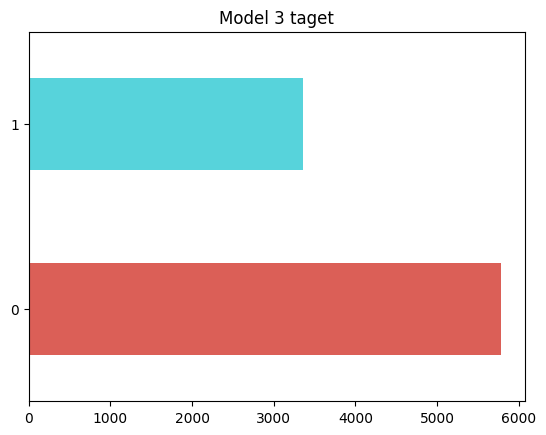

In [188]:
print(y_3.value_counts())
print(y_3.value_counts(normalize = True))

plt.title('Model 3 taget')
colors = sns.color_palette('hls',2)
y_3.value_counts().plot(kind = 'barh',color=colors)
plt.show()

In [148]:
y_3 = oneencoder.fit_transform(y_3)
y_3

DIAG_NM_1  DIAG_NM_2
0             1          0
1             1          0
2             1          0
3             1          0
4             1          0
...         ...        ...
9700          0          1
9701          0          1
9702          0          1
9703          0          1
9704          0          1

[9134 rows x 2 columns]

In [149]:
y_3.value_counts()

DIAG_NM_1  DIAG_NM_2
0          1            5781
1          0            3353
dtype: int64

In [150]:
y_3 = y_3['DIAG_NM_1']

0    5781
1    3353
Name: DIAG_NM_1, dtype: int64
0    0.63291
1    0.36709
Name: DIAG_NM_1, dtype: float64


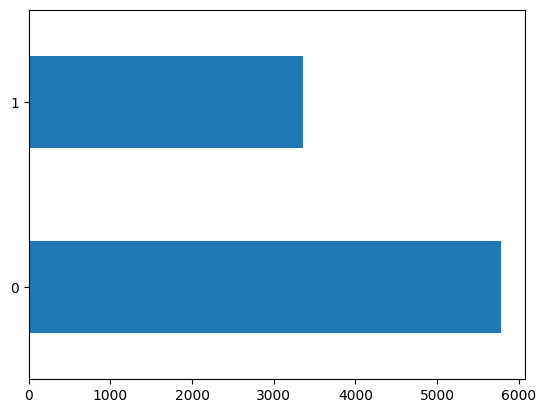

In [151]:
print(y_3.value_counts())
print(y_3.value_counts(normalize = True))

y_3.value_counts().plot(kind = 'barh')
plt.show()

In [152]:
x_train_3, x_val_3, y_train_3, y_val_3 = train_test_split(x_3, y_3, test_size = 0.2, random_state = 42)
print('train : ', x_train_3.shape, y_train_3.shape)
print('val : ', x_val_3.shape, y_val_3.shape)

train :  (7307, 51) (7307,)
val :  (1827, 51) (1827,)


In [153]:
model_3 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_3.fit(x_train_3, y_train_3)
pred_3 = model_3.predict(x_val_3)
print(confusion_matrix(y_val_3, pred_3))
print("검증 AUC: ", model_3.score(x_val_3, y_val_3))
print(classification_report(y_val_3, pred_3))

[[1096  106]
 [ 135  490]]
검증 AUC:  0.8680897646414888
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1202
           1       0.82      0.78      0.80       625

    accuracy                           0.87      1827
   macro avg       0.86      0.85      0.85      1827
weighted avg       0.87      0.87      0.87      1827



In [154]:
'''
model_3t = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,)

params = {
    "xgbclassifier__max_depth": [2, 4, 6, 8],
    "xgbclassifier__min_child_weight": [2, 4, 8, 10],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    model_3t,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)

randomized_search.fit(x_train_3, y_train_3)
'''

'\nmodel_3t = XGBClassifier(\n        objective="binary:logistic",\n        eval_metric="error",\n        n_estimators=999,\n        random_state=42,\n        n_jobs=-1,\n        learning_rate=0.1,\n        use_label_encoder=False,)\n\nparams = {\n    "xgbclassifier__max_depth": [2, 4, 6, 8],\n    "xgbclassifier__min_child_weight": [2, 4, 8, 10],\n    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],\n}\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrandomized_search = RandomizedSearchCV(\n    model_3t,\n    param_distributions=params,\n    scoring="roc_auc",\n    n_iter=10,\n    cv=3,\n    verbose=3,\n    random_state=42,\n)\n\nrandomized_search.fit(x_train_3, y_train_3)\n'

In [155]:
'''
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

>> 최적 하이퍼파라미터:  {'xgbclassifier__min_child_weight': 10, 'xgbclassifier__max_depth': 6, 'xgbclassifier__colsample_bytree': 0.8}
최적 AUC:  0.9797421437289353
'''

'\nprint("최적 하이퍼파라미터: ", randomized_search.best_params_)\nprint("최적 AUC: ", randomized_search.best_score_)\n\n>> 최적 하이퍼파라미터:  {\'xgbclassifier__min_child_weight\': 10, \'xgbclassifier__max_depth\': 6, \'xgbclassifier__colsample_bytree\': 0.8}\n최적 AUC:  0.9797421437289353\n'

In [156]:
model_3 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=10,
        colsample_bytree=0.8,
        learning_rate=0.1,
        use_label_encoder=False,)

watchlist = [(x_train_3, y_train_3), (x_val_3, y_val_3)]

model_3.fit(
    x_train_3,
    y_train_3,
    eval_set=watchlist,
    early_stopping_rounds=50)


pred_3 = model_3.predict(x_val_3)
print("검증 정확도", model_3.score(x_val_3, y_val_3))
print(confusion_matrix(y_val_3, pred_3))
print(classification_report(y_val_3, pred_3))

[0]	validation_0-error:0.30875	validation_1-error:0.34154
[1]	validation_0-error:0.26947	validation_1-error:0.28681
[2]	validation_0-error:0.25619	validation_1-error:0.27915
[3]	validation_0-error:0.25482	validation_1-error:0.27696
[4]	validation_0-error:0.24607	validation_1-error:0.27313
[5]	validation_0-error:0.23731	validation_1-error:0.27203
[6]	validation_0-error:0.23224	validation_1-error:0.25999
[7]	validation_0-error:0.23005	validation_1-error:0.25561
[8]	validation_0-error:0.23019	validation_1-error:0.25944
[9]	validation_0-error:0.22376	validation_1-error:0.25068
[10]	validation_0-error:0.22622	validation_1-error:0.25014
[11]	validation_0-error:0.22061	validation_1-error:0.24631
[12]	validation_0-error:0.22129	validation_1-error:0.24302
[13]	validation_0-error:0.21965	validation_1-error:0.24193
[14]	validation_0-error:0.21692	validation_1-error:0.23974
[15]	validation_0-error:0.21048	validation_1-error:0.24028
[16]	validation_0-error:0.20884	validation_1-error:0.23919
[17]	va

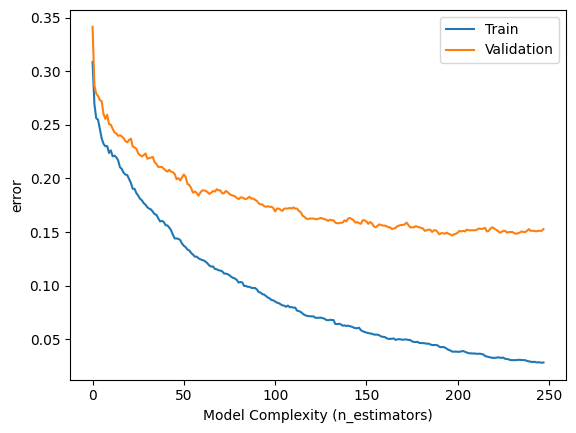

검증 정확도 0.8533114395183361
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1202
           1       0.82      0.73      0.77       625

    accuracy                           0.85      1827
   macro avg       0.84      0.82      0.83      1827
weighted avg       0.85      0.85      0.85      1827

ROC-AUC: 0.9145517470881863


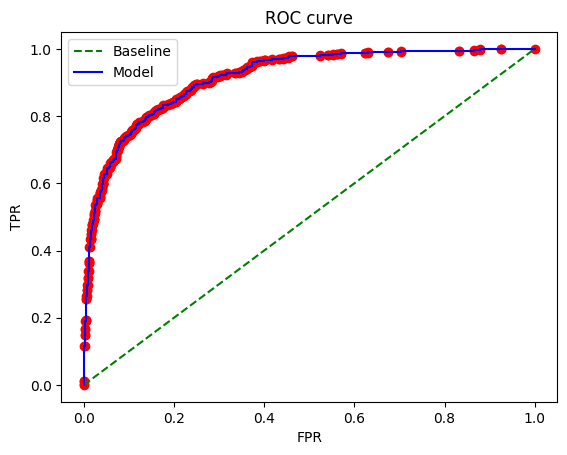

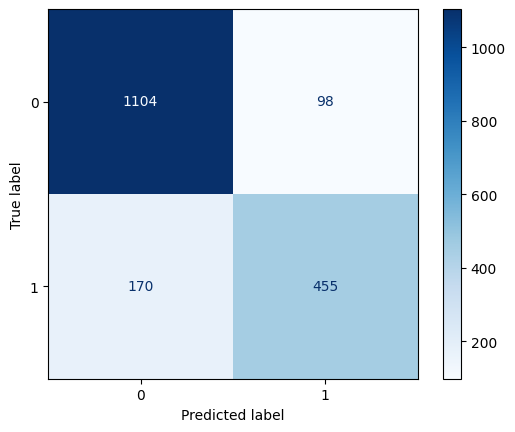

In [157]:
summarize_results(model_3, x_val_3, y_val_3)

### 머신러닝 결과
 1. 치매 고위험군 판별 모델 : model_1
 2. 치매환자 판별 모델 : model_2
 3. 정상인과 치매 고위험군 판별 모델 : model_3

 
가장 성능이 좋은 모델은 model_3 이고 치매 예방을 빠르게 하기 위해서는 치매 고위험군을 빠르게 선별하는 것이 중요함 이에 model_3을 채택함

# TEST DATA 


In [227]:
test_a = pd.read_csv('https://raw.githubusercontent.com/pauljo13/Project-2/main/Project_Data/2.Validation/val_data/1val_Activity/val_activity.csv')
test_s = pd.read_csv('https://raw.githubusercontent.com/pauljo13/Project-2/main/Project_Data/2.Validation/val_data/2val_sleep/val_sleep.csv')
test_m = pd.read_csv('https://raw.githubusercontent.com/pauljo13/Project-2/main/Project_Data/2.Validation/val_data/3val_mmse/val_mmse.csv')
print(test_a.shape, test_s.shape, test_m.shape)

(2478, 31) (2478, 36) (33, 38)


In [228]:
test_a

EMAIL  activity_average_met  activity_cal_active  \
0     nia+404@rowan.kr               1.71875                  730   
1     nia+404@rowan.kr               1.40625                  342   
2     nia+404@rowan.kr               1.46875                  401   
3     nia+404@rowan.kr               0.34375                   27   
4     nia+404@rowan.kr               1.46875                  333   
...                ...                   ...                  ...   
2473  nia+280@rowan.kr               1.59375                  648   
2474  nia+280@rowan.kr               1.43750                  379   
2475  nia+280@rowan.kr               1.56250                  670   
2476  nia+280@rowan.kr               1.46875                  556   
2477  nia+280@rowan.kr               1.34375                  311   

      activity_cal_total activity_class_5min  activity_daily_movement  \
0                   2944                 ...                    14346   
1                   2449                 ...                     6352   
2                   2544                 ...                     7297   
3                   1850                 ...                      491   
4                   2518                 ...                     5861   
...                  ...                 ...                      ...   
2473                2760                 ...                    12256   
2474                2507                 ...                     6973   
2475                2747                 ...                    13008   
2476                2570                 ...                    11043   
2477                2341                 ...                     5943   

               activity_day_end         activity_day_start  activity_high  \
0     2020-11-28T03:59:59+09:00  2020-11-27T04:00:00+09:00              0   
1     2020-11-29T03:59:59+09:00  2020-11-28T04:00:00+09:00              0   
2     2020-11-30T03:59:59+09:00  2020-11-29T04:00:00+09:00              0   
3     2020-12-01T03:59:59+09:00  2020-11-30T04:00:00+09:00              0   
4     2020-12-02T03:59:59+09:00  2020-12-01T04:00:00+09:00              0   
...                         ...                        ...            ...   
2473  2021-02-13T03:59:59+09:00  2021-02-12T04:00:00+09:00              0   
2474  2021-02-14T03:59:59+09:00  2021-02-13T04:00:00+09:00              0   
2475  2021-02-16T03:59:59+09:00  2021-02-15T04:00:00+09:00              0   
2476  2021-02-17T03:59:59+09:00  2021-02-16T04:00:00+09:00              0   
2477  2021-02-18T03:59:59+09:00  2021-02-17T04:00:00+09:00              0   

      activity_inactive  ...  activity_score_meet_daily_targets  \
0                   417  ...                                 95   
1                   473  ...                                 78   
2                   586  ...                                 95   
3                   176  ...                                 95   
4                   646  ...                                 95   
...                 ...  ...                                ...   
2473                444  ...                                100   
2474                623  ...                                100   
2475                422  ...                                100   
2476                452  ...                                100   
2477                595  ...                                100   

      activity_score_move_every_hour  activity_score_recovery_time  \
0                                100                           100   
1                                100                           100   
2                                100                           100   
3                                100                           100   
4                                100                           100   
...                              ...                           ...   
2473                             100                            95   
2474                 

In [229]:
test_s

EMAIL  sleep_awake          sleep_bedtime_end  \
0     nia+404@rowan.kr        13950  2020-11-27T06:54:33+09:00   
1     nia+404@rowan.kr         7680  2020-11-28T06:35:25+09:00   
2     nia+404@rowan.kr        11880  2020-11-29T05:53:39+09:00   
3     nia+404@rowan.kr         9600  2020-11-30T05:53:11+09:00   
4     nia+404@rowan.kr        10710  2020-12-01T05:37:37+09:00   
...                ...          ...                        ...   
2473  nia+280@rowan.kr         1680  2021-02-12T04:04:11+09:00   
2474  nia+280@rowan.kr        12840  2021-02-13T09:20:01+09:00   
2475  nia+280@rowan.kr        11250  2021-02-15T08:18:10+09:00   
2476  nia+280@rowan.kr         7410  2021-02-16T07:43:02+09:00   
2477  nia+280@rowan.kr         3360  2021-02-17T06:02:59+09:00   

            sleep_bedtime_start  sleep_breath_average  sleep_deep  \
0     2020-11-26T21:03:33+09:00                16.500        2100   
1     2020-11-27T23:43:25+09:00                17.375        2430   
2     2020-11-28T20:39:39+09:00                17.000        2820   
3     2020-11-29T21:38:11+09:00                17.250        1770   
4     2020-11-30T20:53:37+09:00                17.250        3150   
...                         ...                   ...         ...   
2473  2021-02-12T00:11:11+09:00                18.500        6030   
2474  2021-02-12T21:46:01+09:00                18.000        4020   
2475  2021-02-14T21:40:10+09:00                18.375        6060   
2476  2021-02-15T19:41:02+09:00                18.000        7110   
2477  2021-02-16T22:21:59+09:00                18.500        4230   

      sleep_duration  sleep_efficiency sleep_hr_5min  sleep_hr_average  ...  \
0              35460                61           ...             70.53  ...   
1              24720                69           ...             68.01  ...   
2              33240                64           ...             64.89  ...   
3              29700                68           ...             63.70  ...   
4              31440                66           ...             67.07  ...   
...              ...               ...           ...               ...  ...   
2473           13980                88           ...             63.33  ...   
2474           41640                69           ...             60.22  ...   
2475           38280                71           ...             65.38  ...   
2476           43320                83           ...             62.43  ...   
2477           27660                88           ...             64.71  ...   

      sleep_score_efficiency sleep_score_latency  sleep_score_rem  \
0                         27                  97               66   
1                         46                  91               35   
2                         34                  89               41   
3                         44                  86               29   
4                         39                  14               54   
...                      ...                 ...              ...   
2473                      90                  89               22   
2474                      46                  97               95   
2475                      51                  81               62   
2476                      79                  75               98   
2477                      90                  86               23   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
0                    62                    -0.12                        -0.12   
1                    44                    -0.32                        -0.32   
2                    62                     0.07                         0.07   
3                    56                    -0.41                        -0.41   
4                    59                    -0.27                        -0.27   
...                 ...                      ...                          ...   
2473                 25                    -0.27  

In [230]:
test_m

SAMPLE_EMAIL  DIAG_SEQ DIAG_NM DOCTOR_NM  MMSE_NUM  MMSE_KIND  Q01  \
0   nia+163@rowan.kr         4      CN         -         4          2    2   
1   nia+280@rowan.kr         1      CN         -         1          2    2   
2   nia+322@rowan.kr         1      CN         -         1          2    2   
3   nia+173@rowan.kr         2      CN         -         2          2    2   
4   nia+320@rowan.kr         3      CN         -         3          2    2   
5   nia+263@rowan.kr         6      CN         -         6          2    2   
6   nia+027@rowan.kr         2      CN         -         2          2    2   
7   nia+424@rowan.kr         2      CN         -         2          2    2   
8   nia+266@rowan.kr         5      CN         -         5          2    2   
9   nia+245@rowan.kr         1     MCI         -         1          2    2   
10  nia+064@rowan.kr         2      CN         -         2          2    2   
11  nia+380@rowan.kr         3      CN         -         3          2    2   
12   nia+85@rowan.kr         2      CN         -         2          2    2   
13  nia+404@rowan.kr         1      CN         -         1          2    2   
14  nia+374@rowan.kr         2      CN         -         2          2    2   
15  nia+323@rowan.kr         3      CN         -         3          2    2   
16  nia+100@rowan.kr         1      CN         -         1          2    2   
17  nia+269@rowan.kr         5      CN         -         5          2    2   
18  nia+112@rowan.kr         5     Dem         -         5          2    1   
19  nia+327@rowan.kr         1      CN         -         1          2    2   
20  nia+128@rowan.kr         4     MCI         -         4          2    2   
21  nia+377@rowan.kr         4      CN         -         4          2    2   
22  nia+045@rowan.kr         2     Dem         -         0          0    0   
23  nia+192@rowan.kr         3      CN         -         2          2    2   
24  nia+084@rowan.kr         6      CN         -         6          2    2   
25  nia+406@rowan.kr         2      CN         -         2          2    2   
26  nia+210@rowan.kr         4      CN         -         4          2    2   
27  nia+223@rowan.kr         4      CN         -         5          2    2   
28  nia+311@rowan.kr         4      CN         -         4          2    2   
29  nia+022@rowan.kr         1     MCI         -         1          2    2   
30  nia+013@rowan.kr         1     MCI         -         1          2    2   
31  nia+450@rowan.kr         2      CN         -         2          2    2   
32  nia+287@rowan.kr         2     Dem         -         2          2    1   

    Q02  Q03  Q04  ...  Q14_1  Q14_2  Q15  Q16_1  Q16_2  Q16_3  Q17  Q18  Q19  \
0     2    2    2  ...      2      2    2      1      2      2    2    2    2   
1     2    2    2  ...      2      2    2      2      2      2    2    2    2   
2     2    2    2  ...      2      2    2      1      2      2    2    2    2   
3     2    2    2  ...      2      2    2      2      2      2    2    2    2   
4     2    2    2  ...      2      2    2      1      2      2    2    2    2   
5     2    2    2  ...      2      2    2      2      2      2    2    2    2   
6     2    2    2  ...      2      2    2      1      2      2    2    2    2   
7     2    2    2  ...      2      2    2      1      2      2    2    2    2   
8     2    2    2  ...      2      2    2      1      2      2    2    2    2   
9     2    2    2  ...      2      2    2      2      2      2    2    2    2   
10    2    2    2  ...      2      2    2      2      2      2    2    2    2   
11    2    2    2  ...      2      2    2      1      2      2    2    2    2   
12    2    2    2  ...      2      2    2      2      2      2    2    2    2   
13    2    2    2  ...      2      2    2      2      2      2    2    2    2   
14    2    2    2  ...      2      2    2      2      2      2    2    2    2   
15    2    2    2  ...      2      2    2      1      2    

In [231]:
col_m = ['Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q06', 'Q07', 'Q08',
       'Q09', 'Q10', 'Q11_1', 'Q11_2', 'Q11_3', 'Q12_1', 'Q12_2', 'Q12_3',
       'Q12_4', 'Q12_5', 'Q12_TOTAL', 'Q13_1', 'Q13_2', 'Q13_3', 'Q14_1',
       'Q14_2', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3', 'Q17', 'Q18', 'Q19','DOCTOR_NM','DIAG_SEQ','MMSE_NUM']
test_m = test_m.drop(columns=col_m, axis=1)
test_m.shape

(33, 4)

In [232]:
test_a['day'] = pd.to_datetime(test_a['activity_day_start'].str[0:10])
test_s['day'] = pd.to_datetime(test_s['sleep_bedtime_end'].str[0:10])

In [233]:
CON_in = ['CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)']
CONVERT_a = df_a.drop(columns= CON_in, axis=1)

col_a =['activity_class_5min','activity_met_1min','CONVERT(activity_class_5min USING utf8)',
       'CONVERT(activity_met_1min USING utf8)']

CON_in =['CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)']
CONVERT_s = df_s.drop(columns= CON_in, axis=1)

col_s = ['sleep_hr_5min','sleep_hypnogram_5min','sleep_is_longest','sleep_rmssd_5min','CONVERT(sleep_hr_5min USING utf8)',
       'CONVERT(sleep_hypnogram_5min USING utf8)',
       'CONVERT(sleep_rmssd_5min USING utf8)']

test_a = test_a.drop(columns=col_a,axis=1)
test_s = test_s.drop(columns=col_s,axis=1)

In [234]:
test_a

EMAIL  activity_average_met  activity_cal_active  \
0     nia+404@rowan.kr               1.71875                  730   
1     nia+404@rowan.kr               1.40625                  342   
2     nia+404@rowan.kr               1.46875                  401   
3     nia+404@rowan.kr               0.34375                   27   
4     nia+404@rowan.kr               1.46875                  333   
...                ...                   ...                  ...   
2473  nia+280@rowan.kr               1.59375                  648   
2474  nia+280@rowan.kr               1.43750                  379   
2475  nia+280@rowan.kr               1.56250                  670   
2476  nia+280@rowan.kr               1.46875                  556   
2477  nia+280@rowan.kr               1.34375                  311   

      activity_cal_total  activity_daily_movement           activity_day_end  \
0                   2944                    14346  2020-11-28T03:59:59+09:00   
1                   2449                     6352  2020-11-29T03:59:59+09:00   
2                   2544                     7297  2020-11-30T03:59:59+09:00   
3                   1850                      491  2020-12-01T03:59:59+09:00   
4                   2518                     5861  2020-12-02T03:59:59+09:00   
...                  ...                      ...                        ...   
2473                2760                    12256  2021-02-13T03:59:59+09:00   
2474                2507                     6973  2021-02-14T03:59:59+09:00   
2475                2747                    13008  2021-02-16T03:59:59+09:00   
2476                2570                    11043  2021-02-17T03:59:59+09:00   
2477                2341                     5943  2021-02-18T03:59:59+09:00   

             activity_day_start  activity_high  activity_inactive  \
0     2020-11-27T04:00:00+09:00              0                417   
1     2020-11-28T04:00:00+09:00              0                473   
2     2020-11-29T04:00:00+09:00              0                586   
3     2020-11-30T04:00:00+09:00              0                176   
4     2020-12-01T04:00:00+09:00              0                646   
...                         ...            ...                ...   
2473  2021-02-12T04:00:00+09:00              0                444   
2474  2021-02-13T04:00:00+09:00              0                623   
2475  2021-02-15T04:00:00+09:00              0                422   
2476  2021-02-16T04:00:00+09:00              0                452   
2477  2021-02-17T04:00:00+09:00              0                595   

      activity_inactivity_alerts  ...  activity_score  \
0                              0  ...              96   
1                              0  ...              91   
2                              0  ...              93   
3                              0  ...              93   
4                              0  ...              88   
...                          ...  ...             ...   
2473                           0  ...              97   
2474                           0  ...              91   
2475                           0  ...              99   
2476                           2  ...              95   
2477                           0  ...              91   

      activity_score_meet_daily_targets  activity_score_move_every_hour  \
0                                    95                             100   
1                                    78                             100   
2                                    95                             100   
3                                    95                             100   
4                                    95                             100   
...                                 ...                             ...   
2473                                100                             100   
2474                                100                             100   
2475                                10

In [235]:
test_s

EMAIL  sleep_awake          sleep_bedtime_end  \
0     nia+404@rowan.kr        13950  2020-11-27T06:54:33+09:00   
1     nia+404@rowan.kr         7680  2020-11-28T06:35:25+09:00   
2     nia+404@rowan.kr        11880  2020-11-29T05:53:39+09:00   
3     nia+404@rowan.kr         9600  2020-11-30T05:53:11+09:00   
4     nia+404@rowan.kr        10710  2020-12-01T05:37:37+09:00   
...                ...          ...                        ...   
2473  nia+280@rowan.kr         1680  2021-02-12T04:04:11+09:00   
2474  nia+280@rowan.kr        12840  2021-02-13T09:20:01+09:00   
2475  nia+280@rowan.kr        11250  2021-02-15T08:18:10+09:00   
2476  nia+280@rowan.kr         7410  2021-02-16T07:43:02+09:00   
2477  nia+280@rowan.kr         3360  2021-02-17T06:02:59+09:00   

            sleep_bedtime_start  sleep_breath_average  sleep_deep  \
0     2020-11-26T21:03:33+09:00                16.500        2100   
1     2020-11-27T23:43:25+09:00                17.375        2430   
2     2020-11-28T20:39:39+09:00                17.000        2820   
3     2020-11-29T21:38:11+09:00                17.250        1770   
4     2020-11-30T20:53:37+09:00                17.250        3150   
...                         ...                   ...         ...   
2473  2021-02-12T00:11:11+09:00                18.500        6030   
2474  2021-02-12T21:46:01+09:00                18.000        4020   
2475  2021-02-14T21:40:10+09:00                18.375        6060   
2476  2021-02-15T19:41:02+09:00                18.000        7110   
2477  2021-02-16T22:21:59+09:00                18.500        4230   

      sleep_duration  sleep_efficiency  sleep_hr_average  sleep_hr_lowest  \
0              35460                61             70.53               62   
1              24720                69             68.01               63   
2              33240                64             64.89               59   
3              29700                68             63.70               57   
4              31440                66             67.07               60   
...              ...               ...               ...              ...   
2473           13980                88             63.33               60   
2474           41640                69             60.22               53   
2475           38280                71             65.38               59   
2476           43320                83             62.43               55   
2477           27660                88             64.71               59   

      ...  sleep_score_deep  sleep_score_disturbances  sleep_score_efficiency  \
0     ...                41                        50                      27   
1     ...                49                        43                      46   
2     ...                56                        47                      34   
3     ...                35                        40                      44   
4     ...                64                        55                      39   
...   ...               ...                       ...                     ...   
2473  ...                97                        90                      90   
2474  ...                81                        75                      46   
2475  ...                97                        56                      51   
2476  ...                98                        71                      79   
2477  ...                86                        58                      90   

      sleep_score_latency  sleep_score_rem  sleep_score_total  \
0                      97               66                 62   
1                      91               35                 44   
2                      89               41                 62   
3                      86               29                 56   
4                      14               54                 59   
...                   ...              ...                ...   
2473                   89               22

In [236]:
test = pd.merge(test_a,test_s, on=('EMAIL','day'))
test

EMAIL  activity_average_met  activity_cal_active  \
0     nia+404@rowan.kr               1.71875                  730   
1     nia+404@rowan.kr               1.40625                  342   
2     nia+404@rowan.kr               1.46875                  401   
3     nia+404@rowan.kr               0.34375                   27   
4     nia+404@rowan.kr               1.46875                  333   
...                ...                   ...                  ...   
2473  nia+280@rowan.kr               1.59375                  648   
2474  nia+280@rowan.kr               1.43750                  379   
2475  nia+280@rowan.kr               1.56250                  670   
2476  nia+280@rowan.kr               1.46875                  556   
2477  nia+280@rowan.kr               1.34375                  311   

      activity_cal_total  activity_daily_movement           activity_day_end  \
0                   2944                    14346  2020-11-28T03:59:59+09:00   
1                   2449                     6352  2020-11-29T03:59:59+09:00   
2                   2544                     7297  2020-11-30T03:59:59+09:00   
3                   1850                      491  2020-12-01T03:59:59+09:00   
4                   2518                     5861  2020-12-02T03:59:59+09:00   
...                  ...                      ...                        ...   
2473                2760                    12256  2021-02-13T03:59:59+09:00   
2474                2507                     6973  2021-02-14T03:59:59+09:00   
2475                2747                    13008  2021-02-16T03:59:59+09:00   
2476                2570                    11043  2021-02-17T03:59:59+09:00   
2477                2341                     5943  2021-02-18T03:59:59+09:00   

             activity_day_start  activity_high  activity_inactive  \
0     2020-11-27T04:00:00+09:00              0                417   
1     2020-11-28T04:00:00+09:00              0                473   
2     2020-11-29T04:00:00+09:00              0                586   
3     2020-11-30T04:00:00+09:00              0                176   
4     2020-12-01T04:00:00+09:00              0                646   
...                         ...            ...                ...   
2473  2021-02-12T04:00:00+09:00              0                444   
2474  2021-02-13T04:00:00+09:00              0                623   
2475  2021-02-15T04:00:00+09:00              0                422   
2476  2021-02-16T04:00:00+09:00              0                452   
2477  2021-02-17T04:00:00+09:00              0                595   

      activity_inactivity_alerts  ...  sleep_score_alignment  \
0                              0  ...                    100   
1                              0  ...                    100   
2                              0  ...                    100   
3                              0  ...                    100   
4                              0  ...                    100   
...                          ...  ...                    ...   
2473                           0  ...                    100   
2474                           0  ...                    100   
2475                           0  ...                    100   
2476                           2  ...                    100   
2477                           0  ...                    100   

      sleep_score_deep  sleep_score_disturbances  sleep_score_efficiency  \
0                   41                        50                      27   
1                   49                        43                      46   
2                   56                        47                      34   
3                   35                        40                      44   
4                   64                        55                      39   
...                ...                       ...                     ...   
2473                97                        90                      90   
2474                8

In [237]:
day = ['activity_day_end','activity_day_start','sleep_bedtime_end','sleep_bedtime_start']
test = test.drop(columns=day,axis=1)
test

EMAIL  activity_average_met  activity_cal_active  \
0     nia+404@rowan.kr               1.71875                  730   
1     nia+404@rowan.kr               1.40625                  342   
2     nia+404@rowan.kr               1.46875                  401   
3     nia+404@rowan.kr               0.34375                   27   
4     nia+404@rowan.kr               1.46875                  333   
...                ...                   ...                  ...   
2473  nia+280@rowan.kr               1.59375                  648   
2474  nia+280@rowan.kr               1.43750                  379   
2475  nia+280@rowan.kr               1.56250                  670   
2476  nia+280@rowan.kr               1.46875                  556   
2477  nia+280@rowan.kr               1.34375                  311   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2944                    14346              0   
1                   2449                     6352              0   
2                   2544                     7297              0   
3                   1850                      491              0   
4                   2518                     5861              0   
...                  ...                      ...            ...   
2473                2760                    12256              0   
2474                2507                     6973              0   
2475                2747                    13008              0   
2476                2570                    11043              0   
2477                2341                     5943              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   417                           0           545   
1                   473                           0           392   
2                   586                           0           362   
3                   176                           0            34   
4                   646                           0           377   
...                 ...                         ...           ...   
2473                444                           0           381   
2474                623                           0           361   
2475                422                           0           366   
2476                452                           2           244   
2477                595                           0           277   

      activity_medium  ...  sleep_score_alignment  sleep_score_deep  \
0                  47  ...                    100                41   
1                   8  ...                    100                49   
2                  24  ...                    100                56   
3                   1  ...                    100                35   
4                   6  ...                    100                64   
...               ...  ...                    ...               ...   
2473               66  ...                    100                97   
2474               13  ...                    100                81   
2475               76  ...                    100                97   
2476               68  ...                    100                98   
2477               17  ...                    100                86   

      sleep_score_disturbances  sleep_score_efficiency  sleep_score_latency  \
0                           50                      27                   97   
1                           43                      46                   91   
2                           47                      34                   89   
3                           40                      44                   86   
4                           55                      39                   14   
...                        ...                     ...                  ...   
2473                        90                      90                   89   
2474                        75                      46   

In [238]:
test_m = test_m.rename(columns={'SAMPLE_EMAIL':'EMAIL'})
test_m.columns

Index(['EMAIL', 'DIAG_NM', 'MMSE_KIND', 'TOTAL'], dtype='object')

In [239]:
test = pd.merge(test, test_m, on='EMAIL')
test

EMAIL  activity_average_met  activity_cal_active  \
0     nia+404@rowan.kr               1.71875                  730   
1     nia+404@rowan.kr               1.40625                  342   
2     nia+404@rowan.kr               1.46875                  401   
3     nia+404@rowan.kr               0.34375                   27   
4     nia+404@rowan.kr               1.46875                  333   
...                ...                   ...                  ...   
2473  nia+280@rowan.kr               1.59375                  648   
2474  nia+280@rowan.kr               1.43750                  379   
2475  nia+280@rowan.kr               1.56250                  670   
2476  nia+280@rowan.kr               1.46875                  556   
2477  nia+280@rowan.kr               1.34375                  311   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2944                    14346              0   
1                   2449                     6352              0   
2                   2544                     7297              0   
3                   1850                      491              0   
4                   2518                     5861              0   
...                  ...                      ...            ...   
2473                2760                    12256              0   
2474                2507                     6973              0   
2475                2747                    13008              0   
2476                2570                    11043              0   
2477                2341                     5943              0   

      activity_inactive  activity_inactivity_alerts  activity_low  \
0                   417                           0           545   
1                   473                           0           392   
2                   586                           0           362   
3                   176                           0            34   
4                   646                           0           377   
...                 ...                         ...           ...   
2473                444                           0           381   
2474                623                           0           361   
2475                422                           0           366   
2476                452                           2           244   
2477                595                           0           277   

      activity_medium  ...  sleep_score_efficiency  sleep_score_latency  \
0                  47  ...                      27                   97   
1                   8  ...                      46                   91   
2                  24  ...                      34                   89   
3                   1  ...                      44                   86   
4                   6  ...                      39                   14   
...               ...  ...                     ...                  ...   
2473               66  ...                      90                   89   
2474               13  ...                      46                   97   
2475               76  ...                      51                   81   
2476               68  ...                      79                   75   
2477               17  ...                      90                   86   

      sleep_score_rem  sleep_score_total  sleep_temperature_delta  \
0                  66                 62                    -0.12   
1                  35                 44                    -0.32   
2                  41                 62                     0.07   
3                  29                 56                    -0.41   
4                  54                 59                    -0.27   
...               ...                ...                      ...   
2473               22                 25                    -0.27   
2474               95                 92                    -0.13   
2475               6

In [243]:
test = test.drop(columns=['EMAIL','TOTAL'],axis=1)

KeyError: ignored

In [272]:
x_test12 = test.drop(columns=['DIAG_NM','TOTAL','day'],axis=1)
y_test = test['DIAG_NM']

idd = list(test[test['DIAG_NM'] == 'Dem'].index)
test_mc = test.drop(index=idd,axis=0)
x_test3 = test_mc.drop(columns=['DIAG_NM','TOTAL','day'],axis=1)
y_test3 = test_mc['DIAG_NM']

In [273]:
x_test12.shape

(2478, 51)

In [274]:
y_test.value_counts()

CN     1956
MCI     308
Dem     214
Name: DIAG_NM, dtype: int64

In [275]:
y_test3.value_counts()

CN     1956
MCI     308
Name: DIAG_NM, dtype: int64

In [276]:
y_test = oneencoder.fit_transform(y_test)
y_test3 = oneencoder.transform(y_test3)

In [277]:
y_test.value_counts()

DIAG_NM_1  DIAG_NM_2  DIAG_NM_3
1          0          0            1956
0          1          0             308
           0          1             214
dtype: int64

In [278]:
y_test3.value_counts()

DIAG_NM_1  DIAG_NM_2  DIAG_NM_3
1          0          0            1956
0          1          0             308
dtype: int64

In [279]:
y_test_1 = y_test['DIAG_NM_1']
y_test_2 = y_test['DIAG_NM_3']
y_test_3 = y_test3['DIAG_NM_2']

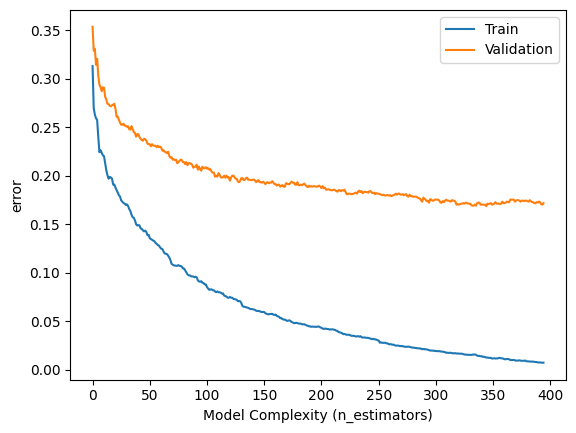

검증 정확도 0.6049233252623083
              precision    recall  f1-score   support

           0       0.18      0.24      0.21       522
           1       0.78      0.70      0.74      1956

    accuracy                           0.60      2478
   macro avg       0.48      0.47      0.47      2478
weighted avg       0.65      0.60      0.62      2478

ROC-AUC: 0.4405846241841588


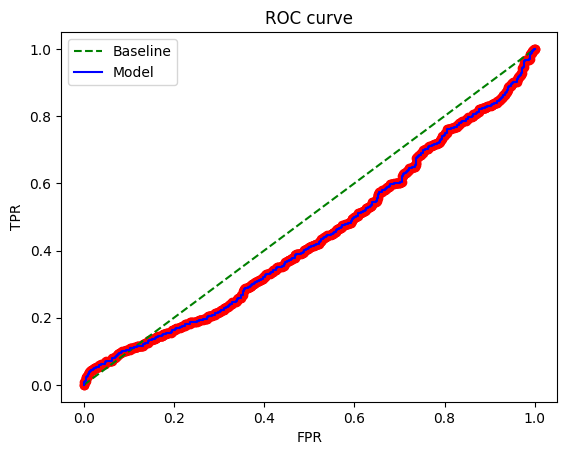

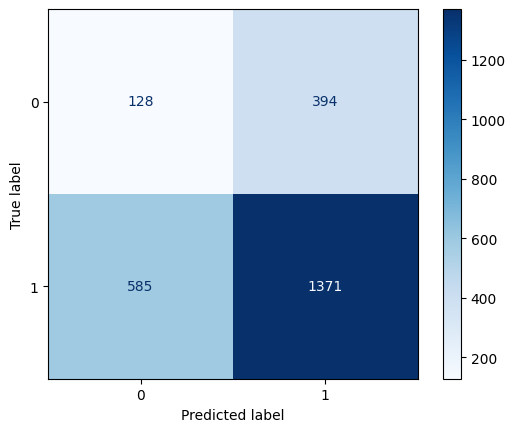

In [280]:
summarize_results(model_1, x_test12, y_test_1)

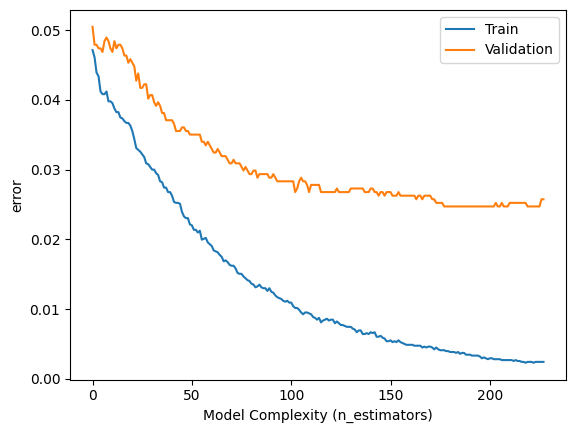

검증 정확도 0.9241323648103309
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2264
           1       0.93      0.13      0.23       214

    accuracy                           0.92      2478
   macro avg       0.93      0.56      0.59      2478
weighted avg       0.92      0.92      0.90      2478

ROC-AUC: 0.8573982034939401


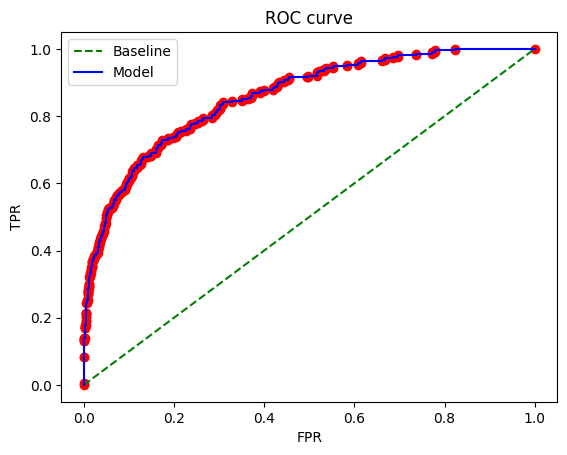

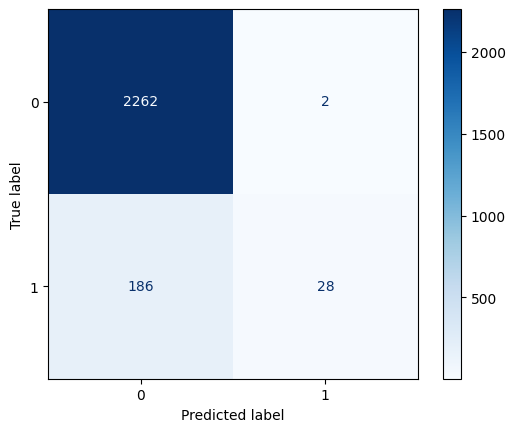

In [281]:
summarize_results(model_2, x_test12, y_test_2)

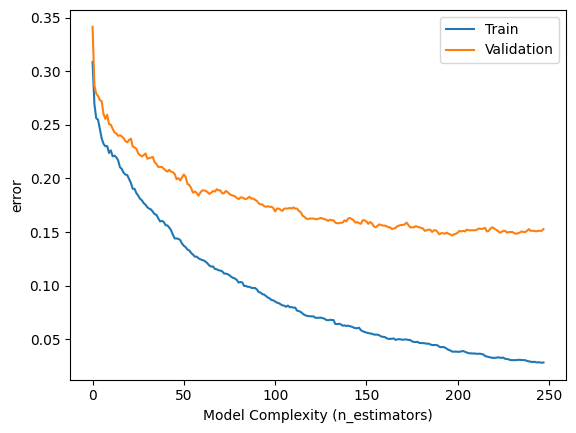

검증 정확도 0.6152826855123675
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1956
           1       0.05      0.10      0.07       308

    accuracy                           0.61      2264
   macro avg       0.44      0.40      0.41      2264
weighted avg       0.72      0.61      0.66      2264

ROC-AUC: 0.3774931612354925


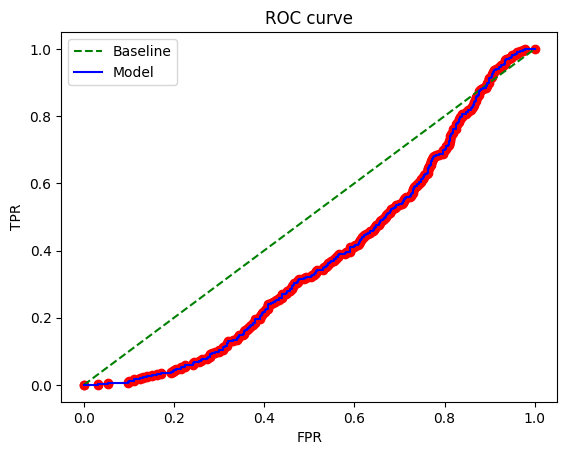

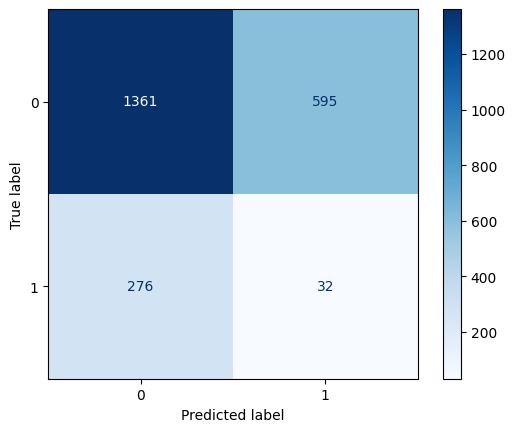

In [282]:
summarize_results(model_3, x_test3, y_test_3)

# 회귀모델

In [283]:
df

EMAIL        day  activity_average_met  activity_cal_active  \
0     nia+279@rowan.kr 2020-10-19               1.28125                  196   
1     nia+279@rowan.kr 2020-10-20               1.25000                  145   
2     nia+279@rowan.kr 2020-10-21               1.21875                  118   
3     nia+279@rowan.kr 2020-10-22               1.28125                  180   
4     nia+279@rowan.kr 2020-10-23               1.46875                  374   
...                ...        ...                   ...                  ...   
9700  nia+206@rowan.kr 2020-12-24               1.34375                  249   
9701  nia+206@rowan.kr 2020-12-26               1.53125                  570   
9702  nia+206@rowan.kr 2020-12-27               1.34375                  295   
9703  nia+206@rowan.kr 2020-12-28               1.31250                  186   
9704  nia+206@rowan.kr 2020-12-29               1.37500                   83   

      activity_cal_total  activity_daily_movement  activity_high  \
0                   2251                     3353              0   
1                   2159                     2516              0   
2                   2140                     1716              0   
3                   2240                     2791              0   
4                   2559                     5393              0   
...                  ...                      ...            ...   
9700                2351                     4411              1   
9701                2682                    11057              1   
9702                2331                     5135              4   
9703                2280                     3178              0   
9704                1891                     1554              0   

      activity_inactive  activity_inactivity_alerts  activity_low  ...  \
0                   714                           0           201  ...   
1                   719                           0           131  ...   
2                   708                           1           125  ...   
3                   705                           0           203  ...   
4                   437                           0           511  ...   
...                 ...                         ...           ...  ...   
9700                780                           4           167  ...   
9701                518                           1           332  ...   
9702                578                           0           173  ...   
9703                778                           1           138  ...   
9704                 69                           0            61  ...   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
0                         65                   89               56   
1                         65                   97               43   
2                         41                   75               68   
3                         81                   83               73   
4                         39                   78               25   
...                      ...                  ...              ...   
9700                      76                   81               95   
9701                      69                   86               89   
9702                      86                   89               98   
9703                      98                   89               86   
9704                      88                   99               76   

      sleep_score_total  sleep_temperature_delta  sleep_temperature_deviation  \
0                    94                     0.00                         0.00   
1                    65                     0.34                         0.34   
2                    62                    -0.07                        -0.07   
3                    62                    -0.14                        -0.14   
4                    29                    -0.50                        -0.50   
...                 ...

In [303]:
x_reg = df.drop(columns=['DIAG_NM','EMAIL','day','TOTAL'],axis=1)
y_reg = df['TOTAL'] 

In [304]:
x_train_R, x_val_R, y_train_R, y_val_R = train_test_split(x_reg, y_reg, test_size = 0.2, random_state = 42)
print('train : ', x_train_R.shape, y_train_R.shape)
print('val : ', x_val_R.shape, y_val_R.shape)

train :  (7764, 51) (7764,)
val :  (1941, 51) (1941,)


In [315]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100, 
    max_depth=7
)
rf.fit(x_train_R,y_train_R)

RandomForestRegressor(max_depth=7)

In [306]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def eval_models(y_pred, y_real) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    
    print("MSE :",mse)
    print("RMSE :",rmse)
    print("MAE :",mae)
    print("R2 :",r2)
    
    return mse, rmse, mae, r2

In [316]:
y_train_pred = rf.predict(x_train_R)
eval_models(y_train_pred, y_train_R)

MSE : 5.597400979493498
RMSE : 2.3658827061994216
MAE : 1.7074537210592131
R2 : 0.5055919363948048


(5.597400979493498, 2.3658827061994216, 1.7074537210592131, 0.5055919363948048)

In [317]:
y_val_pred = rf.predict(x_val_R)
rf_mse, rf_rmse, rf_mae, rf_r2 = eval_models(y_val_pred, y_val_R)

MSE : 8.468764129396446
RMSE : 2.91011410934287
MAE : 2.033606119093487
R2 : 0.29787126366718564


In [318]:
from xgboost import XGBRegressor
xgb = XGBRegressor( 
    n_estimators=100,
    learning_rate=0.08, 
    gamma=0, 
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7)
xgb.fit(x_train_R,y_train_R)
y_train_pred = xgb.predict(x_train_R)
eval_models(y_train_pred, y_train_R)

MSE : 1.7734549994220992
RMSE : 1.3317113048337839
MAE : 0.9603521005202053
R2 : 0.8433540038729592


(1.7734549994220992,
 1.3317113048337839,
 0.9603521005202053,
 0.8433540038729592)

In [319]:
y_val_pred = xgb.predict(x_val_R)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = eval_models(y_val_pred, y_val_R)

MSE : 6.551546301244866
RMSE : 2.559598855532809
MAE : 1.698413925524657
R2 : 0.4568240589495768


In [302]:
x_train_R

activity_average_met  activity_cal_active  activity_cal_total  \
3528               1.56250                  500                2398   
4104               1.25000                  210                2204   
3058               1.28125                  229                2240   
4326               1.28125                  183                2204   
4704               1.50000                  357                2353   
...                    ...                  ...                 ...   
5734               1.53125                  500                2646   
5191               1.62500                  639                2829   
5390               1.50000                  596                2643   
860                1.62500                  763                2819   
7270               1.28125                  227                2248   

      activity_daily_movement  activity_high  activity_inactive  \
3528                    10978              3                576   
4104                     3703              1                463   
3058                     3868              8                858   
4326                     2997              4                690   
4704                     6311              5                480   
...                       ...            ...                ...   
5734                     9448              0                486   
5191                    11191              0                449   
5390                    11336              0                358   
860                     14630              7                403   
7270                     3622              2                563   

      activity_inactivity_alerts  activity_low  activity_medium  \
3528                           0           297              139   
4104                           0           208                7   
3058                           6           132               14   
4326                           2           128               12   
4704                           0           434               36   
...                          ...           ...              ...   
5734                           0           452               22   
5191                           0           465               68   
5390                           0           285               84   
860                            1           235              113   
7270                           1           186               21   

      activity_met_min_high  ...  sleep_score_disturbances  \
3528                     13  ...                        96   
4104                      7  ...                        56   
3058                     74  ...                        77   
4326                     35  ...                        66   
4704                     22  ...                        81   
...                     ...  ...                       ...   
5734                      0  ...                        62   
5191                      0  ...                        79   
5390                      0  ...                        72   
860                      47  ...                        71   
7270                     18  ...                        73   

      sleep_score_efficiency  sleep_score_latency  sleep_score_rem  \
3528                      79                   94               96   
4104                      93                   78               23   
3058                      95                   67               82   
4326                      65                   81               51   
4704                      96                   70                8   
...                      ...                  ...              ...   
5734                      44                   89               60   
5191                      76                   81               28   
5390                      72                   78               36   
860                       96                   72               89   
7270                      95

In [301]:
x_testreg = test.drop(columns=['DIAG_NM','TOTAL'],axis=1)
y_testreg = test['TOTAL']

# 특성 중요도

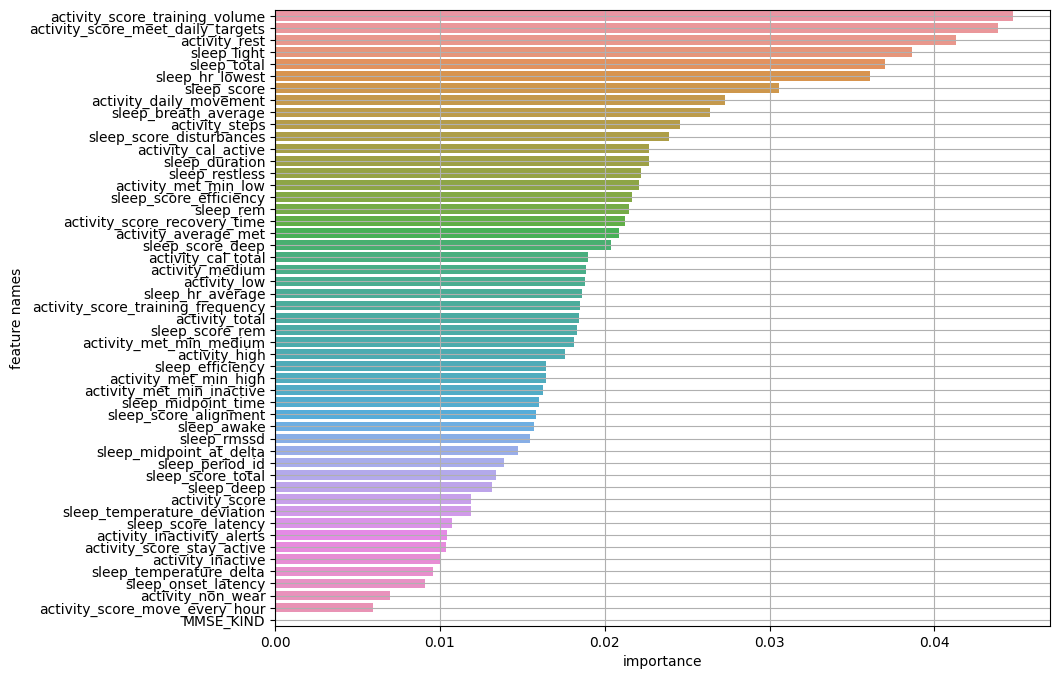

In [320]:
#watchlist = [(x_train_2, y_train_2), (x_val_2, y_val_2)]
result1 = plot_feature_importance(model_2.feature_importances_, list(x_train_2))

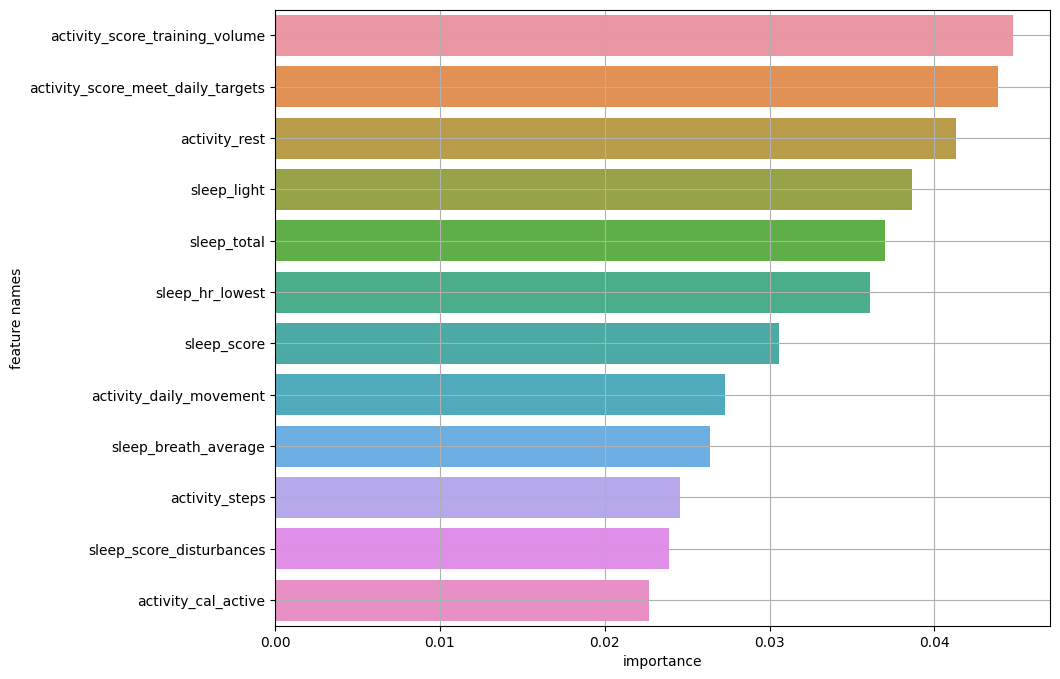

In [339]:
result1 = plot_feature_importance(model_2.feature_importances_, list(x_val_2),12)

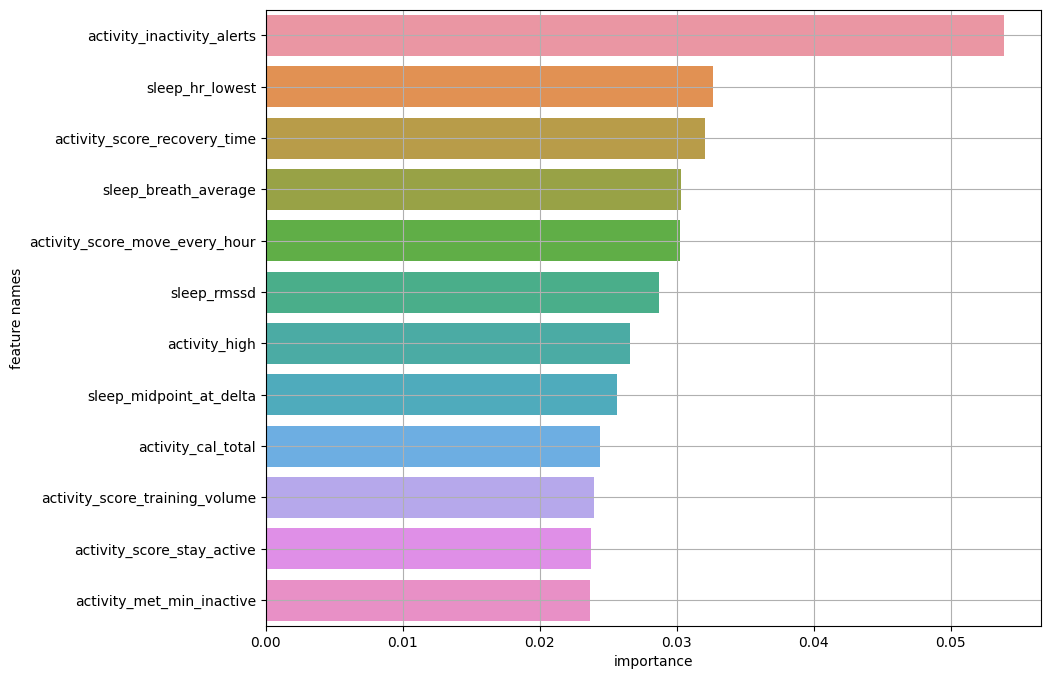

In [340]:
result1 = plot_feature_importance(model_1.feature_importances_, list(x_val_1),12)

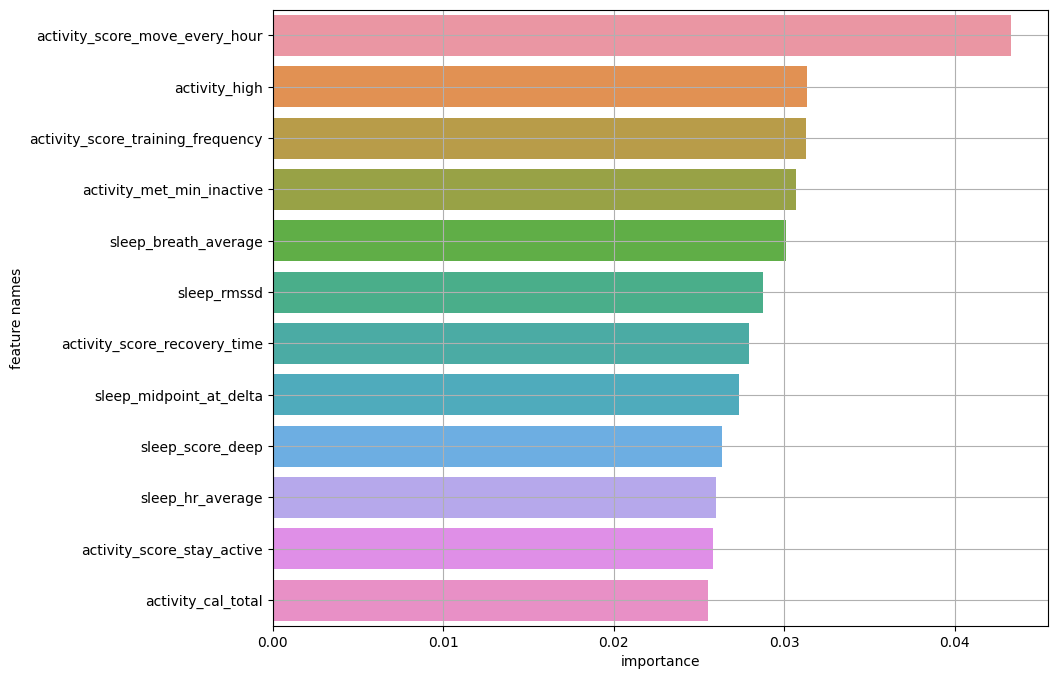

In [341]:
result1 = plot_feature_importance(model_3.feature_importances_, list(x_val_3),12)

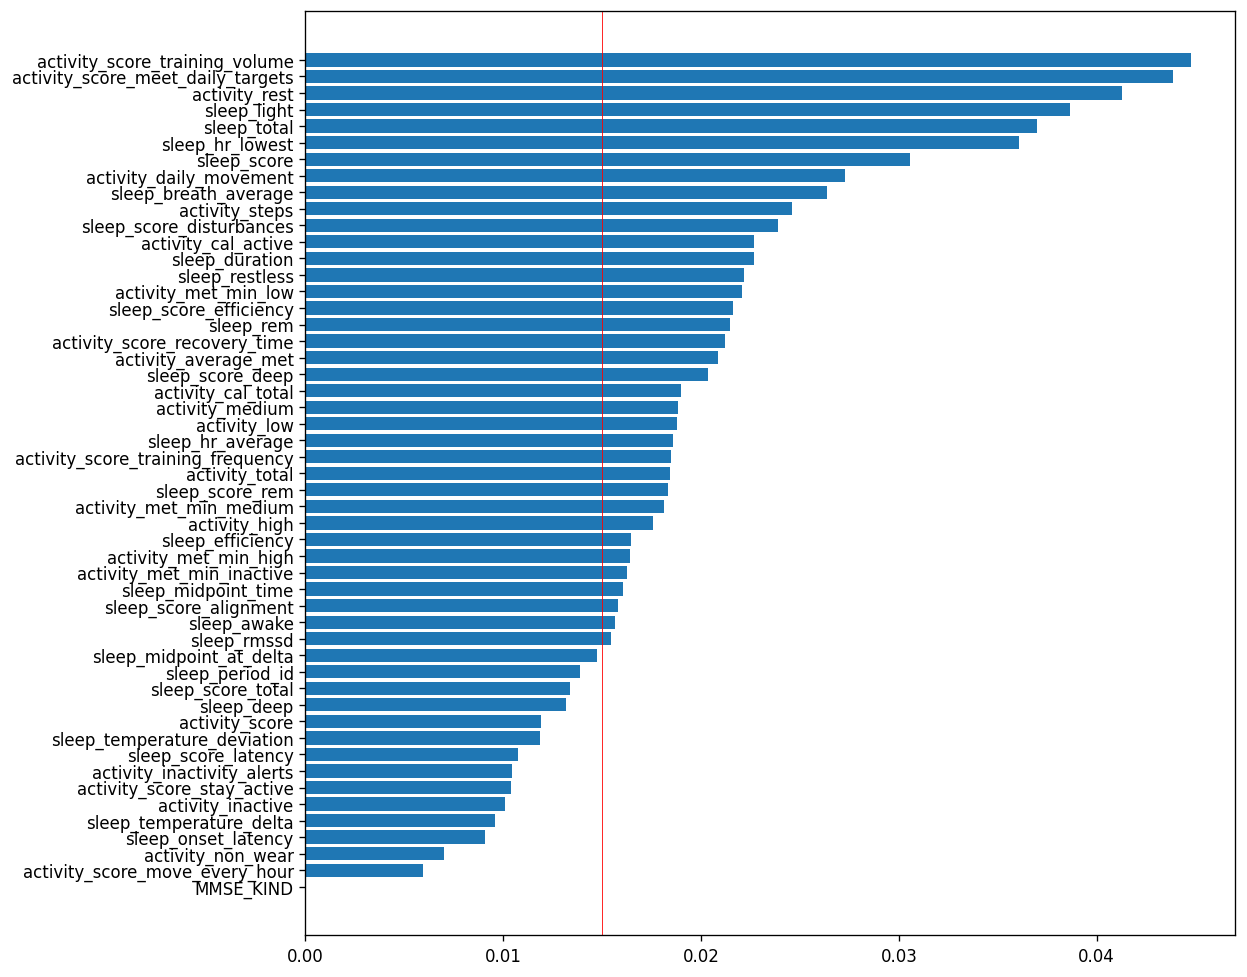

In [322]:
feature_importances = list(
    zip(x_train_2.columns, model_2.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [323]:
features_selected = list(filter(lambda x: x[1] >= 0.015, feature_importances))
print(features_selected)
selected_feature_names = list(map(lambda x: x[0], features_selected))

[('activity_score_training_volume', 0.04477761), ('activity_score_meet_daily_targets', 0.0438477), ('activity_rest', 0.04129023), ('sleep_light', 0.03864318), ('sleep_total', 0.036973517), ('sleep_hr_lowest', 0.0361007), ('sleep_score', 0.030565348), ('activity_daily_movement', 0.02730123), ('sleep_breath_average', 0.02636496), ('activity_steps', 0.024574956), ('sleep_score_disturbances', 0.023902047), ('activity_cal_active', 0.022682667), ('sleep_duration', 0.022667862), ('sleep_restless', 0.022194004), ('activity_met_min_low', 0.022046732), ('sleep_score_efficiency', 0.021624817), ('sleep_rem', 0.021460894), ('activity_score_recovery_time', 0.021213349), ('activity_average_met', 0.020874353), ('sleep_score_deep', 0.020373257), ('activity_cal_total', 0.019004844), ('activity_medium', 0.018859755), ('activity_low', 0.018796282), ('sleep_hr_average', 0.018590374), ('activity_score_training_frequency', 0.018484158), ('activity_total', 0.018406704), ('sleep_score_rem', 0.018322159), ('act

In [325]:
x_train_2_selected = x_train_2[selected_feature_names]
x_val_2_selected = x_val_2[selected_feature_names]

model_22 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_22.fit(x_train_2_selected, y_train_2)
pred_2 = model_22.predict(x_val_2_selected)
print(confusion_matrix(y_val_2, pred_2))
print("검증 AUC: ", model_22.score(x_val_2_selected, y_val_2))
print(classification_report(y_val_2, pred_2))

[[1814   10]
 [  36   81]]
검증 AUC:  0.9763008758371973
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1824
           1       0.89      0.69      0.78       117

    accuracy                           0.98      1941
   macro avg       0.94      0.84      0.88      1941
weighted avg       0.98      0.98      0.97      1941



In [328]:
x_test_2_selected = x_test12[selected_feature_names]

pred_2t = model_22.predict(x_test_2_selected)
print(confusion_matrix(y_test_2, pred_2t))
print("검증 AUC: ", model_22.score(x_test_2_selected, y_test_2))
print(classification_report(y_test_2, pred_2t))

[[2260    4]
 [ 187   27]]
검증 AUC:  0.9229217110573043
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2264
           1       0.87      0.13      0.22       214

    accuracy                           0.92      2478
   macro avg       0.90      0.56      0.59      2478
weighted avg       0.92      0.92      0.90      2478



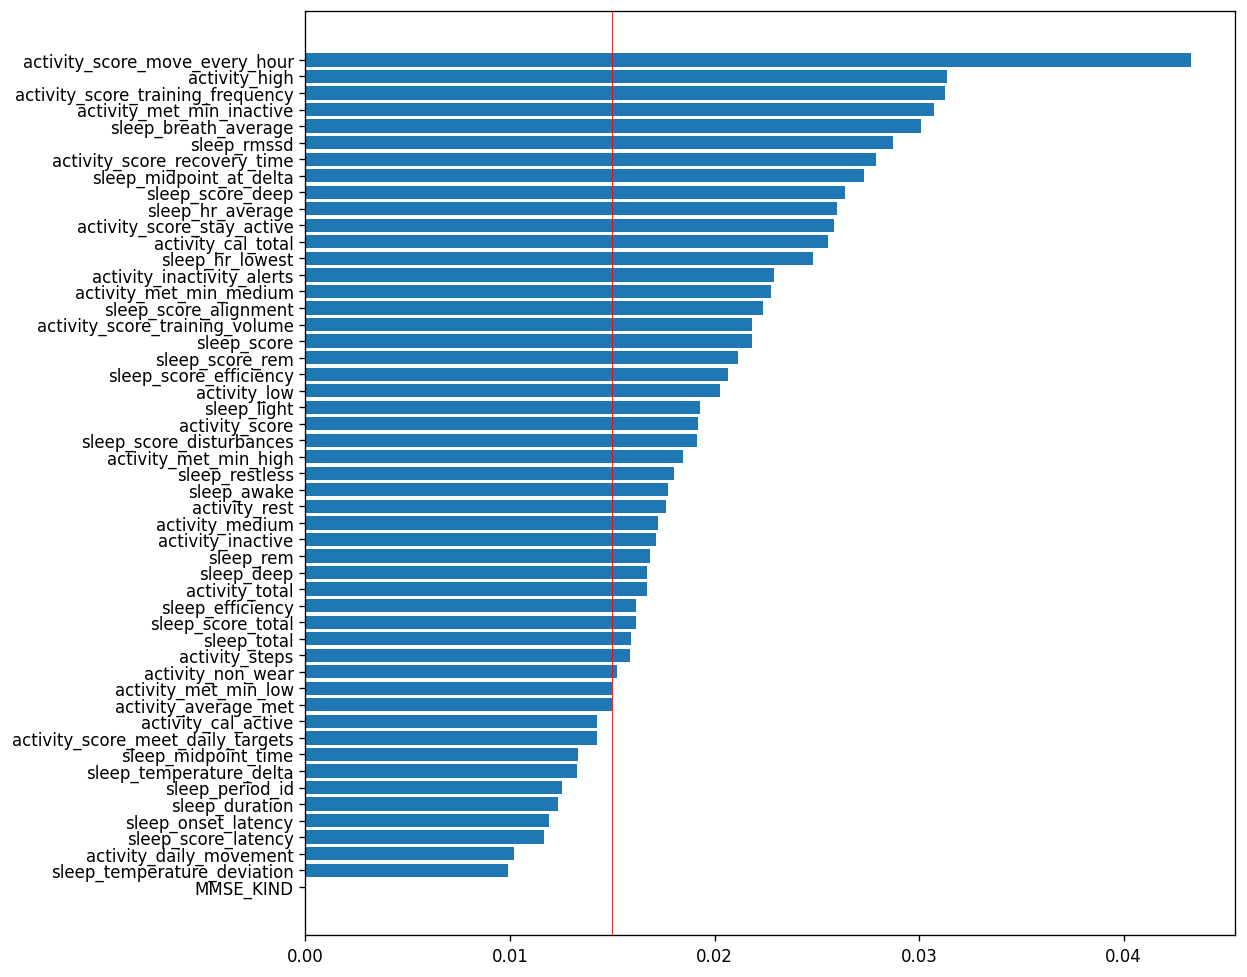

In [329]:
feature_importances = list(
    zip(x_train_3.columns, model_3.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [330]:
features_selected = list(filter(lambda x: x[1] >= 0.015, feature_importances))
print(features_selected)
selected_feature_names = list(map(lambda x: x[0], features_selected))

[('activity_score_move_every_hour', 0.0432979), ('activity_high', 0.031343166), ('activity_score_training_frequency', 0.03126613), ('activity_met_min_inactive', 0.030704023), ('sleep_breath_average', 0.030082878), ('sleep_rmssd', 0.028745418), ('activity_score_recovery_time', 0.027913798), ('sleep_midpoint_at_delta', 0.027325908), ('sleep_score_deep', 0.026379472), ('sleep_hr_average', 0.02599549), ('activity_score_stay_active', 0.025852995), ('activity_cal_total', 0.025530575), ('sleep_hr_lowest', 0.024807218), ('activity_inactivity_alerts', 0.022923272), ('activity_met_min_medium', 0.022761874), ('sleep_score_alignment', 0.022374112), ('activity_score_training_volume', 0.021850858), ('sleep_score', 0.021846276), ('sleep_score_rem', 0.021167427), ('sleep_score_efficiency', 0.020681882), ('activity_low', 0.02026475), ('sleep_light', 0.019271642), ('activity_score', 0.019189453), ('sleep_score_disturbances', 0.019163381), ('activity_met_min_high', 0.018457174), ('sleep_restless', 0.0180

In [331]:
x_train_3_selected = x_train_3[selected_feature_names]
x_val_3_selected = x_val_3[selected_feature_names]

model_33 = XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=999,
        random_state=42,
        n_jobs=-1,
        max_depth=6,
        min_child_weight=8,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,)

model_33.fit(x_train_3_selected, y_train_3)
pred_3 = model_33.predict(x_val_3_selected)
print(confusion_matrix(y_val_3, pred_3))
print("검증 AUC: ", model_33.score(x_val_3_selected, y_val_3))
print(classification_report(y_val_3, pred_3))

[[1106   96]
 [ 124  501]]
검증 AUC:  0.879584017515052
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1202
           1       0.84      0.80      0.82       625

    accuracy                           0.88      1827
   macro avg       0.87      0.86      0.86      1827
weighted avg       0.88      0.88      0.88      1827



In [332]:
x_test_3_selected = x_test3[selected_feature_names]

pred_3t = model_33.predict(x_test_3_selected)
print(confusion_matrix(y_test_3, pred_3t))
print("검증 AUC: ", model_33.score(x_test_3_selected, y_test_3))
print(classification_report(y_test_3, pred_3t))

[[1344  612]
 [ 266   42]]
검증 AUC:  0.6121908127208481
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1956
           1       0.06      0.14      0.09       308

    accuracy                           0.61      2264
   macro avg       0.45      0.41      0.42      2264
weighted avg       0.73      0.61      0.66      2264



In [333]:
def ice_plot(data, var, id, model) :
    '''
    input 설명
        * data : 데이터셋
        * var : 특정 feature
        * id : 특정 인스턴스, 분석단위...
        * 설명할 모델
    '''

    temp = data.loc[[id]]
    var_values = data[var].sort_values().tolist()
    pred = []
    for v in var_values :
        temp[var] = v
        pred.append(model.predict_proba(temp)[0,1])

    plt.plot(var_values, pred, marker = '.')
    plt.grid()
    plt.show()

In [334]:
temp = x_val_2.copy()
temp.reset_index(drop = True, inplace = True)

In [346]:
x_train_1.columns

Index(['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_light', 'sleep_midpoint_at_delta', 'sleep_midpoint_time',
       'sleep_onset_latency', 'sleep_period_id', 'sleep_rem', 'sleep_restless',
       'sleep_rmssd', 'sleep_score', 'sle

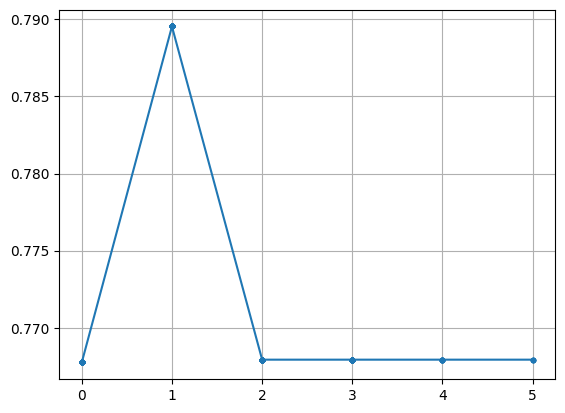

In [348]:
ice_plot(temp, 'activity_inactivity_alerts', 156, model_1)

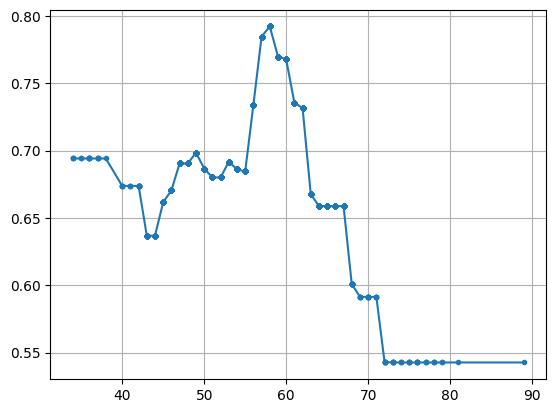

In [349]:
ice_plot(temp, 'sleep_hr_lowest', 156, model_1)

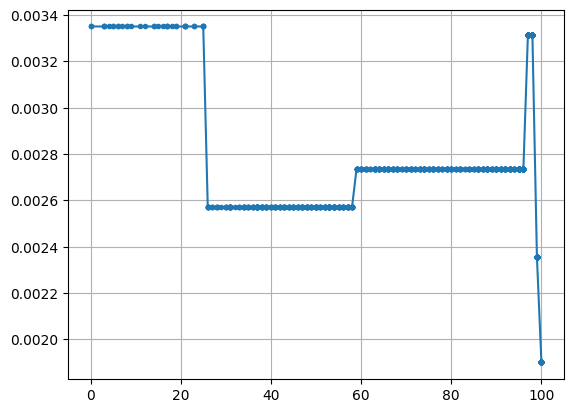

In [350]:
ice_plot(temp, 'activity_score_training_volume', 156, model_2)

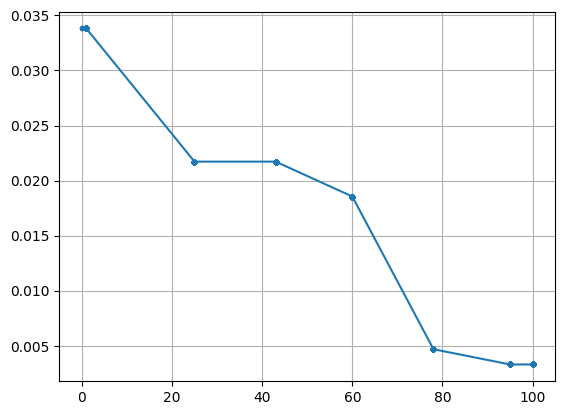

In [351]:
ice_plot(temp, 'activity_score_meet_daily_targets', 156, model_2)

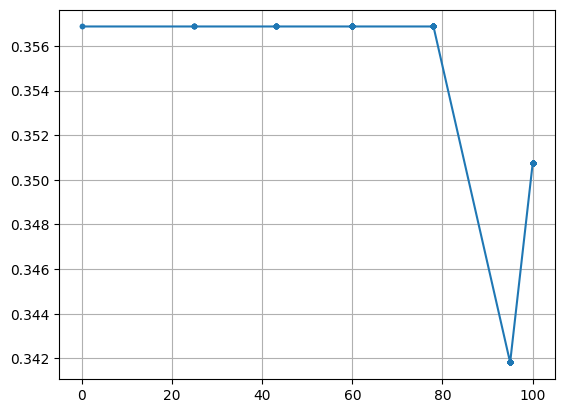

In [352]:
ice_plot(temp, 'activity_score_move_every_hour', 156, model_3)

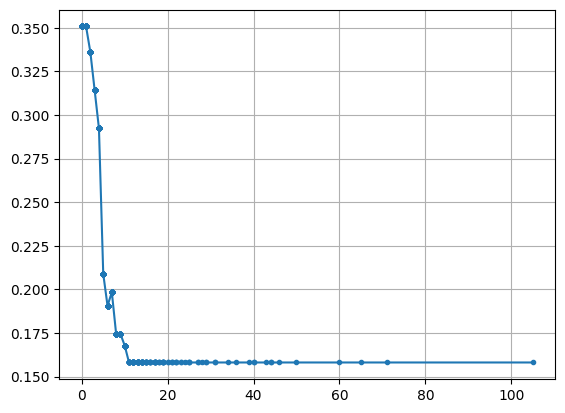

In [353]:
ice_plot(temp, 'activity_high', 156, model_3)